# **Loan Default Prediction**

## **0. Problem Definition and Data Description**

**CONTEXT: Why is this problem important to solve?**

Banks work on profit margins from loans they lend out. Few bad loans can wipe out the profit made by a bank from hundreds of different loans. If the number of bad loans increase, the risks exponentially increase. Thus, it is important for the banks to know their customers. The ability to identify a good customer is important, as it means business will grow. But more importantly, it is critical to identify a customer who would default on the loan in future, as this risk is real and large. In the past, the customer risk profile assessment was manual, but with data science, it is much more scientific.

Focussing on specific loan category of Home Equity Line of Credit (HELOC), this customer risk profile assessment involves knowing what the customer's home value is, what the existing mortgage amount and monthly payment is and the age of the loan. Then, the reason for borrowing the loan is critical, as it is common for customers to leverage the built in equity in their homes and consolidate multiple other loans i.e. consolidate their debts. It is common for customers to upgrade their homes i.e. start a home improvement. The former reason for HELOC can mean few risks compared to later. The customer profile includes their DEBT to INCOME ratio, the number of years of job history and their job title. Customer's credit history and credit profile matter too - hence, number of existing credit lines (also connects to Debt Consolidation reason), new credit inquiries, number of derogatory reports and awareness of any past delinquencies matter the most.

These factors directly influence customer's ability to repay the loan or default on it, and that decides the bank's profits in future. This is why it is important to be able to categorize a customer.

**The objective: What is the intended goal?**

The goal of this data science initative is to be able to learn from the past history of the bank, combine the past facts with data gathered for a sample of customers, and learning from data patterns, build an engine that helps the bank categorize its customers into safe and risky categories. This will give banks the ability to choose its customers wisely i.e. scientifically.

In case the bank declines to process a loan for a given customer, bank needs to be able to explain the reason why the loan is declined as per Equal Credit Opportunity Act. Hence, the intention is also to identify the reasons for customer categorization.

**The key questions: What are the key questions that need to be answered?**

The key questions to be answered are
1. Is any given customer safe i.e. customer will repay the loan vs. risky i.e. customer will default on the loan.
2. If a customer is identifies as risky, what factors are leading to that decision and is the decision explainable to the customer?
3. With each loan processed, how is the larger risk quotient of the bank improving or degrading and what can the bank expect at the end of each fiscal year in terms of profits or losses it will make from HELOC loans?
4. Are there loans in its existing loan portfolio that are high risk, but the bank is unaware of them? Knowing what the existing lilst of risky loans is, allows the bank to take secondary actions like insuring the loans, selling the loans, or validating their risk based on customer's primary loan vs. home value to see if the loan can be recovered in the event of customer defaulting.

**The problem formulation: What is it that we are trying to solve using data science?**:

Using data science, we are trying to do the following
1. Build a robust, repeatable, explainable decision making engine that categorizes the customers into safe vs. risky customers.
2. Identify the problems with current loans in terms of information that is known vs. more importantly the unknown information.
3. Identify the loop holes in the current loan application process so that information gathering is tightened, and so is decision making.
4. Identify for new future loans as well as existing past loans the customer risk profiles and unsafe loans.


The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **1. Import the necessary libraries and Data**

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# For predicting values using Linear Regression
from sklearn.linear_model import LinearRegression

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/MIT-ADSP-Program/10-CapstoneProject/3-PracticalDataScience-Classification-LoanDefaultPrediction/hmeq.csv")

In [7]:
# Validating if data is loaded
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


## **2. Summary Statistics**

**Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

**2.1 Absolute Initial Look at the Data**

In [8]:
# Getting the basic shape of the data
df.shape

(5960, 13)

In [9]:
# Getting an understanding of the data and starting to build a data intution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**NOTE:**The default precision of 6 decimal values seems to be too large, and interpreting the data is getting difficult as a result. Hence restricting the values to 2 decimal places for visual interpretation sake, leaving the real data with default precision values, so that they can be fed as is to model training.

In [10]:
# Understanding the data
# Viewing more than 5 rows as understanding row values is important.
# df.head(25)
np.round(df.head(50), decimals=2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.37,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.83,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.47,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.33,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.47,1.0,8.0,37.11
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.10,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.77,0.0,8.0,36.88
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.93,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.80,0.0,13.0,NaN


In [11]:
# Likewise, looking at more rows from the end of data file to get a good initial intution of the data
# df.tail(25)
np.round(df.tail(25), decimals=2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5935,0,78400,13900.0,102910.0,HomeImp,NaN,27.0,0.0,1.0,138.00,0.0,14.0,NaN
5936,0,78700,22762.0,102997.0,HomeImp,NaN,25.0,0.0,0.0,146.63,0.0,13.0,34.30
5937,0,79100,23553.0,103807.0,HomeImp,NaN,25.0,0.0,1.0,142.19,0.0,13.0,31.47
5938,0,79200,21694.0,103143.0,HomeImp,NaN,26.0,0.0,1.0,139.94,0.0,14.0,31.33
5939,0,79200,22940.0,110114.0,HomeImp,NaN,28.0,0.0,1.0,144.62,0.0,13.0,32.37
5940,0,79900,18363.0,109675.0,HomeImp,NaN,27.0,0.0,1.0,132.77,0.0,13.0,31.64
5941,0,80300,20370.0,109127.0,HomeImp,NaN,27.0,0.0,1.0,142.17,0.0,13.0,33.47
5942,0,80600,16337.0,109370.0,HomeImp,NaN,28.0,0.0,0.0,137.44,0.0,14.0,34.20
5943,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.04
5944,0,81400,22344.0,108280.0,HomeImp,NaN,25.0,0.0,0.0,148.11,0.0,14.0,34.29


- Observations from Summary Statistics

The shape of the data shows there are 5960 rows with 13 columns.

Most columns, 10 of the independent columns (variables), are numeric. And, there are 2 categorical columns.

The head data reveals information about smaller loans, and from the initial view it appears that most small loans are not repaid. Whereas, the tail data shows large loans mostly, and it appears that the larger loans are being repaid more often. More needs to be seen though as this is just the initial view.

There seems to be missing data. Maybe duplicate data too. Hence, finding that next.

Also building an initial intution about Numeric and Categorical Data after that, before getting into EDA.

**2.2. Missing and Duplicate Data Anlaysis**

This is based on visual data analysis revealing missing data. Also checking for duplicate rows

In [12]:
# Finding NaN or Null values across all columns, to build a better intution about data
print(df.isna().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [13]:
# Checking for duplicated rows
duplicate_rows = df[df.duplicated()]
# Print the result
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [BAD, LOAN, MORTDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC]
Index: []


Observations based on Missing and Duplicate Rows Information:

There seem to be no duplicate rows, which is a good sign.

However, another challenge could be rows with multiple missing values, making such rows useless. At least from the cursory look, such rows seem to be belonging to customers who have defaulted. This means, the loan officer may have done a very poor job capturing all required information, and this could reveal a pattern of loan officers beating the system for questionable reasons. Vice versa may not be true, but it appears that when more information is captured, the chances of issuing a bad loan reduce.

**2.3. Building an initial intution about numeric columns:**

In [14]:
# Getting an idea about how numerical data is distributed
# It is hard to interpret the data due to a high number of decimal values. Rounding the decimal values to 2.
np.round(df.describe().T, decimals=2)

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
LOAN,5960.0,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.0,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.0,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.0,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.0,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.0,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.0,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.0,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.0,21.30,10.14,0.00,15.00,20.00,26.00,71.00


Observations on Numeric Columns:

A detailed column level analysis will follow, so focussing on major patterns that are visible.

Common Points: Mainly around domain data problems
1. The range of data across various numeric columns is very wide, which can cause some columns to influence the model training more than other columns, as it could mean a relative non-linear influence across columns. Applying some column level scaling might make sense so that the meaning of the data does not change, but the data is brought to the same scale across the columns. This is inter-column disparity.
2. There are intra-column disparities too, where the range of data is very wide. Example, the loan amount column has min value of USD 1100 and max value of USD 89,900, which makes the larger values appear as outliers. It is natural for a bank to lend larger loans if the line of credit is being taken against high value homes, that will naturally require larger credits. Purely looking at intra-column data, this looks okay. It will be interesting to see how these larger loans were processed, especially if they are at a higher risk of being defaulted, which can happen if the process was not followed.
3. Likewise, MORTDUE also has a wide range and it is most likely proportional to the home VALUE. The min is USD 2063 and max USD 399,550. 399,550 is far larger than the max loan value of  USD 89,900. Unless we learn about relation between MORTDUE and DEBTINC, it is hard to tell if existing MORTDUE being small is positive or negative. Small MORTDUE could mean existing loan being nearly paid off.
4. DebtInc column is ratio based column. Hence, if a customer has large income and large debt, vs. low income and low debt, the rations should be similar.  However, the min is 0.52 and max is 203. This is clearly an issue indicating the general rule of thumb around DebtInc is broken and the values seem to be outside the acceptable range, and a detailed analysis will be required, which will be done in EDA.


Column Specific Points:

1. The dependent column BAD has 5960 entries and is integer type. This is technically a boolean variable, with 1 or 0 values. Eventually, this column will be learnt from and predicted for. A mean value of 0.2 for this column indicates, 20% of the total loans provided by this bank, have been defaulted by the customer. This may be a very large percentage for loan defaults (unsure though)
2. Loan amount has 5960 rows, so all values are available. However, given the potential importance of this column, further validations should be run against this column.
3. Mortdue, which is the pending mortgage on eixsting home loan (or main loan), and is a float type, with 5442 rows having data while 518 rows having no data. Depending on how Mortdue affects loan status, missing data strategy can be laid out.
4. Value, which is current value of the home against which the equity line of credit was opened, also seems to have missing data as only 5848 rows have values while 112 rows have NaN values.
5. Reason is the first categorical column, and should ideally have only 2 values i.e. HomeImp and DebtCon, but only 5708 rows have a reason, while 252 are NaN/ Null values. It will be interesting to see how these values could be populated. Later, this column can also be normalized into numeric values, if appropriate.
6. JOB is the job title of the customer. Unique values within this column need to be identified, but given only 5681 records have values, 279 missing values have to be handled. Within the values that are provided, mis-categorization of the customer title could cause additional data issues and needs to be validated.
7. DEROG i.e. number of degrogatory reports, should be an integer value. Reports cannot be in decimal values and so should not be float, and a datatype correction may be needed. Additionally, only 5252 rows have a value, while 708 are NaN. It needs to be determined if NaN would mean 0 reports, which is unlikely, and hence handling such rows will pose a significant challenge given the potential importance of this column in determining the possibility of customer defaulting.
8. DELINQ has 5380 rows, with 580 NaN values. Like DEROG, this column should be an integer given number of reports cannot be in decimals. This is clearly an indication of customer's past deliquency, which might be a very direct indicator of such a customer defaulting, and hence handling NaN values will pose a significant challenge.
9. CLAGE, which is the age of oldest creditline in months, has 5652 rows and is float type. 308 missing values have to be treated, and rounding up this data to the nearest integer could be logical, so that continuous data could be simplified to a certain extent.
10. NINQ, which is the number of recent (or maybe new) credit inquiries has 5450 rows. 510 records with absence of a value i.e. NaN values, could mean no recent report, but again, given this row could mean the person is trying to shopping around for a loan could have significant value, especailly given that new load could be on top of current loan with this bank.
11. CLNO, which is the current credit lines, and indicates existing debt only has 5738 rows. So, clearly such a critical piece of information about the customer was not gathered for 222 customers. This could mean the loan application software is not forcing the loan officer to enter this information, failing which the loan processing should be disallowed. This needs to be validated. Also, analyzing the data in this column, a strategy to handle missing values needs to be devised.
12. DEBTINC, which is the critical debt to income ratio, has the highest missing rows with a count of 1267. This might indicate bank has a faulty or deficient loan application process and software that allows loan issuance in spite of missing DEBTINC data. It is important to check if DEBTINC is missing only for small loans or there are issues for large loans too.

**2.4. Building an initial intution about Categorical Data:**

Extending the analysis to categorical columns as well

This is also to understand how the encoding will work when we prepare the data for training & testing

In [15]:
# Building an initial view of the categorical columns
df.describe(exclude = 'number').T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


Observations about categorical columns:

REASON has 2 unique values, with DebtCon as the more commonly recurring reason for taking the loan, and has a count of 3928 value. We know from the missing value analysis, that 252 rows do not have any reason stated. That means 1528 rows have the reason as HomeImp. Univariate analysis will reveal more about this column. This is the initial intution about this column.

JOB has 6 unique values, with Other topping the list with 2388 rows. JOB:Other seems to be a generalization bucket in the loan process, which means the standard drop down value does not cover enough JOB titles, leading to selection of 'Other' as the value. 'Other' does not convey much about the type of JOB customer is doing, and can be considered as poor data. We know from missing data analysis that there are 279 missing values in this column. That means 2667 rows convey no meaning, which is a whopping 47% of the total data available across all rows. It remains to be seen from EDA, what the importance of this column is, but we can already imagine the impact such large meaningless data will have on the model training. Rest to be covered in EDA for this column.

**2.5. Peeking into sample of BAD LOANS to get additional intution before univariate analysis:**

The idea is to have this intution before univariate analysis, so that a more informed strategy for bivariate and multivariate analysis can be established.

In [16]:
# Additionally checking more data around bad data.
# This is to get an initial intution about how bad is bad data
# Not using any specific sampling technique and looking at lower end (head(100)) and far end (tail(100)) of the spectrum
# Idea is to also use this smaller data frame later on for additional pattern analysis
df_bad_loans = df[df['BAD']==1].sample(100)
# Displaying 25 of the 200 rows selected
np.round(df_bad_loans.sample(50),2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5714,1,42000,65889.0,125000.0,HomeImp,Other,10.0,0.0,0.0,102.50,1.0,13.0,NaN
3575,1,18800,73396.0,137076.0,DebtCon,Office,18.0,0.0,1.0,163.59,4.0,20.0,40.38
4090,1,21400,166244.0,212505.0,DebtCon,ProfExe,4.0,2.0,7.0,183.55,4.0,24.0,38.15
4391,1,22800,129697.0,167475.0,DebtCon,ProfExe,5.0,0.0,1.0,202.60,1.0,18.0,22.04
3545,1,18600,51936.0,75278.0,DebtCon,ProfExe,3.0,0.0,0.0,199.80,0.0,21.0,37.00
119,1,4500,57000.0,NaN,HomeImp,Other,5.0,NaN,NaN,222.60,1.0,13.0,NaN
1962,1,12800,54151.0,83828.0,DebtCon,Other,13.0,0.0,0.0,132.16,0.0,16.0,23.48
4022,1,21000,110000.0,138000.0,DebtCon,Mgr,16.0,8.0,2.0,154.20,3.0,30.0,NaN
3471,1,18300,60100.0,82506.0,DebtCon,ProfExe,10.0,3.0,1.0,171.47,2.0,64.0,NaN
310,1,6000,33600.0,NaN,HomeImp,Other,2.0,0.0,0.0,140.93,1.0,20.0,NaN


Observations from Bad Loan Data:

1. By looking at the sample of bad loans, it is clear that the DEBTINC values are mostly near or above the 25th quartile (29.14), and in absolute terms all these DEBTINC values are way greater than min value (0.52).
2. CLNO, number of existing Credit Lines, is quite high. We know from describe function, CLNO=15 is 25th quartile, which is already very high. Most of the bad loans have high CLNO, higher than 25th quartile.
3. Most bad loans have more than 1 new credit inquiry i.e. NINQ > 1. Not sure what is the right threshold to call it a risk, but NINQ > 0 shows customer is looking for new loan.
4. In many cases for BAD loans, DEROG > 0 indicating there are derogatory reports for defaulting customers.

**#2. Summary Statistics Closing Statement/ Initial Data Intution:**

Overall, the quality of the given data is sub-standard and considerable effort needs to be spent in fixing data quality issues. Thus EDA is super critical step before model training can start as the data quality gap needs to be  bridged first.

Various techniques like Normalization/ Scaling using Min-Max or Z-Score scaling might be needed. Use of log transformation might apply too. Scaling based on IQR could be applicable too. Some columns might benefit from bucketization too.

Another point to consider is the potential colinearity that might exist. Example, VALUE and MORTDUE, both properties of customer's existing loan, could be dependent on each other and could have strong correlation.

## **3. Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **3.1. Preparing for EDA including defining reusable Functions**

**3.1.1. Creating a list of columns - all, numeric and categorical columns**

In [17]:
# Building a list of all columns
columns_all = df.columns.tolist()
print(columns_all)

['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [18]:
# Popping the dependent column
columns_all.pop(0)
print(columns_all)

['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [19]:
# Building a list of all numeric columns
columns_numeric = df.select_dtypes(include = ['int64','float64']).columns.tolist()
print(columns_numeric)

['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [20]:
# Dropping the dependent variable/ column from the list of numeric columns
columns_numeric.pop(0)
print(columns_numeric)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [21]:
# Building a list of all categorical columns
columns_categorical = df.select_dtypes(include = ['object','category']).columns.tolist()
print(columns_categorical)

['REASON', 'JOB']


**3.1.2. Defining plotting functions for data analysis:**

In [22]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Creating the 2 subplots
    f2, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 3
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )

    # Building the BOXPLOT
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = "violet")

    # Building the HISTOGRAM
    # Hist Plot conditions based on bins provided
    if bins:
      sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist, bins=bins)
    else:
      sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist)
    # Add mean to the histogram
    ax_hist.axvline(data[feature].mean(), color = "green", linestyle = "--")
    # Add median to the histogram
    ax_hist.axvline(data[feature].median(), color = "black", linestyle = "-")

    plt.show()

In [23]:
def histogram_boxplot_describe(data, feature, norounding=False, figsize=(12, 7), kde=False, bins=None):
  # Plot the Histogram Plus BoxPlot
  histogram_boxplot(df, feature, kde=True)
  plt.show()
  print("_____________________________________")
  # Also looking at the same data using describe function for a number based interpretation to support visual clues from the plots
  if(norounding==True):
    print(df[feature].describe())
  else:
    print(np.round(df[feature].describe(), decimals=2))
  print("_____________________________________")
  # Include null or NaN value count also, for a comprehensive view per column
  isna_count = df[feature].isna().sum()
  print("Number of NULL or NaN values:", isna_count)
  print("_____________________________________")

In [24]:
# Using CountPlot for Categorical Data
def count_plot_for_categorical_columns(df, column):
  sns.set(style="whitegrid")  # Optional: Set a style
  plt.figure(figsize=(5, 3))   # Optional: Set the figure size
  ct = sns.countplot(data=df,x=column)

  # Adding counts to the bars
  for c in ct.patches:
    ct.annotate(f'{c.get_height()}', (c.get_x() + c.get_width() / 2., c.get_height()), ha='center', va='bottom', fontsize=8)

  plt.xlabel(column)
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.show()

In [25]:
def count_plot_for_categorical_columns_and_null_value_check(df, column):
  count_plot_for_categorical_columns(df, column)
  print("_____________________________________")
  # Include null or NaN value count also, for a comprehensive view per column
  isna_count = df[column].isna().sum()
  print("Number of NULL or NaN values:", isna_count)
  print("_____________________________________")

**3.1.3. Defining functions for bivariate analysis:**

In [26]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )

    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def stacked_barplot_pri_sec_col(data, primary_col, secondary_col):
    """
    Draw a stacked bar plot based on a dataframe with a primary and a binary secondary column.

    Parameters:
    - data: DataFrame
    - primary_col: str, the primary column for the x-axis
    - secondary_col: str, the binary secondary column for stacking

    Returns:
    - None
    """
    # Create a cross-tabulation between the primary and secondary columns
    tab = pd.crosstab(data[primary_col], data[secondary_col], normalize='index')

    # Plotting
    tab.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Adding labels and title
    plt.xlabel(primary_col)
    plt.ylabel("Proportion")
    plt.title(f"Stacked Bar Plot of {secondary_col} by {primary_col}")

    # Display the legend
    plt.legend(title=secondary_col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.show()

### **3.2. Univariate Analysis**


####**Univaritate Analysis for Numeric Columns**

**#3.2.1. Analyzing LOAN data using univaritate analysis**

This analysis answers the suggested question "1. What is the range of values for the loan amount variable "LOAN"?"

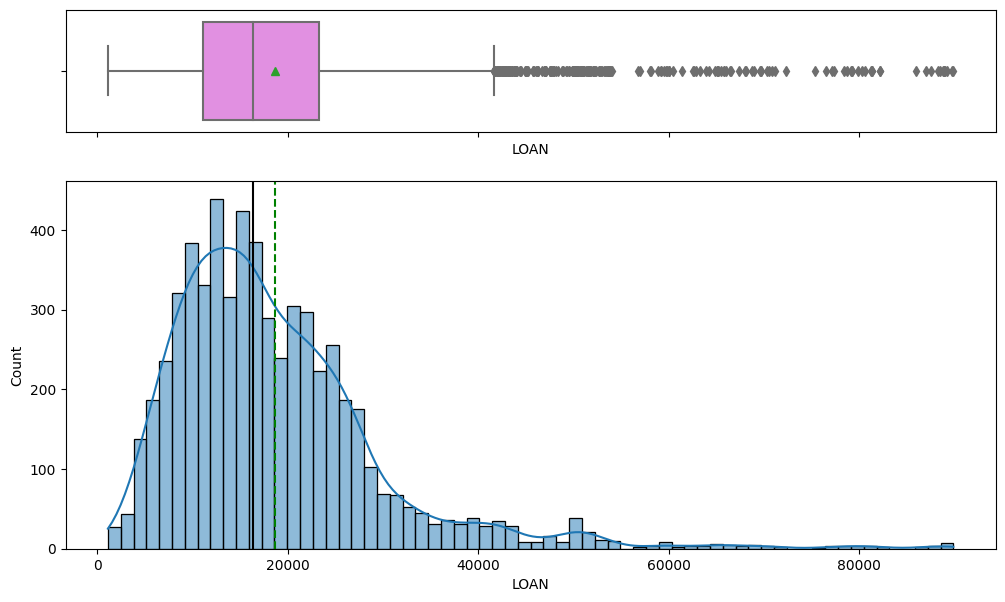

_____________________________________
count     5960.00
mean     18607.97
std      11207.48
min       1100.00
25%      11100.00
50%      16300.00
75%      23300.00
max      89900.00
Name: LOAN, dtype: float64
_____________________________________
Number of NULL or NaN values: 0
_____________________________________


In [28]:
histogram_boxplot_describe(df, "LOAN", kde=True)

Observations on LOAN amount:

The average LOAN amount is about USD 18,600.The LOAN amount is highly right skewed or right tailed, with lots of outliers. Some of these very large loans could pose a high risk, if customers defaulted. The 75th% is USD 23,300, where as the highest loan anount is USD 89,900, and goes to explain how many loans are abnormally large compared to mean values.

But this could also mean bank lends small loans more ferquently, and large loans are seldom issued. But large loans don't necessarily mean they are outliers. It could be very logical to expect fewer large loans, given this is line of credit type loans.

**#3.2.2. Analyzing MORTDUE data using univaritate analysis**

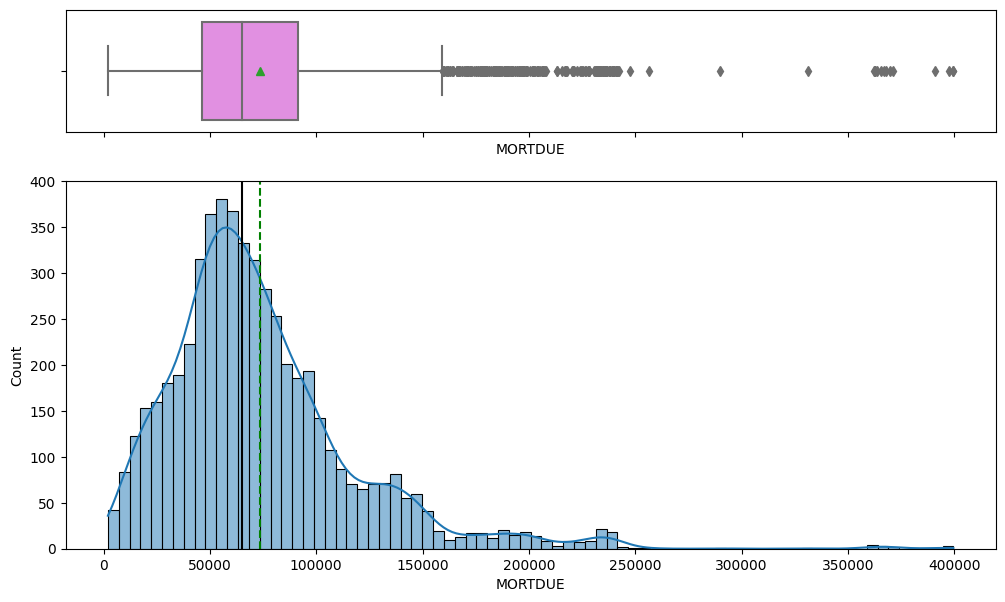

_____________________________________
count      5442.00
mean      73760.82
std       44457.61
min        2063.00
25%       46276.00
50%       65019.00
75%       91488.00
max      399550.00
Name: MORTDUE, dtype: float64
_____________________________________
Number of NULL or NaN values: 518
_____________________________________


In [29]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "MORTDUE", kde=True)

Observations on MORTDUE amount:

MORTDUE follows a very similar pattern to the LOAN amount, and is highly left skewed. The mean MORTDUE value is USD 73,760. Std Deviation of USD 44,457 seems large. Range is very wide with min=2,063 and max=399,550, and that explains presence of many outliers. A high value in MORTDUE could actually mean customer has a poor DEBTINC ratio, and needs to be checked in bi-variate analysis.

**#3.2.3. Analyzing VALUE data using univaritate analysis**

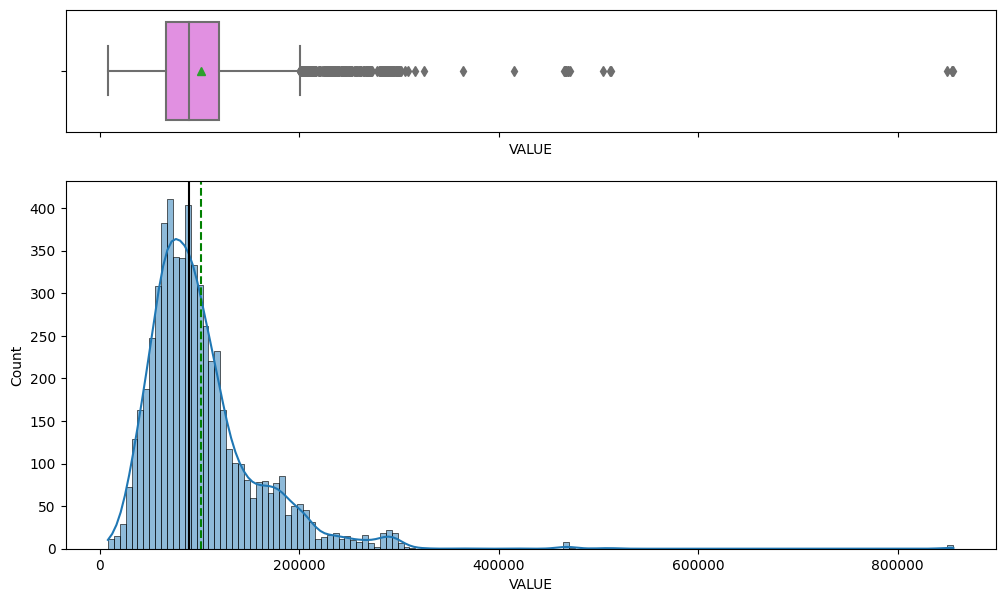

_____________________________________
count      5848.00
mean     101776.05
std       57385.78
min        8000.00
25%       66075.50
50%       89235.50
75%      119824.25
max      855909.00
Name: VALUE, dtype: float64
_____________________________________
Number of NULL or NaN values: 112
_____________________________________


In [30]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "VALUE", kde=True)

Observations on VALUE amount:

The data in the VALUE column is also right skewed or right tailed, with lot of outliers. A mean of USD 101,776 and max of USD 855,909 justifies the left skew observed in the data. Interesting data point is that min is USD 8,000 that suggests bank has lent out loans against very small properties. In real world, large value homes don't mean outliers and hence data might have to be handled differently for this column so that the model training is not affected by large values or any biases.

**#3.2.4. Analyzing YOJ data using univaritate analysis**

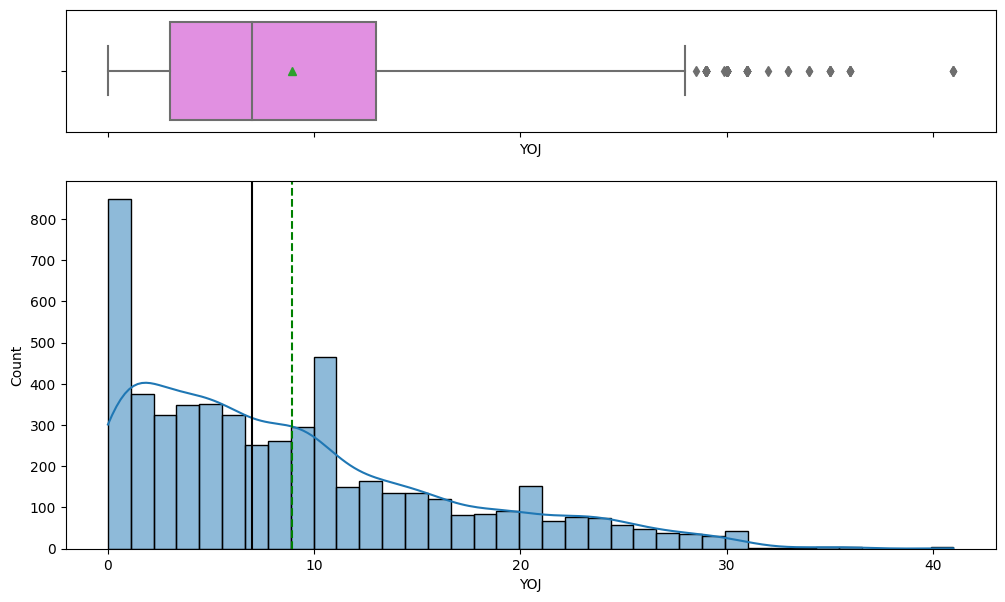

_____________________________________
count    5445.00
mean        8.92
std         7.57
min         0.00
25%         3.00
50%         7.00
75%        13.00
max        41.00
Name: YOJ, dtype: float64
_____________________________________
Number of NULL or NaN values: 515
_____________________________________


In [31]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "YOJ", kde=True)

Observations on YOJ amount:

YOJ appears to be an decreasing explotential distribution with a fairly long right skew or right tail, thus does not seem to be following normal distribution.

In this case where YOJ represents years at present job, the outlier values may be good actually, as they suggest the customer has been in a stable job for long time. The reverse may not be true, as min of 0 suggests loans have been given out to people who have no prior experience, suggesting no credit history.

A mean of 8.92 is okay, but std deviation of 7.57 is very high, and goes to explain YOJ trending to 0 in some cases. There are a lot of customers who have YOJ at 0 and that is reason for worry for the bank.



**#3.2.5. Analyzing DEROG data using univaritate analysis**

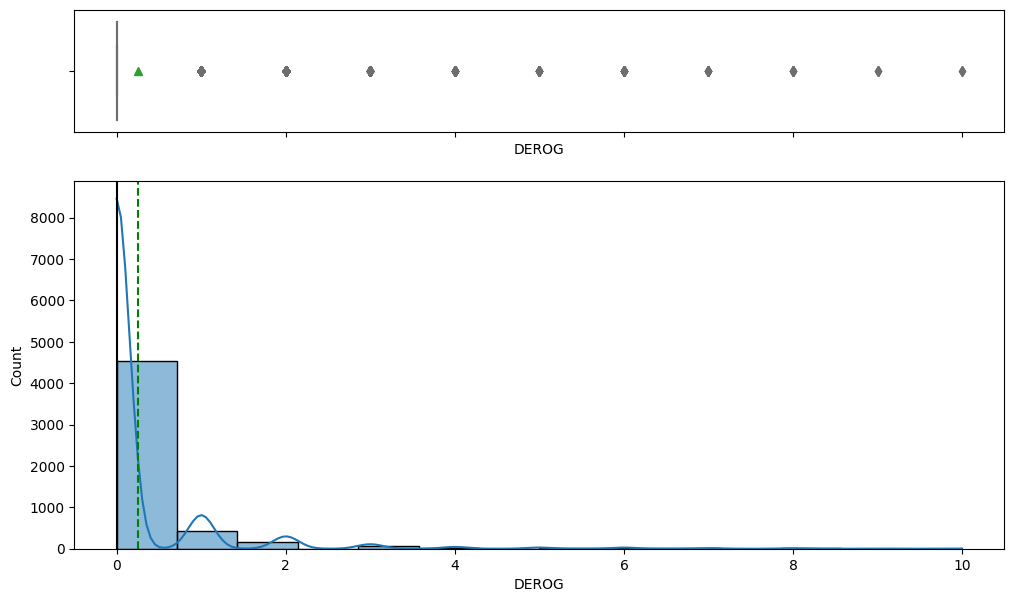

_____________________________________
count    5252.000000
mean        0.254570
std         0.846047
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: DEROG, dtype: float64
_____________________________________
Number of NULL or NaN values: 708
_____________________________________


In [32]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "DEROG", norounding=True, kde=True)

Observations on DEROG amount:

For DEROG, which indicates number of degrogratory reports, lower values are better. Hence, a mean of 0.25 is good. Visual data inspection shows there are very few customers with max=10 DEROG reports. Most likely such customers would be defaulters. For many customers with min=0, which is apparently the highest frequency of data, DEROG=0 is a good sign. Other DEROG>0 values need to be analyzed to see how they lead to BAD loans. Std Deviation of 0.84 is far high compared to Mean.



**#3.2.6. Analyzing DELINQ data using univaritate analysis**

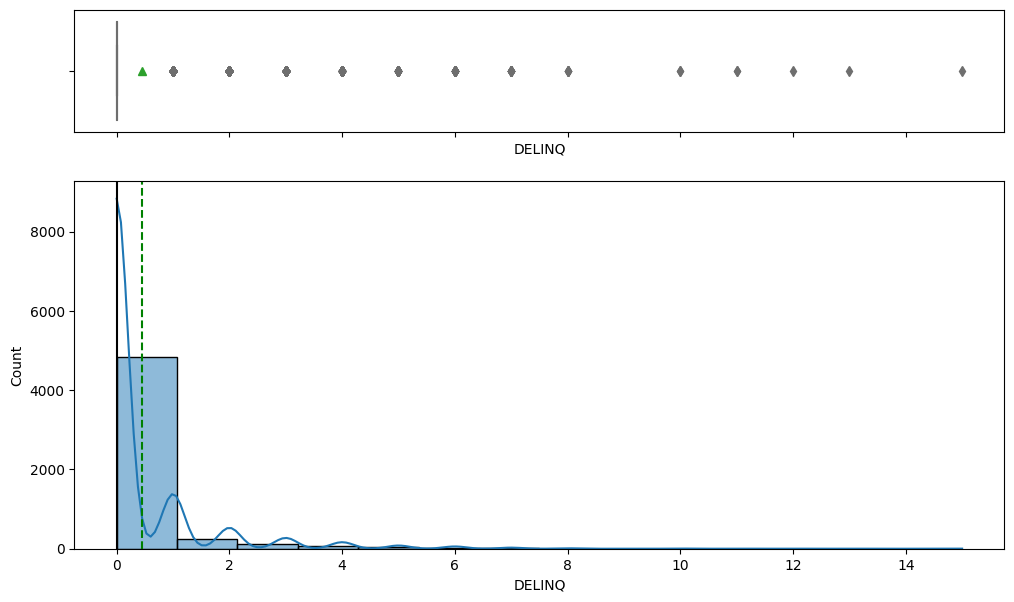

_____________________________________
count    5380.00
mean        0.45
std         1.13
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        15.00
Name: DELINQ, dtype: float64
_____________________________________
Number of NULL or NaN values: 580
_____________________________________


In [33]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "DELINQ", kde=True)

Observations on DELINQ amount:

For DELINQ, which indicates number of delinquent credit lines, and thus lower values are better. A Mean of 0.45 is good, though Std Deviation of 1.13 is very large. Very similar to DEROG, very few customers have max=15 (or max>4) and indicate potential chance to default. Most customers have min=0 DELINQ reports.




**#3.2.7. Analyzing CLAGE data using univaritate analysis**

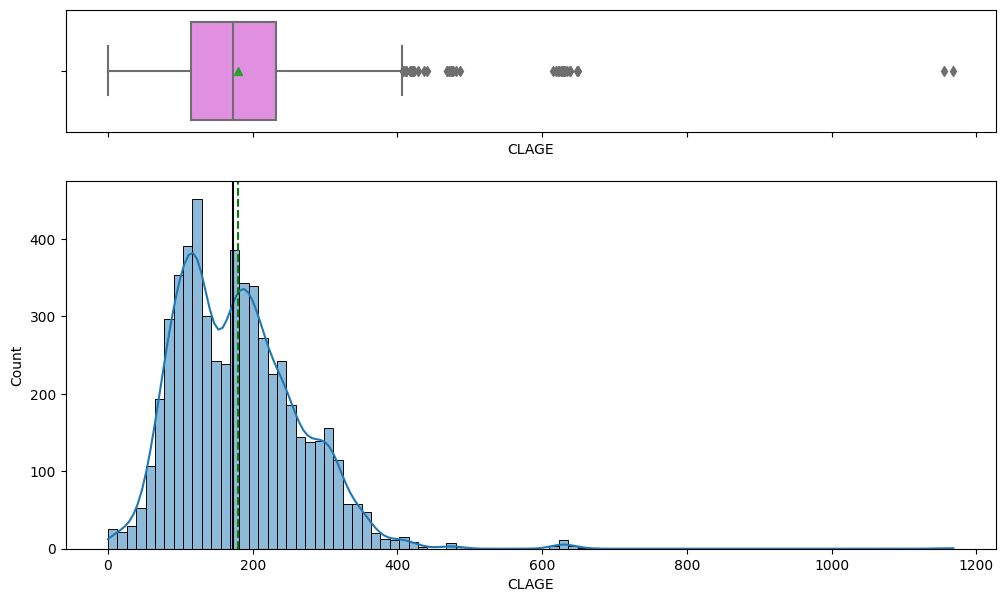

_____________________________________
count    5652.00
mean      179.77
std        85.81
min         0.00
25%       115.12
50%       173.47
75%       231.56
max      1168.23
Name: CLAGE, dtype: float64
_____________________________________
Number of NULL or NaN values: 308
_____________________________________


In [34]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "CLAGE", kde=True)

Observations on CLAGE amount:

The distribution shows a bimodal distribution pattern, with right skew/ right tail. The data has several outliers, and within the outliers too there are few that are way more positive compared to other outliers. Given this column is Age of the oldest line of credit, the outliers could be winzorized or fixed in other ways.

In terms of the data, mean age of Credit Line (CL) is about 180 months, with a Std Deviation of about 86 months. Min value is 0, indicating data is captured for the most recent customers as well. The inter quartile range seems to be logically distributed, except the max value which is due to the number of outliers.

**ACTION:** Validate the potential influence this column has over Customer's Defaulting Chance (BAD).


**3.2.8.Analyzing NINQ data using univaritate analysis**

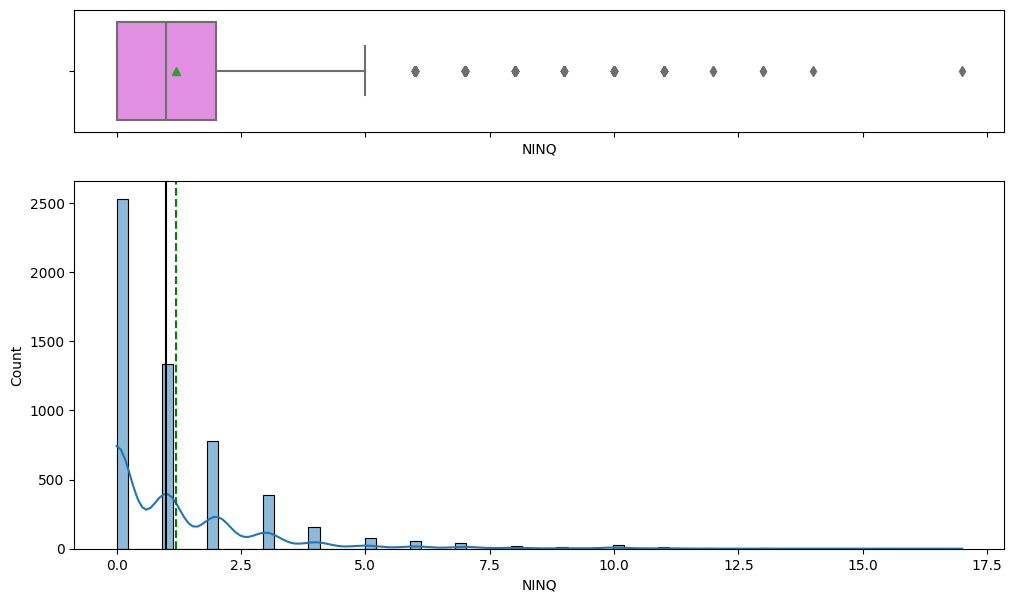

_____________________________________
count    5450.00
mean        1.19
std         1.73
min         0.00
25%         0.00
50%         1.00
75%         2.00
max        17.00
Name: NINQ, dtype: float64
_____________________________________
Number of NULL or NaN values: 510
_____________________________________


In [35]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "NINQ", kde=True)

Observations on NINQ amount:

The data demonstrates decreasing exponential distribution pattern, with right skewed data. Naturally, there are a lot of outliers, indicating there are few customers who have a lot of new credit inquires. There is a high chance such customers could be defaulters (BAD=1) and this should be validated further. A majority of customers have zero new inquires, though there are quite a few customers with low, but potentially un-ignorable new inquiries.

The mean is 1.19 with a std deviation (1.73) that is larger than the mean. Range is min=0 and max=17, due to the number of outliers. 75th percentile is just 2, which shows data is very highly right skewed.

The outlier data could be winsorized as new inquiries exceeding a certain threshold could indicate the same amount of risk and thus the outlier values could be updated to that threshold value.

**ACTION:** Based on how NINQ impacts BAD column status, the outlier treatment can be decided and applied.



**#3.2.9. Analyzing CLNO data using univaritate analysis**

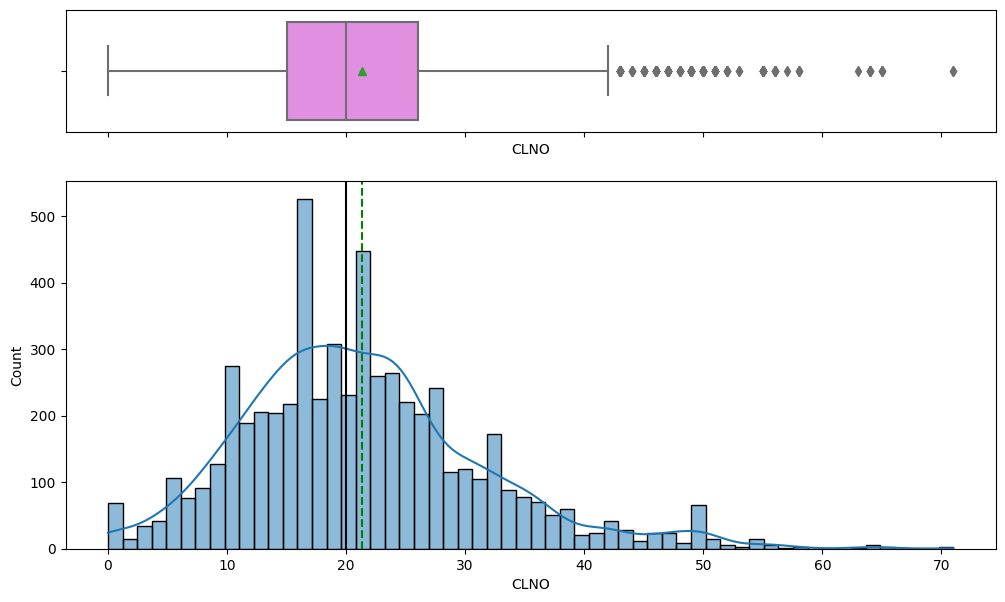

_____________________________________
count    5738.00
mean       21.30
std        10.14
min         0.00
25%        15.00
50%        20.00
75%        26.00
max        71.00
Name: CLNO, dtype: float64
_____________________________________
Number of NULL or NaN values: 222
_____________________________________


In [36]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "CLNO", kde=True)

Observations on CLNO amount:

The data distribution follows a normal distribution, with mean of 21.30 and std deviation of 10.14. The data is right skewed with few outliers. Given this is number of existing credit lines, lower the value the better it is. Min value of 0 indicates customers with no past credit line history, in which case other columns like DEBTINC could be important and should have been considered before the customer was given a loan. Too many existing credit lines could mean higher risk. The ideal value is a very few credit lines indicating customer was validated by other banks already if DEBTINC is healthy. 25th percentile also shows 15 existing credit lines, which is very high and that means most customers have multiple loans and such customers could be posing risks already.


**#3.2.10. Analyzing DEBTINC data using univaritate analysis**

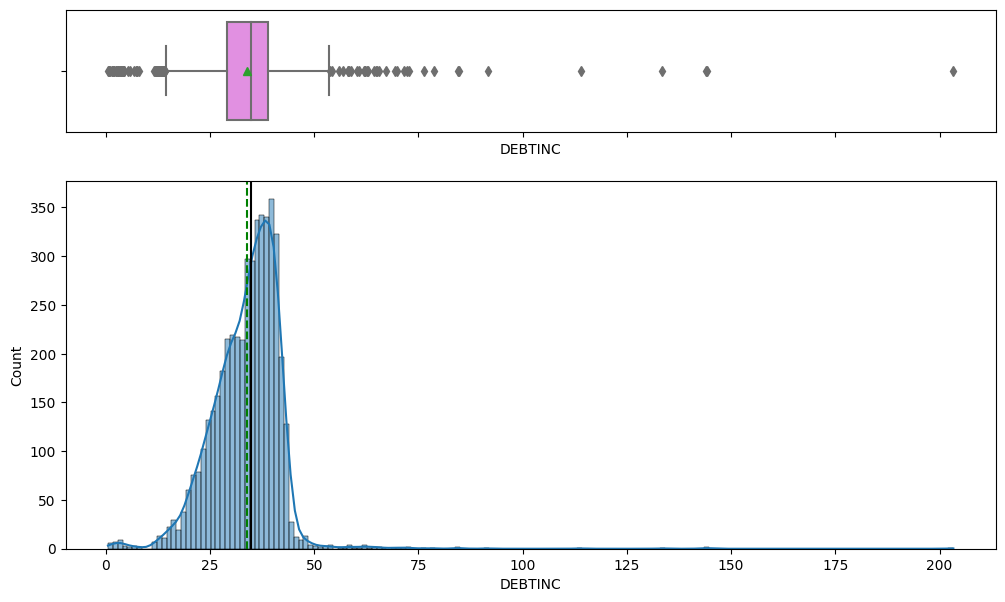

_____________________________________
count    4693.00
mean       33.78
std         8.60
min         0.52
25%        29.14
50%        34.82
75%        39.00
max       203.31
Name: DEBTINC, dtype: float64
_____________________________________
Number of NULL or NaN values: 1267
_____________________________________


In [37]:
# Plotting the Loan amount
histogram_boxplot_describe(df, "DEBTINC", kde=True)

Observations on DEBTINC amount:

DEBTINC is a ratio column like called out earlier as well - it is total debt divided by total income. Lower values mean better customer and vice versa. For proportional values of debt to income i.e. low debt & low income vs high income & high income should result in similar DEBTINC values. The only time DEBTINC will be bad is when existing DEBT is higher (possibly indicated by too many existing credit lines or new inquiries) than INCOME (possibly indicated by low YOJ, or high DEROG, or high DELINQ, or even low VALUE).

Thus, low mean would be ideal. Min value is a good customer, hence starting with it. Min=0.52, whereas Mean=33.78 which is already very high. That means the number of customers with bad DEBTINC is quite high. Std Deviation of 8.6 is also high given very low min. 25th quartile is already high. Max value of 203.31 is exceptionally high.

Due to lack of domain knowledge, it is hard to guage the absolute meaning of these values. Internet search does not help either. So, assuming based on relative range of DEBTINC values, most customers of this bank have unhealthy credit DEBTINC values.

**ACTION:** Check via bivariate and multivariate analysis how DEBTINC is related to loan status (BAD).


####**Univaritate Analysis for Categorical Columns**

**#3.2.11. Analyzing categorical column: REASON via univaritate analysis**

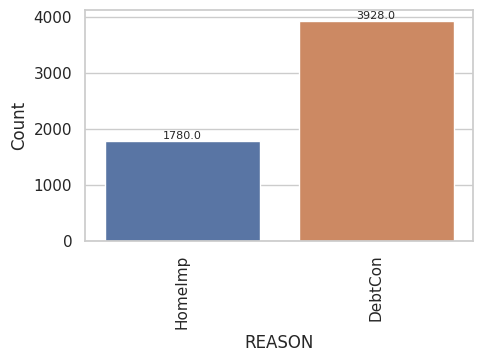

_____________________________________
Number of NULL or NaN values: 252
_____________________________________


In [38]:
# Visually validating data in Current Occupation column
# count_plot_for_categorical_columns(df,'REASON')
count_plot_for_categorical_columns_and_null_value_check(df,'REASON')

Observations on REASON amount:

Most used REASON for taking a loan is DebtConsolidation, which indicates, there should be existing lines of credit i.e. CLNO > 0. The other REASON is HomeImprovement. There are 252 rows with no REASON.

**#3.2.12. Analyzing categorical column: JOB via univaritate analysis**

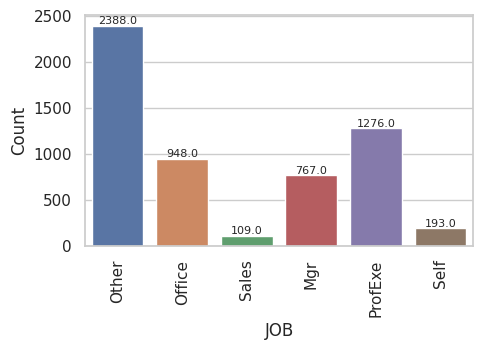

_____________________________________
Number of NULL or NaN values: 279
_____________________________________


In [39]:
count_plot_for_categorical_columns_and_null_value_check(df,'JOB')

Observations on JOB amount:

Most customers fall under JOB=Other, which indicates a deficiency in loan application software as it may not be offerring real world list of job titles. JOB=ProExe is the highest given job title with 1276 rows, followed by JOB=Office with 948 rows. JOB=Office also does not convey much, other than the fact that the customer is in an assumed office job - this can almost be treated as JOB=Other. JOB=Mgr is the next highest with 767 rows, followed by JOB=Self (193), which again is very generic and does not explain the type of self-employment. Least is JOB=Sales (109). There are also 279 null or NaN values. Overall, this column is not conveying much. Its impact on SAFE vs. BAD LOAN needs to be validated.

### **3.3. Bivariate Analysis**

**3.3.1. Correlation Matrix Plotting:**

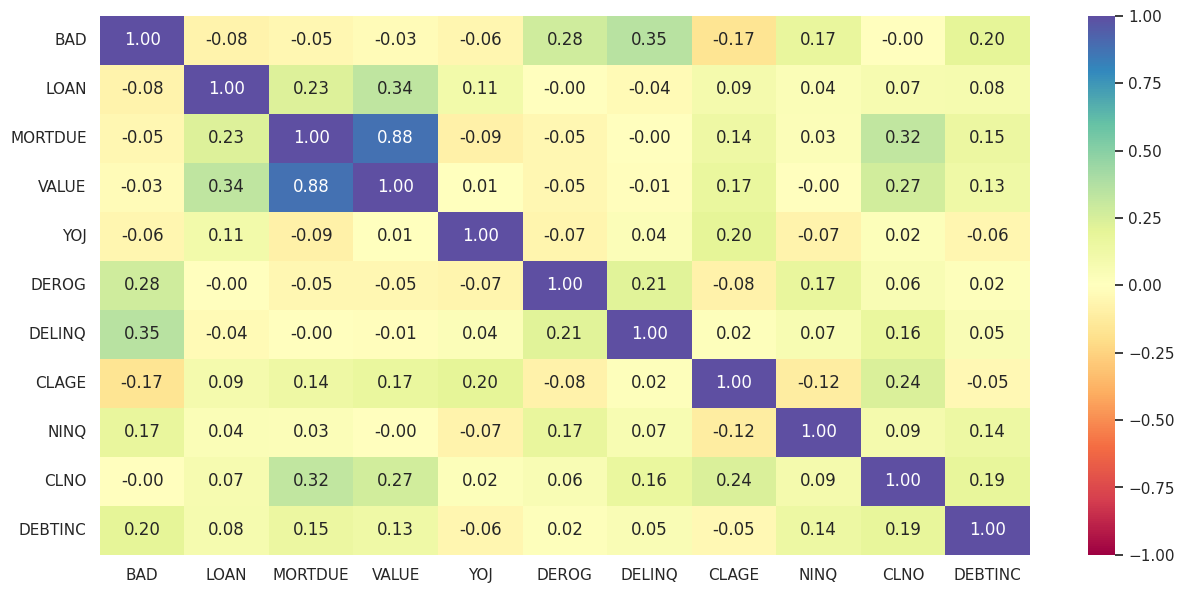

In [40]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

Observations from Correlation:

1. MORTDUE and VALUE are highly correlated, with a score of 0.88. Both are properties of existing customer home loan, and thus the correlation is highly logical. Both columns seem to influence the amount of loan that would be lended out to the customer, given the correlation values of 0.23 and 0.34 respectively on LOAN column.
2. A customer having a MORTDUE and home with a certain VALUE indicates presence of existing loans, as indicated by correlation value of 0.32 and 0.27 scores against CLNO respectively. This needs to be viewed negatively as it introduces a risk when CLNO is high. MORTDUE and VALUE have a negligible negative correlation with DELINQ and that counters the CLNO angle.
3. DELINQ has the highest correlation of 0.35 showing the strongest correlation to BAD loans. Positive value shows higher the DLINQ, the chances of loan being BAD are higher too, and vice versa.
4. DEROG has the next highest correlation with 0.28, again with positive value. More the number of DEROG reports, the chances of loan being BAD are higher & vice versa.  
5. DELINQ and DEROG are correlated amongst themselves with a value of 0.21, explaining a customer with DELINQ history would have DEROG reports and vice versa. The correlation isn't strong, but exists and hence making a note. Both would have an impact on customer's ability to repay, and we have already established how these columns are impacting loan status.
6. DEBTINC has the next most correlation to loan status and has a positive value indicating higher the DEBTINC value, higher the chances of loan being BAD.
7. NINQ has a considerable value of 0.17, though this is not a large influence on BAD loans. However, a positive number incdicates that more new credit inquiries mean the customer is looking for money and the chances of defaulting on loan increases.
8. YOJ also has some correlation to the LOAN amount that will be lended (correlation 0.11), and this looks logical as more the experience, more is the potential, thus greater is the loan. There will be exceptions to this rule given weak correlation and knowledge of the world that new employees in high paying jobs can get large loans.
9. There is positive correlation between the HELOC Loan Value and MORTDUE (0.23) vs. VALUE (0.34).
10. There are no major negative correlations indicating there are no inversely proportional relationships.

**3.3.2. Using clues from Correlation Matrix, validating the features that impact BAD loan the most**

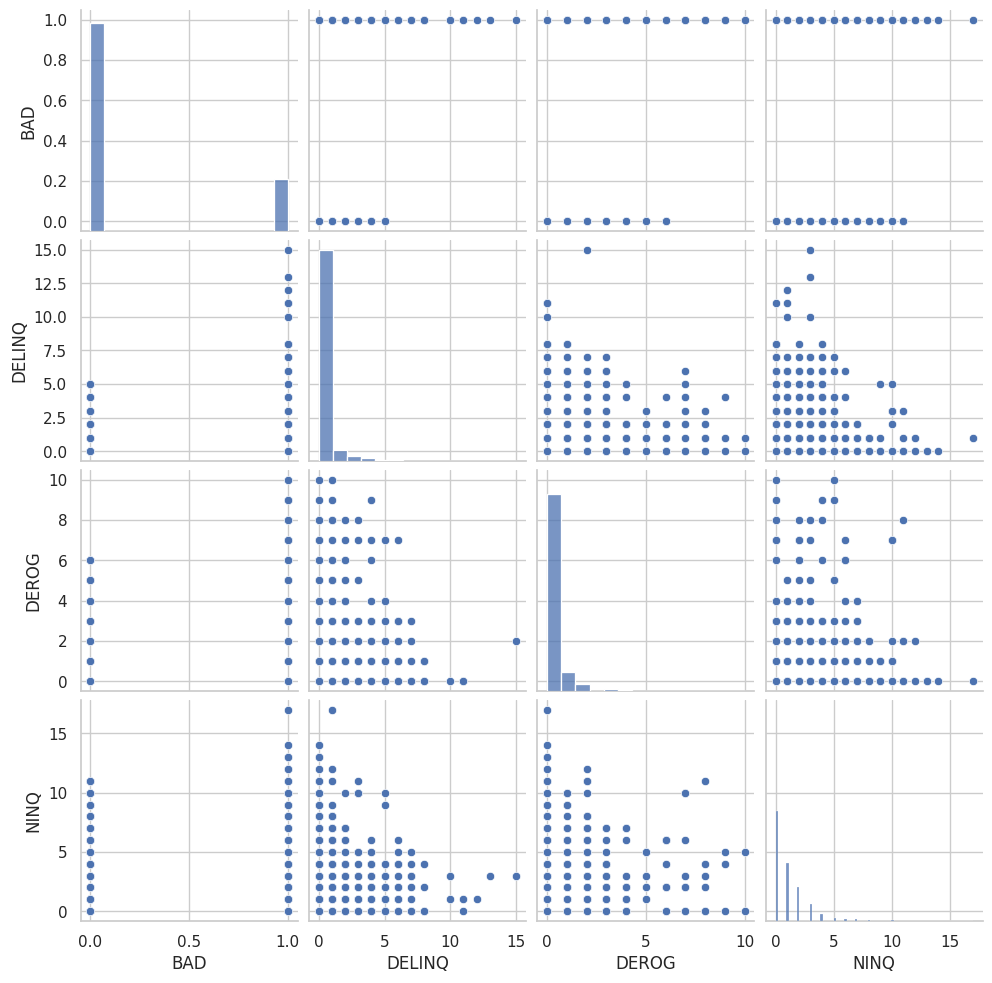

In [41]:
sns.pairplot(data=df[['BAD','DELINQ','DEROG','NINQ']])
plt.show()

Observations from Pairlot:

It makes sense to drill into the impact of each of these columns on BAD Loan status based on how data is plotting in the pairplot

**3.3.2. DELINQ vs BAD Loans: Additionally peeking into this relation**

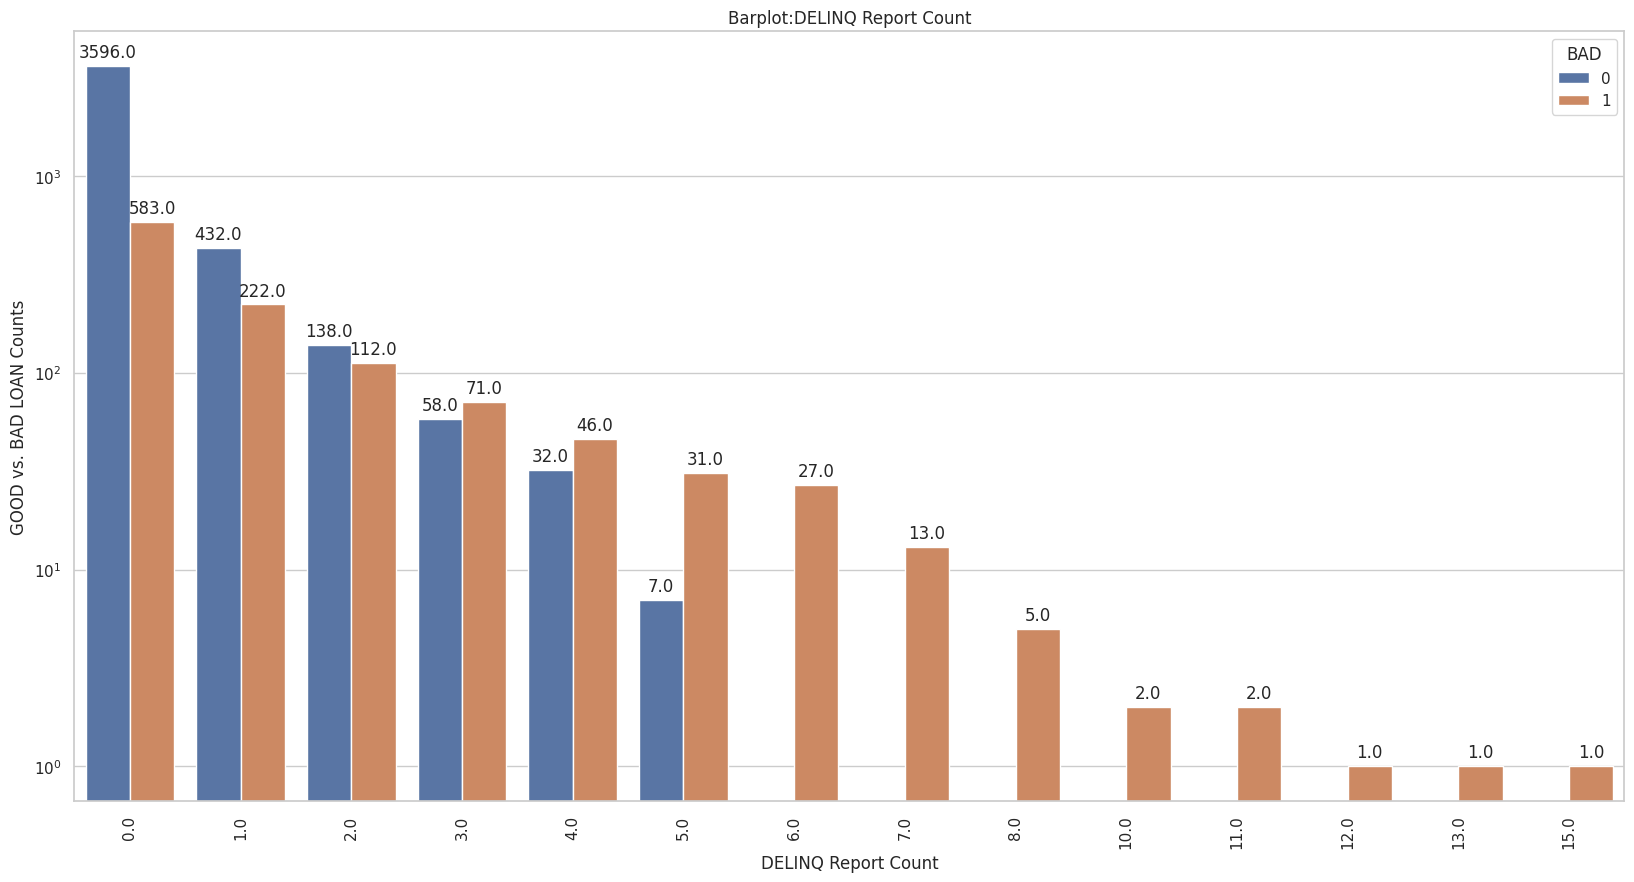

In [42]:
plt.figure(figsize=(20,10))
plt.title('Barplot:DELINQ Report Count')
# Given the disportionate level between highest and lowest values, using a log scale to plot the graph
plt.yscale('log')
ax=sns.countplot(data=df, x='DELINQ',hue='BAD')
# Display actual count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('DELINQ Report Count');
plt.ylabel('GOOD vs. BAD LOAN Counts')
plt.xticks(rotation=90);
plt.show()

Observations about impact of Number of DELINQ Reports on the Loan Status:

DELINQ=0 i.e. ZERO DELINQ Reports:

As expected, at zero DELINQ count, there are most number of SAFE-Loans=3696, but there are also BAD-Loans=583. This means, there are defaulters with no prior history of DELINQ Reports. In such a case there may be other factors that indicate defaulting possibilities and needs to be analyzed.

DELINQ > 0 and DELINQ < 5 i.e. 1 to 5 DELINQ Reports:
There are considerable number of GOOD Loans in spite of minor Delinquency. But, as expected, existance of DELINQ reports highly implies BAD Loans and defaulting customer. The probability of a customer defaulting is very high, mostly greater than 50% once a customer has DELINQ report. The probability is about a 3rd when the first report comes out.   

DELINQ > 5 i.e. 6 or more DELINQ Reports:
If a customer has more than 5 DELINQ reports, then the default impact on the loan is negative i.e. loan is defaulted. This is a critical correlation and can be used for data correction strategy as well.



**3.3.3. DEROG vs BAD Loans: Additionally peeking into this relation**

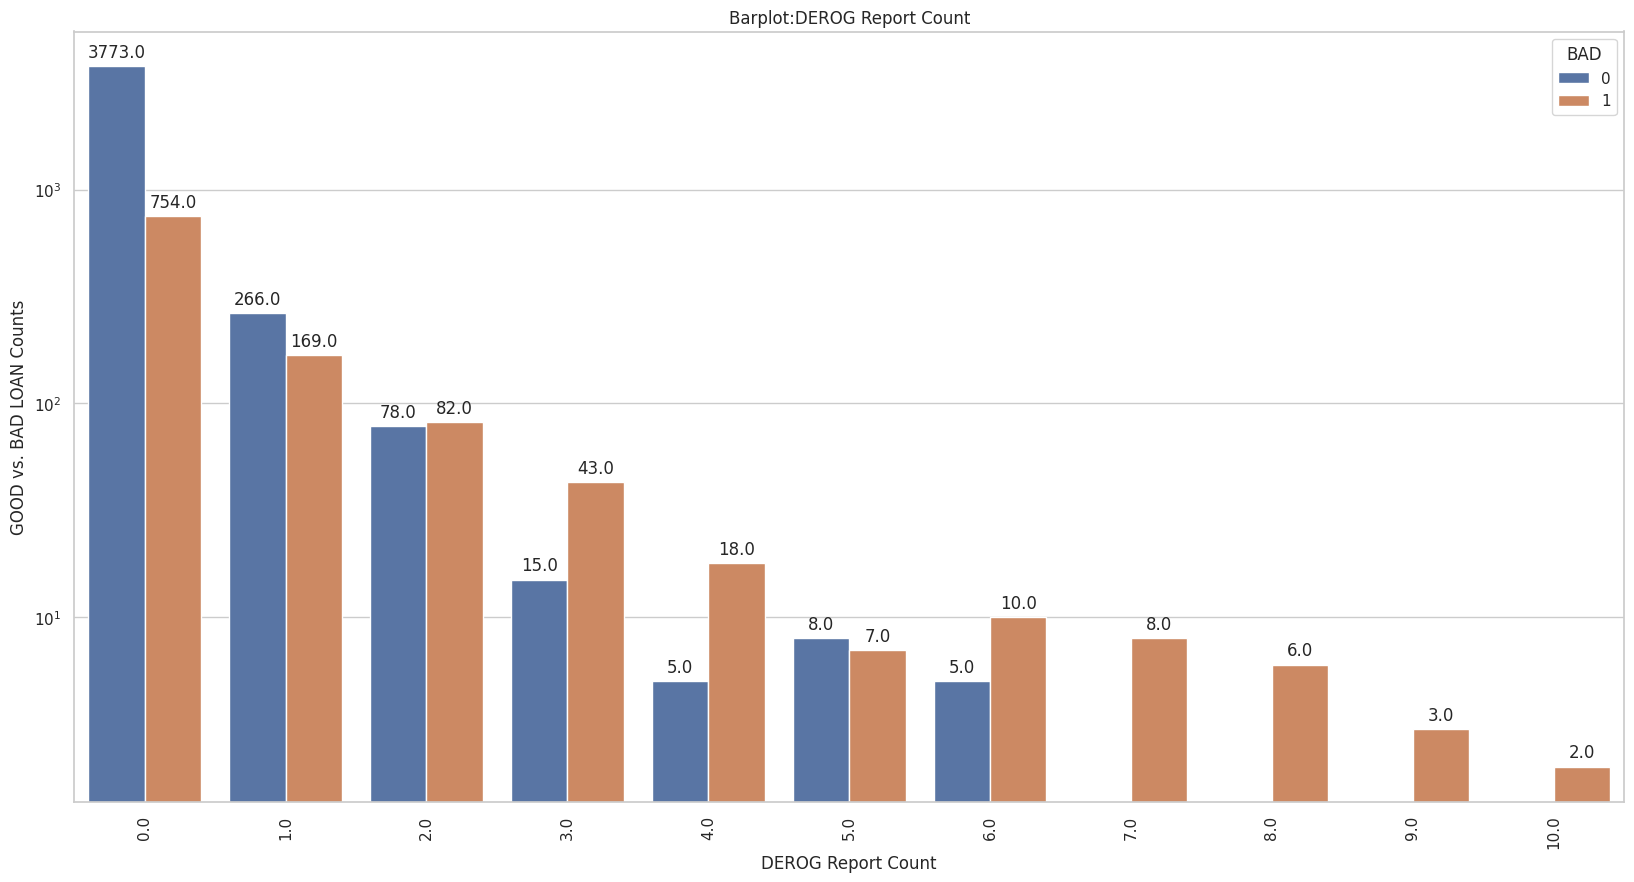

In [43]:
plt.figure(figsize=(20,10))
plt.title('Barplot:DEROG Report Count')
# Given the disportionate level between highest and lowest values, using a log scale to plot the graph
plt.yscale('log')
ax=sns.countplot(data=df, x='DEROG',hue='BAD')
# Display actual count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('DEROG Report Count');
plt.ylabel('GOOD vs. BAD LOAN Counts')
plt.xticks(rotation=90);
plt.show()

Observations about impact of Number of DEROG Reports on the Loan Status:

DEROG=0 i.e. ZERO DEROG Reports:

As expected, at zero DEROG count, there are most number of SAFE-Loans=3773, but there are also BAD-Loans=754. This means, there are defaulters with no prior history of DEROG Reports. In such a case there may be other factors that indicate defaulting possibilities and needs to be analyzed.

DEROG > 0 and DEROG < 6 i.e. 1 to 6 DEROG Reports:
There are considerable number of GOOD Loans in spite of minor Degrogatory Reports. But, as expected, the moment there are DEROG reports, the chances of the customer defaulting are very high. In most cases, the chances of a customer defaulting are more than 50%, except when a customer has  first DEROG report.

DEROG > 6 i.e. 7 or more DEROG Reports:
If a customer has more than 6 DEROG reports, then the default impact on the loan is negative i.e. loan is defaulted. This is a critical correlation and can be used for data correction strategy as well.



**3.3.4. NINQ vs. BAD Loans - Additionally peeking into this relationship**

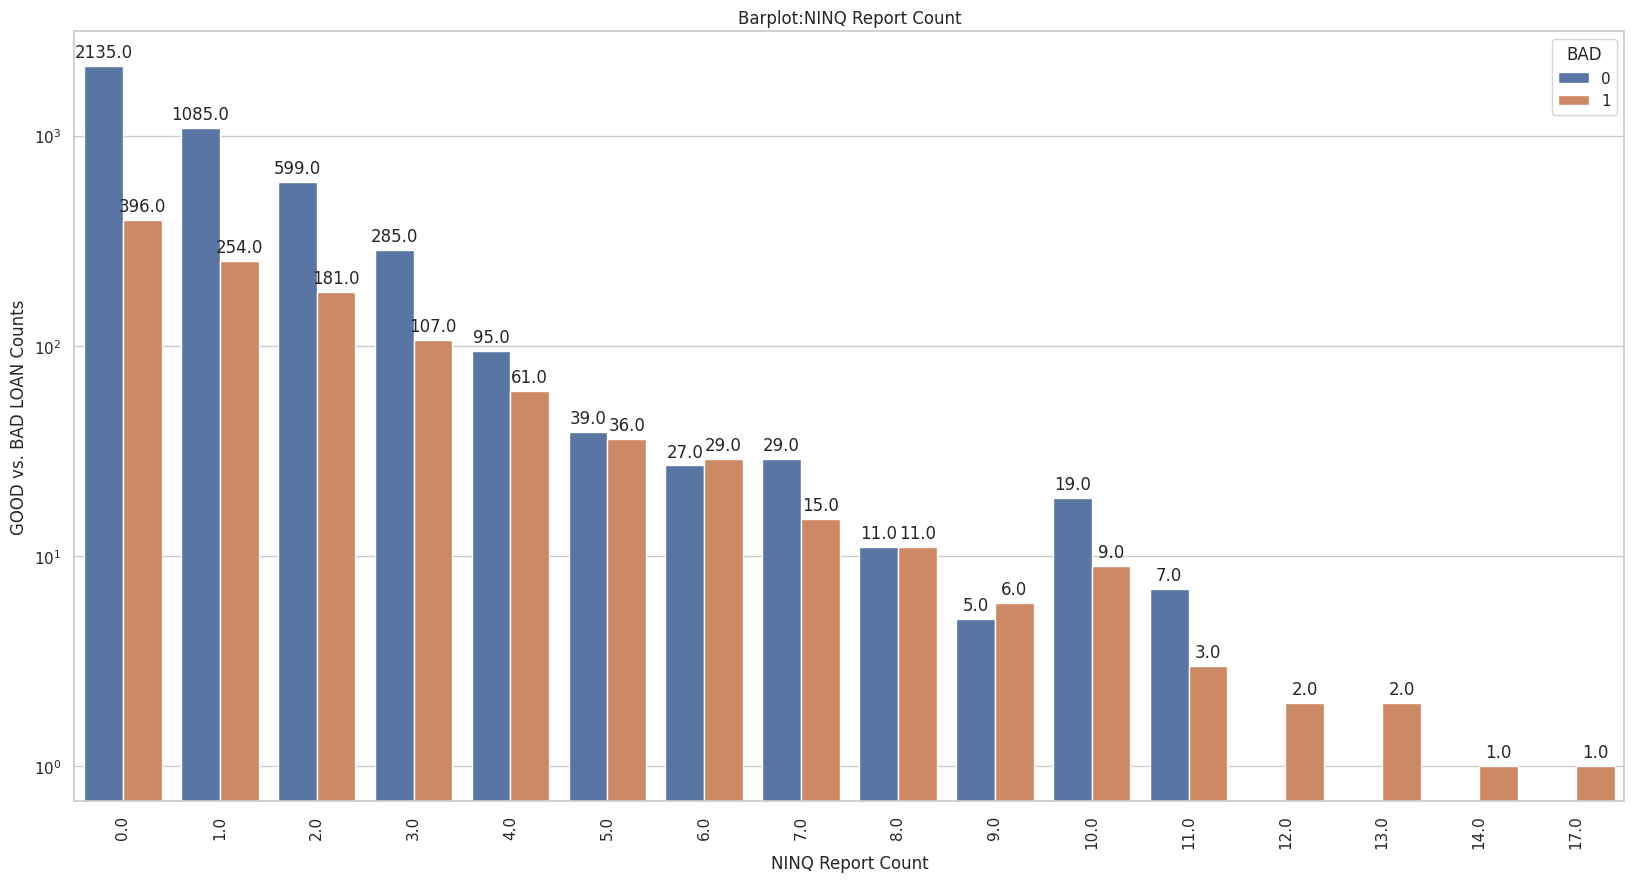

In [44]:
plt.figure(figsize=(20,10))
plt.title('Barplot:NINQ Report Count')
# Given the disportionate level between highest and lowest values, using a log scale to plot the graph
plt.yscale('log')
ax = sns.countplot(data=df, x='NINQ',hue='BAD')
# Display actual count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('NINQ Report Count');
plt.ylabel('GOOD vs. BAD LOAN Counts')
plt.xticks(rotation=90);
plt.show()

Observations about impact of Number of NINQ Reports on the Loan Status:

NINQ = 0 i.e. ZERO NINQ Reports:

As expected, at zero DELINQ count, there are most number of SAFE-Loans=2135, but there are also BAD-Loans=396. This means, there are potential defaulters who are looking for a new credit line for the very first time. In such a case there may be other factors that indicate defaulting possibilities and needs to be analyzed.

NINQ = 1 or NINQ = 2
There are 1085 and 599 customers each who have enquired once or twice about a new credit line, but haven't defaulted yet and are GOOD customers. However, at the same level of LOW new credit line inquiries, there are 254 and 181 customers who have defaulted soon after new inquiries.

There are customers who have upto 11 new inquiries, yet they are paying their loans and haven't defaulted yet. The number of GOOD customers with new inquiries is a decreasing exponential graph though.

**3.3.5. YOJ vs. BAD Loans - Additionally peeking into this relationship**

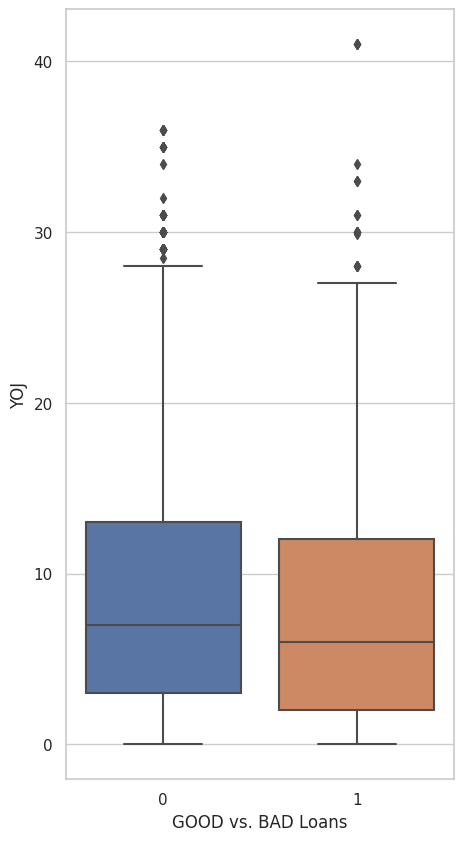

In [45]:
plt.figure(figsize = (5, 10))
sns.boxplot(x='BAD', y='YOJ', data=df)
plt.ylabel('YOJ')
plt.xlabel('GOOD vs. BAD Loans')
plt.show()

Observations on impact of YOJ on GOOD vs. BAD Loan Status:

YOJ, is years at present job, hence high YOJ is better in comparison to low YOJ as a general rule. We can see the mean YOJ is higher for GOOD customers compared to BAD (Defaulting) Customers, though the gap in mean YOJ is not much.

Having more YOJ Outliers for GOOD Loan is actually good, and we can see there are more people with very high YOJ who are GOOD Customers. However, there is a significant number of experienced professionals/ customers who have HIGH YOJ and yet, they are defaulters.

Both GOOD and BAD Customers have ZERO YOJ, which means there are customers with new jobs who have both paid their loans vs. defaulted. But the lower 25th quartile on defaulting customers list shows there are more defaulters with LOW YOJ.

**3.3.6. (MORTDUE vs VALUE) and impact on LOAN STATUS**

**3.3.6.1. Relation between MORTDUE vs LOAN - using Scatterplot**

The idea is to validate the findings from Correlation Matrix and checking how MORTDUE vs. LOAN relate to each other, and then also check how both MORTDUE and LOAN affect GOOD/ BAD Loan Status.

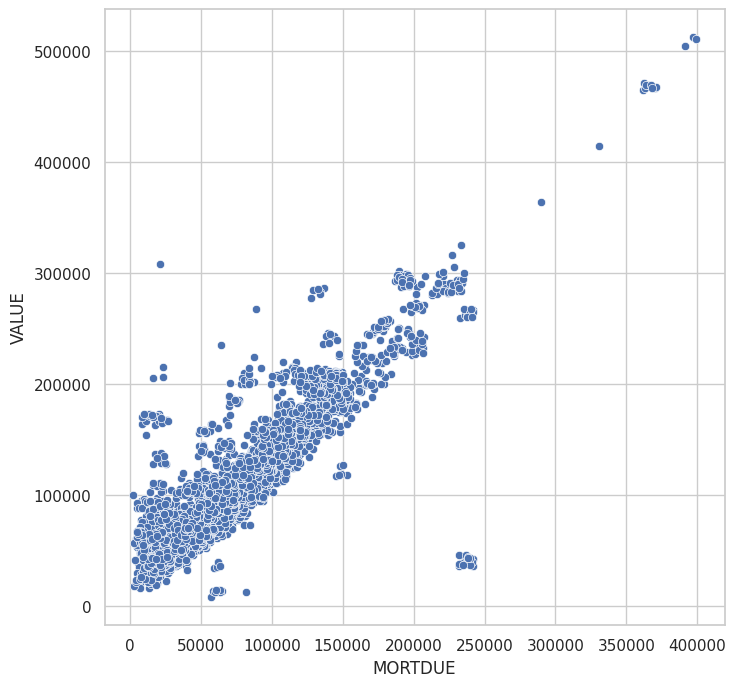

In [46]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data=df, x='MORTDUE', y='VALUE')
plt.show()

Observations from BAD vs. (MORTDUE & VALUE)

MORTDUE and LOAN have a linear relationship. MORTDUE is expected to be lesser than VALUE, and that has been the finding from data scans thus far. The existance of a linear relationship means including both these columns during Model Training will cause multi-colinearity issues.

Given MORTDUE gives an indication of Customer DEBT and impacts the DEBTINC value, deciding to analyze MORTDUE vs. GOOD/ BAD Loan relationship. Dropping any further analysis on VALUE column, as its impact on Loan Status is well represented by MORTDUE instead.

For missing value treatments across either of the columns, if one is known, a fair guess on the other can be made. As we have decided to take MORTDUE forward, we will focus on fixing missing values in MORTDUE using VALUE data where it exists.

**3.3.6.2. MORTDUE vs. BAD Loans - Additionally peeking into this relationship**

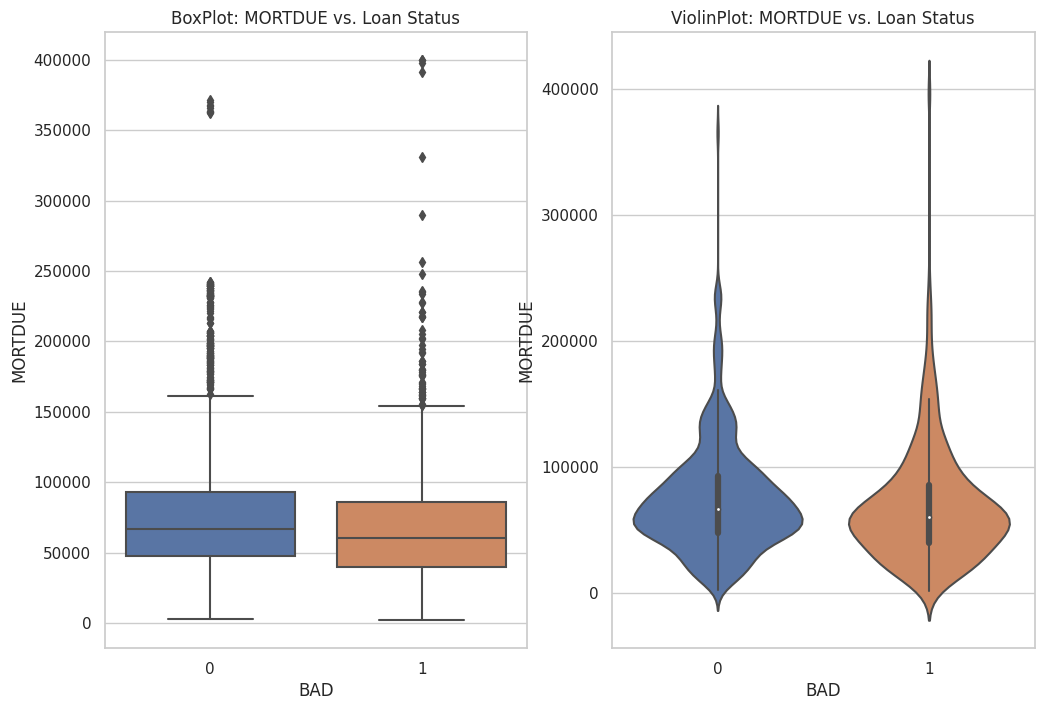

In [47]:
# Plotting both Box and Violin Plots
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

#Boxplot
sns.boxplot(x='BAD', y='MORTDUE', data=df, ax=axes[0])
axes[0].set_title('BoxPlot: MORTDUE vs. Loan Status')

#Violon Plot
sns.violinplot(x='BAD', y='MORTDUE', data=df, ax=axes[1])
axes[1].set_title('ViolinPlot: MORTDUE vs. Loan Status')

plt.show()

Observations based on MORTDUE's impact on GOOD vs. BAD Loans:

The mean for MORTDUE for GOOD Loans is higher than the mean for MORTDUE for Bad Loans. This tells us that customers with higher existing Mortgages have a better payback potential and thus tend to default less. The spread of customers, from violin plot, is nearly the same for both good and bad loans an the most common MORTDUE value seems to be in USD 70,000 range.

There are many outliers on either side. This means there are enough customers with high existing mortage that are successfully paying the HELOC loans, but there are many customers who are defaulting too. In general though, there seem to be more outliers on the BAD/ DEFAULING side where high existing mortgage means higher chance of defaulting.

The data needs to be modified to reanalyze again. Maybe bucketing the loans with or without log scaling will be needed, after which the impact of MORTDUE should be reassessed on LOAN Status.

**3.3.7. DEBTINC vs MORTDUE and DEBTINC vs BAD/ GOOD Loan Status - using Box & Violin Plot**

**3.3.7.1. Relation between DEBTINC vs MORTDUE**

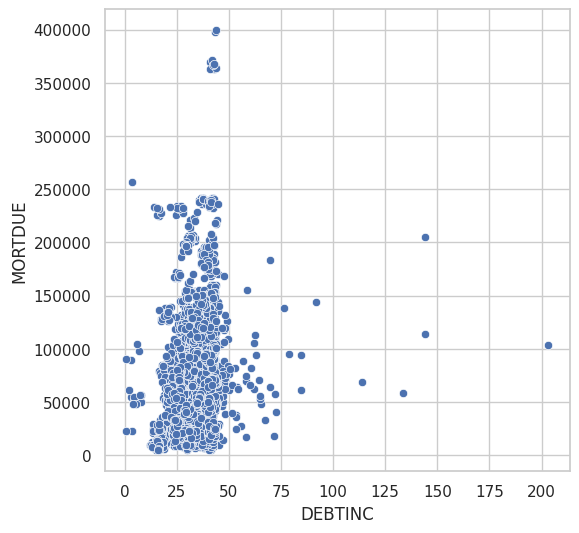

In [48]:
plt.figure(figsize = (6, 6))
sns.scatterplot(data=df, x='DEBTINC', y='MORTDUE')
plt.show()

Observations based on relation between MORTDUE and DEBTINC

We know that smaller the DEBTINC ratio, better is the customer health & vice versa. Hence, on the X-axis, values on the left side are better customers, while customers on the right or far right indicate potential defaulters. We also know from Univariate Analysis of DEBTINC that the mean is 33.38, and that is where most concentration of dots it.

For any given very good to good DEBTINC value, the range of MORTDUE is highly varying from small value loans to very large volumn loans. Based on absolute value of the loans, for any given DEBTINC value, larger loans pose higher risks, and there are many large value loans that are higher than 100,000 USD.

There are few outliers for MORTDUE, which are potentially very high risk, even if their DEBTINC is good. Likewise, there are outliers along the X-axis, that are definite risks irrespective of the MORTDUE, as high DEBTINC indicates poor repaying capability.

**3.3.7.2. DEBTINC vs. BAD Loans - Additionally peeking into this relationship**

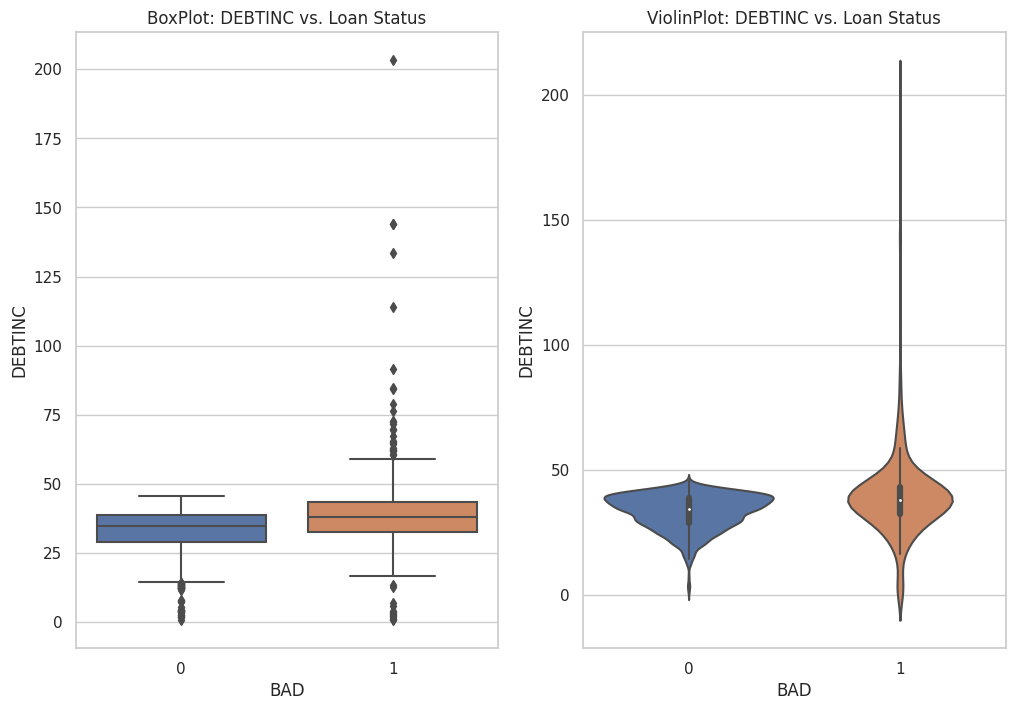

In [49]:
# Plotting both Box and Violin Plots
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

#Boxplot
sns.boxplot(x='BAD', y='DEBTINC', data=df, ax=axes[0])
axes[0].set_title('BoxPlot: DEBTINC vs. Loan Status')

#Violon Plot
sns.violinplot(x='BAD', y='DEBTINC', data=df, ax=axes[1])
axes[1].set_title('ViolinPlot: DEBTINC vs. Loan Status')

plt.show()

Observations from DEBTINC impact on GOOD vs. BAD Loans:

Clearly, the Good Customers have a better mean DEBTINC value in comparison to a slightly higher DEBTINC for Bad (Defaulting) Customers. That said, for similar low DEBTINC value, which is considered better than having high DEBTINC, there are Good and Bad Customers. The width of the violin plot around the upper whisker of the bokplot for good loans, suggests that bank has most number of customers with DEBTINC~40, and a near equal spread of good vs. bad customers.

The first clear differentiation shows up beyond DEBTINC ~ 45, after which the customers clearly fall under defaulters. The 75th quartile range and upper whisker for Bad Customers is much higher than the values for Good Customers.

**3.3.8. CLNO  vs. BAD Loans - Additionally peeking into this relationship**

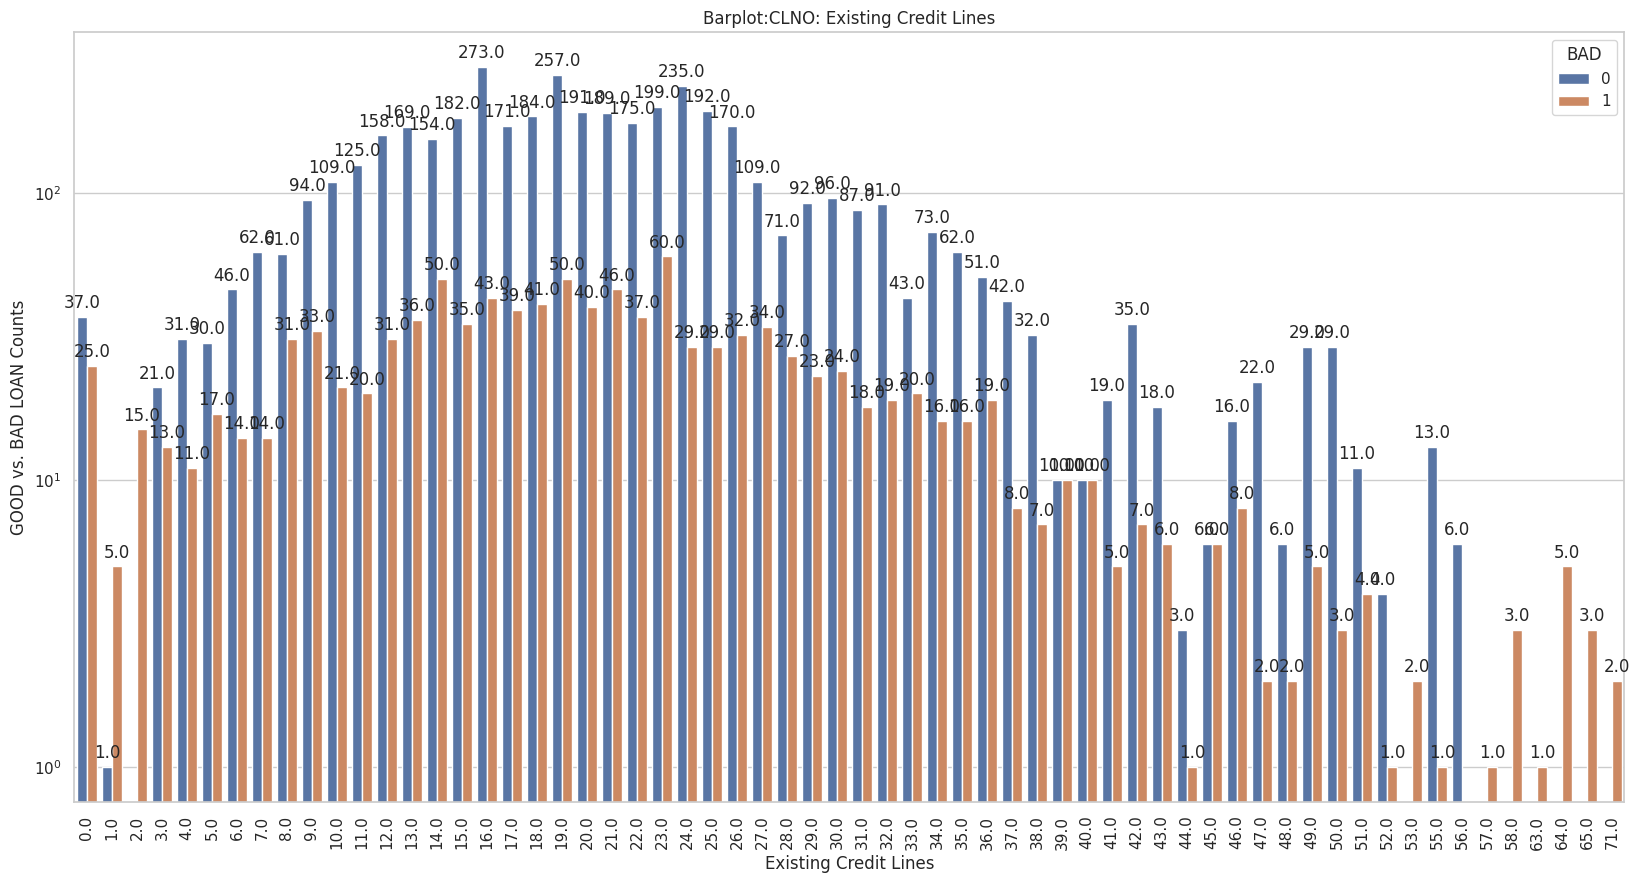

In [50]:
plt.figure(figsize=(20,10))
plt.title('Barplot:CLNO: Existing Credit Lines')
# Given the disportionate level between highest and lowest values, using a log scale to plot the graph
plt.yscale('log')
ax = sns.countplot(data=df, x='CLNO',hue='BAD')
# Display actual count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Existing Credit Lines');
plt.ylabel('GOOD vs. BAD LOAN Counts')
plt.xticks(rotation=90);
plt.show()

Observations on how Number of existing Credit Lines (CLNO) affects GOOD/ BAD Loan Status:

First thing to notice is that across CLNO=0, there are significant number of GOOD and BAD loans, both. Across the ranges of values, with few exceptions like CLNO=1 or CLNO=44, the number of BAD loans exceeds the threshold of 10. The number of GOOD loans are far higher, but across GOOD vs. BAD loans, the data patterns are similar. The correlation matrix showed a score of -0.00, and that can be further seen in this analysis, as no clear pattern seems to emerge.

**3.3.8. CLAGE  vs. BAD Loans - Additionally peeking into this relationship**

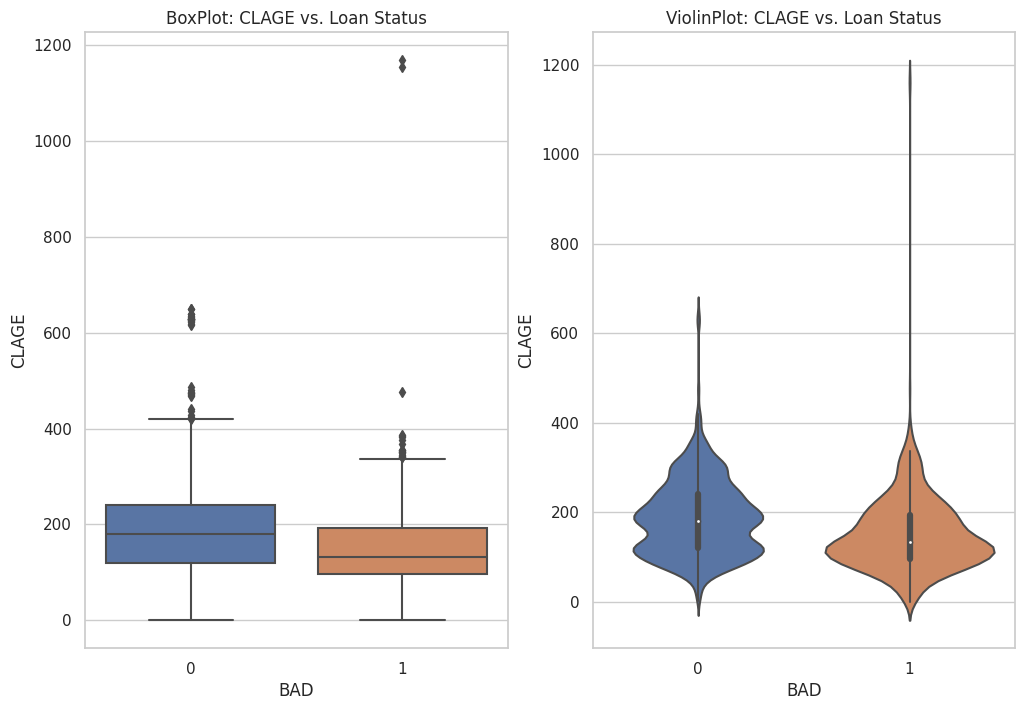

In [51]:
# Plotting both Box and Violin Plots
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

#Boxplot
sns.boxplot(x='BAD', y='CLAGE', data=df, ax=axes[0])
axes[0].set_title('BoxPlot: CLAGE vs. Loan Status')

#Violon Plot
sns.violinplot(x='BAD', y='CLAGE', data=df, ax=axes[1])
axes[1].set_title('ViolinPlot: CLAGE vs. Loan Status')

plt.show()

Observations on how Age of Credit Line (CLAGE) relates to GOOD/ BAD Loan Status:

GOOD Loans have a higher CLAGE mean as compared to BAD Loans. The interquartile ranges are similarly better for GOOD Loans as compared to BAD Loans. There are outliers across both GOOD and BAD loans, but the BAD loans have extreme outliers, suggesting that if the age of credit line is too old, there is more chance that the customer may default (maybe because the customer could not payoff the existing home loan for so long). Looking at th violin plot, the most number of customers for both GOOD vs. BAD loans for a given CLAGE value seem to be comparable, though for GOOD Loans, around CLAGE 150 months, there seem to be fewer GOOD customers.

**3.3.9. JOB Title vs. BAD Loans - Additionally peeking into this relationship**

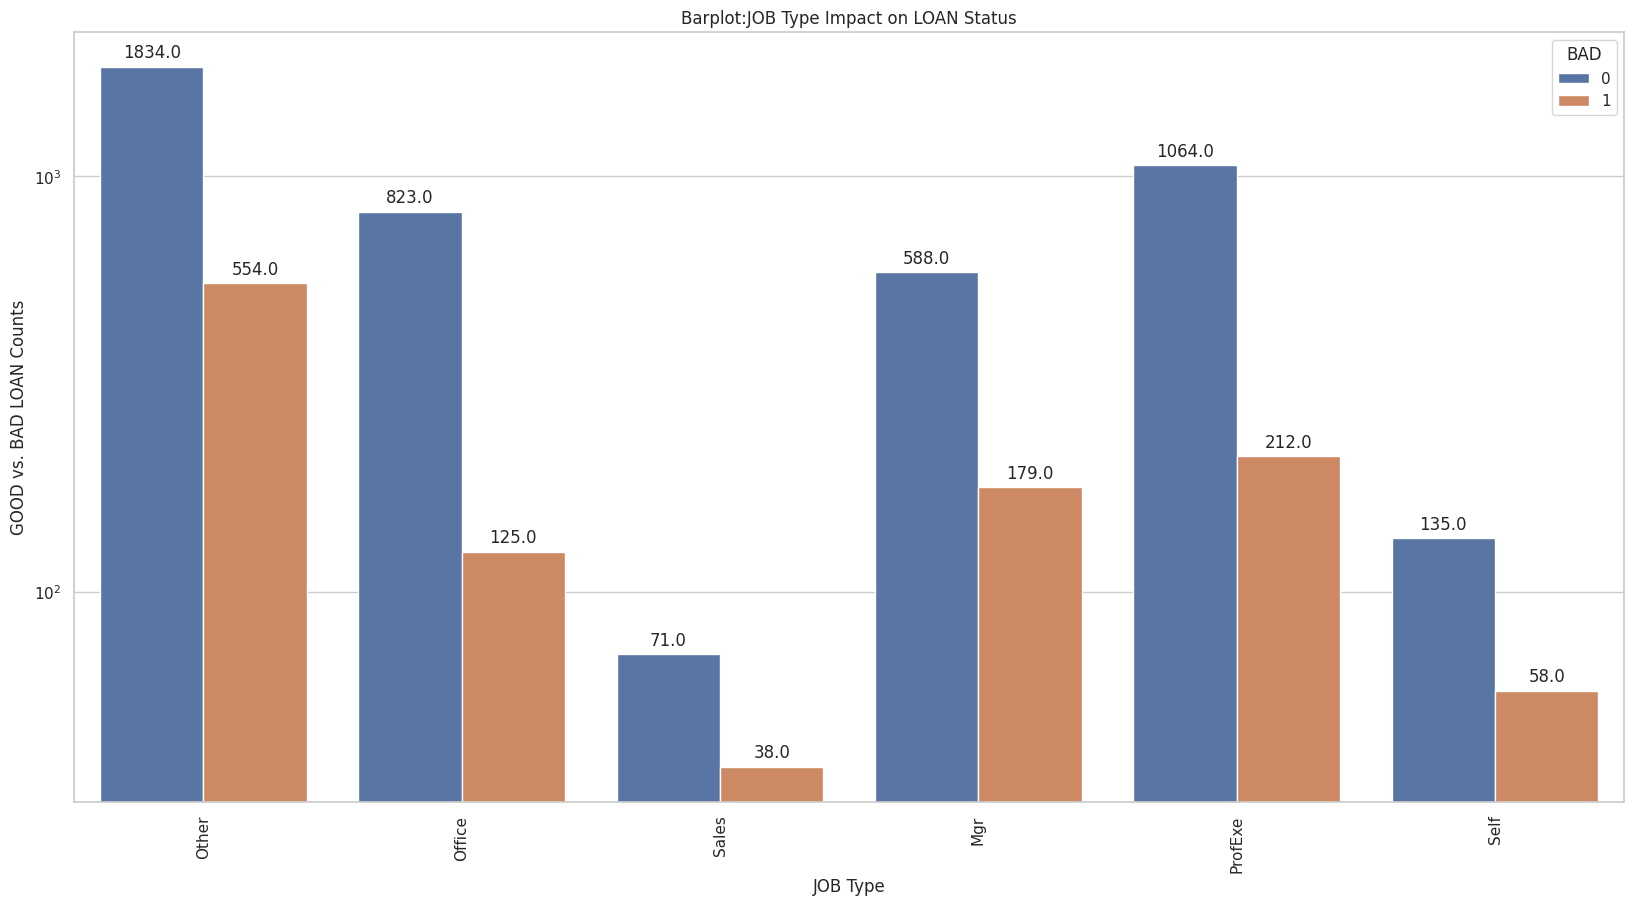

In [52]:
plt.figure(figsize=(20,10))
plt.title('Barplot:JOB Type Impact on LOAN Status')
# Given the disportionate level between highest and lowest values, using a log scale to plot the graph
plt.yscale('log')
ax = sns.countplot(data=df, x='JOB',hue='BAD')
# Display actual count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('JOB Type');
plt.ylabel('GOOD vs. BAD LOAN Counts')
plt.xticks(rotation=90);
plt.show()

Observations about Type of Job vs. how it affects GOOD/ BAD Loan Status:

The absolute number of of defaulters fall under the JOB=Other. This description does not convey a lot of information about the customer, and understandably could be misleading the loan officer. Sales professionals seem to have the least defaulters, even though the total number of customers in sales seem to be low as well. Self employed professionals seem to be good customers as well. Professional Executives and Manager job types seem to have more defaulters, which is slightly unexpected in comparison to Job=Office with 125 defaulters, which is also less informative.

The analysis will be incomplete without looking at good customer metrics across these job types. Most good customers are also almost similar distributed as defaulters - with most under Other category, ProfExe, Office, Mgr, Office, Self in that order.

**3.3.10. Impact of Reason on the Loan Status (BAD), DEBTINC and CLNO**

**3.3.10.1. Reason vs. BAD Loans - Additionally peeking into this relationship**

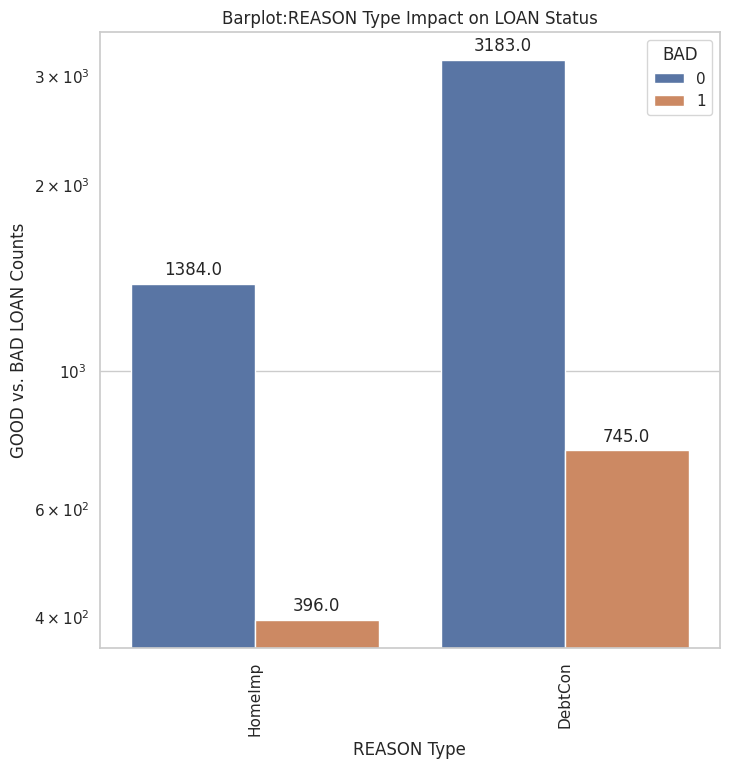

In [53]:
plt.figure(figsize=(8,8))
plt.title('Barplot:REASON Type Impact on LOAN Status')
# Given the disportionate level between highest and lowest values, using a log scale to plot the graph
plt.yscale('log')
ax = sns.countplot(data=df, x='REASON',hue='BAD')
# Display actual count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('REASON Type');
plt.ylabel('GOOD vs. BAD LOAN Counts')
plt.xticks(rotation=90);
plt.show()

Observations about Reason vs. GOOD/ BAD Loan Status:

DebtConsilidation by description tells us that customer has multiple existing credit lines and taking a HELOC is customer's way to consolidate and simplify the loans. This could mean such customers have poor DEBTINC values. Now, looking at the metrics from the Countplot, 745 defaulters is a high absolute number. However, only 19% of the DebtCon customers defaulted. On the other hand, HomeImp seems a safer reason, but we notice it has 22% defaulters. But, the absolute number of defaulters is far less at 396 defaulters. The number of good customers are higher on the DebtCon side due to sheer numbers, where as HomeImp has 1384 good customers.

**3.3.10.2. Reason vs. DEBTINC Loans - Additionally peeking into this relationship**

Validating this as Correlation matrix did not cover categorical column REASON, and based on how REASON affects LOAN Status, it looks logical to validate if REASON has any influencing patterns on what DEBTINC might be, especially for REASON=HomeCon

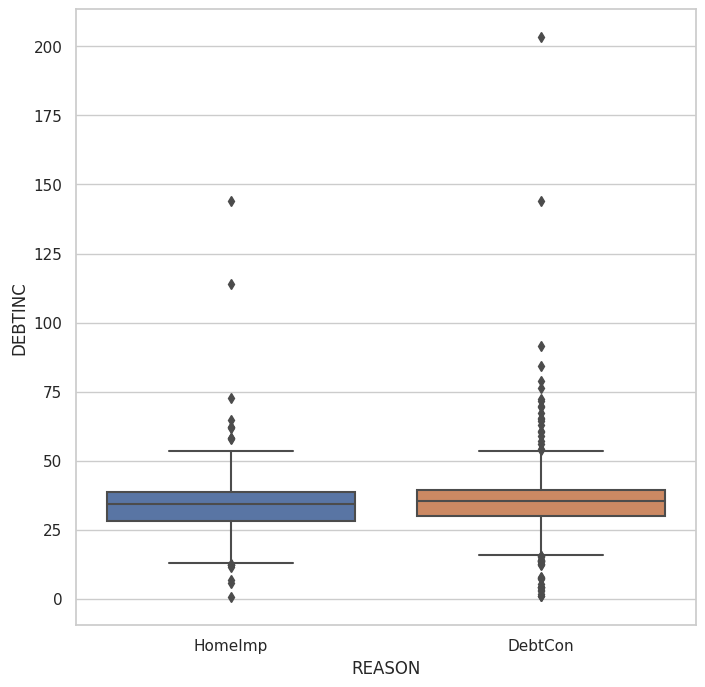

In [54]:
plt.figure(figsize=(8,8))
sns.boxplot(x='REASON', y='DEBTINC', data=df)
plt.show()

Observations from REASON vs. DEBTINC comparison:

Customers who borrow a loan for Debt Consolidation seem to have poorer DEBTINC rations, especially in terms of the number of outliers found. Rest of the data has very similar means and quartiles, though HomeImp customer have slightly better metrics as compared to DebtCon as expected.

**3.3.10.3. Checking if REASON=DebtCon means CLNO > 0**

From the data analysis thus far, it appears that REASON=DebtCon should indicate at least 1 existing Credit Line (CLNO). This is the NULL Hypothesis. Checking for this relationship, so that it helps in Missing Value treatment later on if NULL Hypothesis is proven.

In [55]:
df[df.REASON=='DebtCon'][df[df.REASON=='DebtCon'].CLNO == 0].count()['CLNO']

35

Observation about DebtCon vs. CLNO Count:

It is not true that if the reason is captured as DebtCon, existing CLNO is always greater than 0 i.e. there is at least one existing Credit Line. Failed to prove this hypothesis

**3.3.11. Last but not least, HELOC LOAN vs. VALUE/ MORTDUE**

Correlation matrix revealed there is a correlation of 0.34 and 0.23 exists between the HELOC LOAN lended out to the customer vs. VALUE of customer's home and MORTDUE on current home respectively. Given the correlation is stronger between LOAN and VALUE, analyzing that. Plus, it is already established that MORTDUE and VALUE have positive linearity between them.

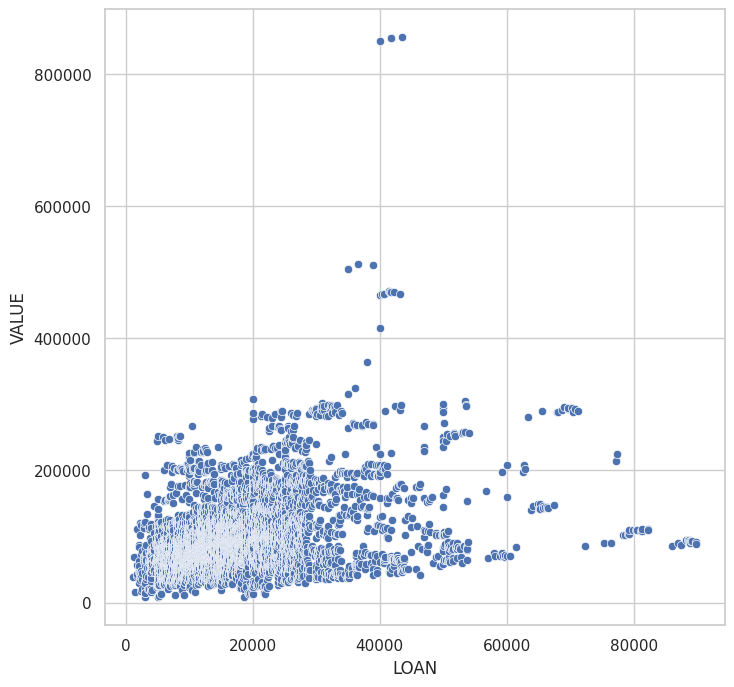

In [56]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data=df, x='LOAN', y='VALUE')
plt.show()

Observations about LOAN vs. VALUE relationship:

There seems to be a positive linear relation between the HELOC LOAN lended out to the customer, vs. the VALUE of customer's home. However, looking at the slope of the plot, it appears that HELOC LOAN tends to increase for smaller changes in VALUE of the home. There are outliers both on high VALUE and high LOAN side, but the outliers on LOAN axis are clearly higher risk loans as they were issued for smaller value homes.

### **3.4.Multivariate Analysis**

**3.4.1. DELINQ and DEROG vs BAD Loans - Checking the combined effect or cross join condition**

In [57]:
# Checking the combined effect of DELINQ and DEROG on BAD=1 LOANS
df[df.BAD==1].groupby(['BAD','DELINQ','DEROG'])['BAD'].agg(['count']).T

BAD       1                                      ...                        \
DELINQ 0.0                                       ... 6.0  7.0                
DEROG   0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0  ...  7.0  0.0 1.0 2.0 3.0   
count   446  70  32  13   8   2   5   2   2   1  ...    1    9   1   1   1   

BAD                             
DELINQ 8.0      10.0 11.0 15.0  
DEROG   0.0 1.0  0.0  0.0  2.0  
count     3   2    1    2    1  

[1 rows x 66 columns]

Observations about the combined effect of DELINQ and DEROG on GOOD/ BAD Loans:

The most important point is that in spite of ZERO DELINQ and ZERO DEROG, there are 446 customers who defaulted.

## **4. Treating Data (Outliers, Missing Values)**

Combining outlier treatment and handling missing values so that this activity can be optimized at column level, and it is easier to understand how each column is managed in one place

###**4.1. Creating copy of the original data as data will be modified beyond this point**

In [58]:
data = df.copy()

In [59]:
# Checking if data is properly copied
data.shape

(5960, 13)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


###**4.2. Defining Functions that will be used in fixing Data Quality**

In [61]:
# Defining a function to calculate the Z-Score for a given column
# Using the standard threshold of 3 for Z-Score Threshold, but it can be overridden via custom input
from scipy.stats import zscore
def treat_outliers_zscore(data, column, threshold=3,debug=False):
    z_scores = np.abs(zscore(data[column]))
    if(debug==True):
      print("Printing Z_Scores")
      print(z_scores)
      print("_________________________________")
    # Finding Outliers
    outliers = (z_scores > threshold)
    if(debug==True):
      print("Printing Outliers")
      print(outliers)
      print("_________________________________")
    data[column] = np.where(outliers, np.median(data[column]), data[column])
    print("Outlier Treatment complete for column: ", column)

In [62]:
def compare_column_describe(df_org, df_mod, column_target):
  # Finding metrics on original dataframe
  describe_org = df_org[column_target].describe()
  # Finding metrics on modified dataframe
  describe_mod = df_mod[column_target].describe()
  # Laying out metrics side by side
  comp = pd.concat(
      [describe_org[['mean', 'std', 'min', '25%', '50%', '75%', 'max']],
         describe_mod[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]],
        axis=0,
        keys=['Original', 'Modified']
  )
  print(comp)

In [63]:
def compare_original_with_new_column_describe(data, column_original, column_target):
  # Finding metrics on original dataframe
  describe_org = data[column_original].describe()
  # Finding metrics on modified dataframe
  describe_mod = data[column_target].describe()
  # Laying out metrics side by side
  comp = pd.concat(
      [describe_org[['mean', 'std', 'min', '25%', '50%', '75%', 'max']],
         describe_mod[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]],
        axis=0,
        keys=[column_original, column_target]
  )
  print(comp)

In [64]:
def predict_using_linear_regression(data, target_variable, features_for_imputation, debug=False):
  # Creating a all features list
  features_all = features_for_imputation + [target_variable]

  if(debug==True):
    print("Printing all features")
    print(features_all)
    print("______________________________________")
  # Making a dataframe for this specific regression analysis
  df_regression = data[features_all]

  # Checking if missing values are absent (if accidentally rerun), then return message and don't execute
  if(df_regression[target_variable].isna().sum()==0):
    print("There are no missing values in target column", target_variable)
  else:
    if(debug==True):
      print("Printing df_regression dataframe info")
      print(df_regression.info())
      print("______________________________________")

    # Data with non-missing values for the selected features and the target variable
    data_with_values = df_regression.dropna(subset=features_for_imputation + [target_variable])

    if(debug==True):
      print("Printing data_with_values dataframe null row metrics")
      print(data_with_values.isna().sum())
      print("______________________________________")

    # Split data into X (features) and y (target variable) for training the model
    X_train = data_with_values[features_for_imputation]
    y_train = data_with_values[target_variable]

    if(debug==True):
      print("Printing X_train dataframe info")
      print(X_train.info())
      print("______________________________________")

    if(debug==True):
      print("Printing y_train dataframe info")
      print(y_train.info())
      print("______________________________________")

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    if(debug==True):
      print("Model Training Completed")
      print("______________________________________")

    # Data with missing values for the selected features and the target variable
    # df_regression should be used, as all null values are removed in it, without which LR fails
    data_missing_values = df_regression[df_regression[target_variable].isna()]

    if(debug==True):
      print("Identifying missing values for the column, which have to be predicted for")
      print(data_missing_values)
      print("______________________________________")

    # Predict and fill in missing values
    data.loc[data_missing_values.index, target_variable] = model.predict(data_missing_values[features_for_imputation])

    if(debug==True):
      print("Predicted values successfully used to fix missing rows")
      print("______________________________________")

###**4.3. Fixing Data Quality issues for Categorical Columns**

**4.3.1. Fixing data quality issues for JOB column**

Applying the approach of using the mode to replace missing values. There is no evident relation between JOB and GOOD/BAD Loan Status, and JOB=Other has a fairly competitive Good vs. Bad ration compared to other columns. Using JOB=Other as the replacement value should not adversly impact loan status.

In [65]:
# Getting the mode value for JOB column
JOB_Mode_Value = df['JOB'].mode()[0]
# print(JOB_Mode_Value)
data['JOB'].fillna(JOB_Mode_Value, inplace=True)

In [66]:
# Ensuring missing value count is ZERO
data['JOB'].isna().sum()

0

**4.3.2. Fixing data quality issues for REASON column**

Applying the approach of using the mode to replace missing values. REASON=DebtCon has 19% defaulters compared to REASON=HomeImp which has 22%. As both are fairly comparable, and as REASON does not have a specific impact on LOAN Status, such a replacement should be fairly safe to make.  

In [67]:
# Getting the mode value for JOB column
REASON_Mode_Value = df['REASON'].mode()[0]
# print(JOB_Mode_Value)
data['REASON'].fillna(REASON_Mode_Value, inplace=True)

In [68]:
# Ensuring missing value count is ZERO
data['REASON'].isna().sum()

0

###**4.4. Fixing Data Quality issues for Numeric Columns**

#### **4.4.1. Fixing data quality issues for CLAGE column**

CLAGE has 5652 rows given, while 308 rows are missing. The univariate analysis for CLAGE shows a bimodal distribution pattern, with right skew and a lot of wide outliers with highest outlier at 1168 months, with a mean of 179.77 (about 180) months and a std. deviation of about 86 months. Bivariate analysis shows CLAGE has a correlation score of -0.17, indicating an inverse impact on the Loan Status, but it is a weak correlation. CLAGE vs. BAD Loan Status bivariate analysis shows that mean CLAGE is better for GOOD Loans in comparison to a slightly higher mean CLAGE for BAD Loans. The 75th quartile for BAD loans is under 200 months, where as that for GOOD loans is about 250 months, that justifies the observation on means. CLAGE has the highest correlation score with CLNO of 0.24 and second highest with YOJ of 0.20.

Thus, for missing values, using median to replace values will be the strategy. This is given the near zero invserse impact of CLAGE on Loan Status. Then, for the extreme outliers that exist, a winsorization exercise should help fix the data. This will help as one of the models being used is Logistic Regression.

In [69]:
# Comparing data before changes
compare_column_describe(df, data, 'CLAGE')

Original  mean     179.766275
          std       85.810092
          min        0.000000
          25%      115.116702
          50%      173.466667
          75%      231.562278
          max     1168.233561
Modified  mean     179.766275
          std       85.810092
          min        0.000000
          25%      115.116702
          50%      173.466667
          75%      231.562278
          max     1168.233561
Name: CLAGE, dtype: float64


In [70]:
# Replacing missing values with Median
median_CLAGE = data.CLAGE.median()
print("The median is: ", median_CLAGE)
# Now, replacing values
data.CLAGE = data.CLAGE.fillna(median_CLAGE)
print("Missing values replaced")

The median is:  173.46666667
Missing values replaced


In [71]:
# Ensuring missing value count is ZERO
print(data['CLAGE'].isna().sum())

0


In [72]:
# Comparing data after changes
compare_column_describe(df, data, 'CLAGE')

Original  mean     179.766275
          std       85.810092
          min        0.000000
          25%      115.116702
          50%      173.466667
          75%      231.562278
          max     1168.233561
Modified  mean     179.440725
          std       83.574697
          min        0.000000
          25%      117.371430
          50%      173.466667
          75%      227.143058
          max     1168.233561
Name: CLAGE, dtype: float64


Fixing the missing values has introduced slight and acceptable change in mean and std deviation.

In [73]:
# Treating outliers for YOJ via Winsorizing using the Z-Score method
treat_outliers_zscore(data, 'CLAGE')

Outlier Treatment complete for column:  CLAGE


In [74]:
# Validating if the Max values are fixed
compare_column_describe(df, data, 'CLAGE')

Original  mean     179.766275
          std       85.810092
          min        0.000000
          25%      115.116702
          50%      173.466667
          75%      231.562278
          max     1168.233561
Modified  mean     177.184931
          std       76.728026
          min        0.000000
          25%      117.371430
          50%      173.466667
          75%      225.324631
          max      427.923591
Name: CLAGE, dtype: float64


The max value has changed from 1168.23 to 427.92. The mean has changed from 179.76 to 177.18 which is an acceptable shift. Std. Deviation has improved from 85.81 to 76.72, but is an acceptable change.

#### **4.4.2. Fixing data quality issues for YOJ column**

YOJ a total of 5445 given values and 515 are missing. Univariate analysis tells us that mean is 8.92 with a high std. deviation of 7.57. Min is 0 while Max is 41, and there are few outliers on the right. Most customers have YOJ=0, with second largest value of YOJ=11.

Bivariate analysis showed mean YOJ of good customers is slightly higher than the mean of defaulting customers. There are enough and comparable outliers across Good and Defaulting Customers, thus leading to the conclusion that YOJ does not have specific impact on Loan Status (BAD), which is also proven by a small correlation score of -0.06.

For missing values, using median to replace values, as original data has high Std. Deviation and several outliers. We plan to use Logistic Regression as one of the models to predict outcomes, which can be sensitive to data variations, hence finalizing on using Median values.

For outliers, high years of experience don't necessarily mean GOOD or BAD customers, thus deciding to cap the YOJ using Winsorization.


In [75]:
# Comparing data before changes
compare_column_describe(df, data, 'YOJ')

Original  mean     8.922268
          std      7.573982
          min      0.000000
          25%      3.000000
          50%      7.000000
          75%     13.000000
          max     41.000000
Modified  mean     8.922268
          std      7.573982
          min      0.000000
          25%      3.000000
          50%      7.000000
          75%     13.000000
          max     41.000000
Name: YOJ, dtype: float64


In [76]:
# Replacing missing values with Median
median_YOJ = data.YOJ.median()
print("The median is: ", median_YOJ)
# Now, replacing values
data.YOJ = data.YOJ.fillna(median_YOJ)
print("Missing values replaced")

The median is:  7.0
Missing values replaced


In [77]:
# Ensuring missing value count is ZERO
print(data['YOJ'].isna().sum())

0


In [78]:
# Comparing data after changes
compare_column_describe(df, data, 'YOJ')

Original  mean     8.922268
          std      7.573982
          min      0.000000
          25%      3.000000
          50%      7.000000
          75%     13.000000
          max     41.000000
Modified  mean     8.756166
          std      7.259424
          min      0.000000
          25%      3.000000
          50%      7.000000
          75%     12.000000
          max     41.000000
Name: YOJ, dtype: float64


Fixing the missing values has introduced slight and acceptable change in mean and std deviation.

In [79]:
# Treating outliers for YOJ via Winsorizing using the Z-Score method
treat_outliers_zscore(data, 'YOJ')

Outlier Treatment complete for column:  YOJ


In [80]:
# Validating if the Max values are fixed
compare_column_describe(df, data, 'YOJ')

Original  mean     8.922268
          std      7.573982
          min      0.000000
          25%      3.000000
          50%      7.000000
          75%     13.000000
          max     41.000000
Modified  mean     8.620931
          std      7.033789
          min      0.000000
          25%      3.000000
          50%      7.000000
          75%     12.000000
          max     30.000000
Name: YOJ, dtype: float64


The max value has changed from 41 to 30. The mean has changed from 8.92 to 8.62 which is an acceptable shift. Std. Deviation has changed slightly too, from 7.57 to 7.03.

#### **4.4.3. Fixing data quality issues for VALUE**

We know there is a colinearity between MORTDUE and VALUE and Correlation Matrix has a score of 0.88 between these two columns. We also know that VALUE and MORTDUE have a miniscule score of -0.03 and -0.05 against Loan Status (BAD). VALUE has 0.34 correlation score against LOAN amount. LOAN has no missing values, where as VALUE has 112 and MORTDUE has 518. So far, in order of least correlation to Loan Status, we have fixed CLAGE for missing data using Median values and YOJ using Median values.

Thus, taking the approach of using both KNN and Linear Regression to predict the missing data in home VALUE column. For Linear Regression approach, mostly replying on LOAN, YOJ and CLAGE columns that have all been fixed for data quality. Based on quality of data fixes, will chose between KNN and LR.

Once missing data in VALUE is fixed, using mean, predicting the data for MORTDUE. We have determined that both these columns have real data and so outliers will not be treated. Eventually, given the high colinearity between VALUE and MORTDUE, only one of the columns should be used for subsequent LinearRegression methods, if used for prediction.

#####**Predicting missing data for VALUE using KNN**

In [81]:
# Creating a new column to be predicted using Linear Regression
data['VALUE_knn'] = data['VALUE']

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BAD        5960 non-null   int64  
 1   LOAN       5960 non-null   int64  
 2   MORTDUE    5442 non-null   float64
 3   VALUE      5848 non-null   float64
 4   REASON     5960 non-null   object 
 5   JOB        5960 non-null   object 
 6   YOJ        5960 non-null   float64
 7   DEROG      5252 non-null   float64
 8   DELINQ     5380 non-null   float64
 9   CLAGE      5960 non-null   float64
 10  NINQ       5450 non-null   float64
 11  CLNO       5738 non-null   float64
 12  DEBTINC    4693 non-null   float64
 13  VALUE_knn  5848 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [83]:
from sklearn.impute import KNNImputer
# Instantiating a KNN Imputer
# Experimenting and then setting the number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Using the newly created column for KNN
columns_to_impute = ['VALUE_knn']

# Impute missing values for the specified columns
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

In [84]:
# Checking if all null values before and after fixing
print(data.VALUE.isna().sum())
print(data.VALUE_knn.isna().sum())

112
0


In [85]:
compare_original_with_new_column_describe(data, 'VALUE', 'VALUE_knn')

VALUE      mean    101776.048741
           std      57385.775334
           min       8000.000000
           25%      66075.500000
           50%      89235.500000
           75%     119824.250000
           max     855909.000000
VALUE_knn  mean    101776.048741
           std      56843.931566
           min       8000.000000
           25%      66489.500000
           50%      90000.000000
           75%     119004.750000
           max     855909.000000
dtype: float64


Observations about VALUE column after fixing missing values using KNN:

Mean remained constant at 101776.048741 before and after KNN.

Std. Deviation changed from 57385.775334 to 56843.931566. The variance in data reduced as a result, which is a good sign.

Min and Max remain constant, while 25th, 50th and 75th percentile changed slightly as 112 missing values were fixed, and this is comparable and acceptable.

#####**Predicting DEBTINC missing values using Linear Regression**

In [86]:
# Creating a new column to be predicted using Linear Regression
data['VALUE_lr'] = data['VALUE']

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BAD        5960 non-null   int64  
 1   LOAN       5960 non-null   int64  
 2   MORTDUE    5442 non-null   float64
 3   VALUE      5848 non-null   float64
 4   REASON     5960 non-null   object 
 5   JOB        5960 non-null   object 
 6   YOJ        5960 non-null   float64
 7   DEROG      5252 non-null   float64
 8   DELINQ     5380 non-null   float64
 9   CLAGE      5960 non-null   float64
 10  NINQ       5450 non-null   float64
 11  CLNO       5738 non-null   float64
 12  DEBTINC    4693 non-null   float64
 13  VALUE_knn  5960 non-null   float64
 14  VALUE_lr   5848 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 698.6+ KB


In [88]:
# Based on analysis, defining the features that can be used to predict missing values for VALUE column
features_for_imputation = ['CLAGE', 'YOJ', 'LOAN']
# Defining the target column
target_variable = 'VALUE_lr'
# Using Linear Regression to predict missing values
predict_using_linear_regression(data, target_variable, features_for_imputation)

In [89]:
# Checking if all null values before and after fixing
print(data.VALUE.isna().sum())
print(data.VALUE_lr.isna().sum())

112
0


In [90]:
# Comparing data before changes
compare_original_with_new_column_describe(data, 'VALUE', 'VALUE_lr')

VALUE     mean    101776.048741
          std      57385.775334
          min       8000.000000
          25%      66075.500000
          50%      89235.500000
          75%     119824.250000
          max     855909.000000
VALUE_lr  mean    101762.081413
          std      56920.557000
          min       8000.000000
          25%      66464.750000
          50%      89632.998625
          75%     119547.500000
          max     855909.000000
dtype: float64


Observations about VALUE column after fixing missing values using Linear Regression:

Mean reduced from 101776.048741 before to 101762.081413 after Linear Regression.

Std. Deviation changed from 57385.775334 to 56920.557000. The variance in data reduced as a result, which is a good sign.

Min and Max remain constant, while 25th, 50th and 75th percentile changed slightly as 112 missing values were fixed, and this is comparable and acceptable.

#####**Comparing KNN and Linear Regression for Value Column and selecting the best imputation technique**

In [91]:
# Comparing KNN vs. Linear Regression
compare_original_with_new_column_describe(data, 'VALUE_knn', 'VALUE_lr')

VALUE_knn  mean    101776.048741
           std      56843.931566
           min       8000.000000
           25%      66489.500000
           50%      90000.000000
           75%     119004.750000
           max     855909.000000
VALUE_lr   mean    101762.081413
           std      56920.557000
           min       8000.000000
           25%      66464.750000
           50%      89632.998625
           75%     119547.500000
           max     855909.000000
dtype: float64


Making a choice between KNN and LR:

The variance is lower with the use KNN compared to Linear Regression, though it is marginal, given the very large values. Mean remained constant with KNN as compared to Linear Regression where the mean was lowered. I would gravitate towards KNN at this point given mean was maintained better with KNN. Use of KNN also eliminates the potential double influence of the independent variables used to predict VALUE using Linear Regrression. Thus, using data improved using KNN.

In [92]:
# Dropping Linear Regression Column, as we chose to use KNN
data.drop('VALUE_lr', axis=1, inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BAD        5960 non-null   int64  
 1   LOAN       5960 non-null   int64  
 2   MORTDUE    5442 non-null   float64
 3   VALUE      5848 non-null   float64
 4   REASON     5960 non-null   object 
 5   JOB        5960 non-null   object 
 6   YOJ        5960 non-null   float64
 7   DEROG      5252 non-null   float64
 8   DELINQ     5380 non-null   float64
 9   CLAGE      5960 non-null   float64
 10  NINQ       5450 non-null   float64
 11  CLNO       5738 non-null   float64
 12  DEBTINC    4693 non-null   float64
 13  VALUE_knn  5960 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [94]:
# Copying the data from KNN column
data['VALUE'] = data['VALUE_knn']

In [95]:
# Now dropping the DEBTINC_knn as its purpose is completed
data.drop('VALUE_knn', axis=1, inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


#####**Outlier Management for VALUE column**

Outliers in VALUE column in real world cannot be considered as true outliers. They are factual information. Given we will use Logistic Regression to classify customers, and it is sensitive to scale and outliers within data, a decision to fix VALUE can be made. However, use of Standard Scalar should help, and given DecisionTrees and RandomForests are immune to scale and outliers, leaving the data as is for now.

####**4.4.4. Fixing data quality issues for MORTDUE**

We have already established the MORTDUE is highly correlated to VALUE. Using Linear Regression to fix missing values for MORTDUE on very similar lines, but not fixing the outliers as these are real dues customers have on their home mortgages. Due to the high colinearity, after fixing data quality issues, deciding not to use this column to fix data quality issues for any other column, as VALUE column will suffice.

In [97]:
# VALUE Column was trained with independent features ['CLAGE', 'YOJ', 'LOAN']
# Thus, for MORTDUE, just using VALUE as the independent feature
features_for_imputation = ['VALUE']
# Defining the target column
target_variable = 'MORTDUE'
# Using Linear Regression to predict missing values
predict_using_linear_regression(data, target_variable, features_for_imputation)

In [98]:
# Checking if all null values before and after fixing
print(df.MORTDUE.isna().sum())
print(data.MORTDUE.isna().sum())

518
0


In [99]:
# Comparing metrics before and after fixing data quality
compare_column_describe(df, data, 'MORTDUE')

Original  mean     73760.817200
          std      44457.609458
          min       2063.000000
          25%      46276.000000
          50%      65019.000000
          75%      91488.000000
          max     399550.000000
Modified  mean     71494.023908
          std      45927.039860
          min       2063.000000
          25%      43870.347232
          50%      62894.000000
          75%      89000.000000
          max     610453.428257
Name: MORTDUE, dtype: float64


The mean has reduced, though it is comparable. The std. deviation has increased, which means after the data quality fixes, the dispresion has increased. The max value of 610335 in comparision to previous max value of 399550 further begs the question if this was truly the right strategy to fix the data quality issues. As MORTDUE is trained using VALUE data, validating the max value in VALUE column to check if that is leading to a missing value getting populated for MORTDUE for a very large home value row. If that is the case, LinearRegression can be given a pass and new data for MORTDUE retained as-is.

In [100]:
df.VALUE.describe()

count      5848.000000
mean     101776.048741
std       57385.775334
min        8000.000000
25%       66075.500000
50%       89235.500000
75%      119824.250000
max      855909.000000
Name: VALUE, dtype: float64

VALUE has a max of 855909, which explains why MORTDUE's max value increased. Concluding that MORTDUE is fixed for data quality issues. Also, allowing the outliers to exist in MORTDUE like VALUE column has too.

In [101]:
print(columns_all)

['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [102]:
# Popping MORTDUE from
columns_all.pop(1)
print(columns_all)

['LOAN', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


#### **4.4.5. Fixing data quality issues for CLNO column**

CLNO has 5738 rows given, while 222 rows are missing. The univariate analysis for CLNO shows a normal distribution pattern, with right skew and a lot of wide outliers with highest outlier at 71 credit lines, with a mean of 21.3 Credit Lines and a std. deviation of about 10 Credit Lines. Bivariate analysis shows CLNO has a correlation score of -0.00, indicating no impact on the Loan Status. CLNO vs. BAD Loan Status analysis also did not reveal there is a clear pattern to the data as we found that at each CLNO value, there was a similar distribution of GOOD vs. BAD loans, where number of GOOD loans exceeded the BAD ones, but at least 10 BAD Loans occured for each CLNO value, with few exceptions only. After CLNO exceeded 57, there were BAD loans only.

Using the mean to replace missing values, as the mean and the 50th percentile values are close. Once the missing values are fixed, will use Z-Score based winsorization.

In [103]:
# Comparing data before changes
compare_column_describe(df, data, 'CLNO')

Original  mean    21.296096
          std     10.138933
          min      0.000000
          25%     15.000000
          50%     20.000000
          75%     26.000000
          max     71.000000
Modified  mean    21.296096
          std     10.138933
          min      0.000000
          25%     15.000000
          50%     20.000000
          75%     26.000000
          max     71.000000
Name: CLNO, dtype: float64


In [104]:
# Replacing missing values with Median
mean_CLNO = data.CLNO.mean()
print("The mean is: ", mean_CLNO)
# Now, replacing values
data.CLNO = data.CLNO.fillna(mean_CLNO)
print("Missing values replaced")

The mean is:  21.29609620076682
Missing values replaced


In [105]:
# Ensuring missing value count is ZERO
print(data['CLNO'].isna().sum())

0


In [106]:
# Comparing data after changes
compare_column_describe(df, data, 'CLNO')

Original  mean    21.296096
          std     10.138933
          min      0.000000
          25%     15.000000
          50%     20.000000
          75%     26.000000
          max     71.000000
Modified  mean    21.296096
          std      9.948280
          min      0.000000
          25%     15.000000
          50%     21.000000
          75%     26.000000
          max     71.000000
Name: CLNO, dtype: float64


Fixing the missing values has introduced slight and acceptable change in mean and std deviation.

In [107]:
# Treating outliers for YOJ via Winsorizing using the Z-Score method
treat_outliers_zscore(data, 'CLNO')

Outlier Treatment complete for column:  CLNO


In [108]:
# Validating if the Max values are fixed
compare_column_describe(df, data, 'CLNO')

Original  mean    21.296096
          std     10.138933
          min      0.000000
          25%     15.000000
          50%     20.000000
          75%     26.000000
          max     71.000000
Modified  mean    21.037539
          std      9.454487
          min      0.000000
          25%     15.000000
          50%     21.000000
          75%     26.000000
          max     51.000000
Name: CLNO, dtype: float64


The max value has changed from 71 to 51. The mean has changed from 21.29 to 21.03 which is an acceptable shift. Std. Deviation has not changed much either.

####**4.4.6. Fixing data quality issues for DEBTINC**

DEBTINC is continuous data, and is a ratio of DEBT to INCOME. Univariate Analysis shows it has a mean of 33.78, with a reasonable std. deviation of 8.60. The min is 0.52 (safe customer) vs. max is 203.31 (highly risky customer). The 75th quartile is 39.00, clearly showing the influence of the numerous outliers on column metrics. This column has outliers on left side as well, given the low min, which is far from the mean. The bivariate analysis shows that mean DEBTINC is lower for GOOD Loans and higher for BAD Loans, and as DEBTINC goes beyond 50, all customers have defaulted. The correlation matrix shows a mild 0.20 correlation score against GOOD/ BAD Loan Status. Also worth noting is that DEBTINC has the highest missing data with 1267 missing rows.

Deciding to use both KNN and LinearRegression to predict the missing values for DEBTINC. When using Linear Regardssion, taking CLAGE, YOJ, LOAN and VALUE as features/ independent variables, and dropping the MORTDUE column given VALUE is already included. Plan is to compare KNN vs. LR, and take the approach that provides the best data quality fixes.

##### **Predicting DEBTINC missing values using KNN**

In [109]:
# Creating a new column to be predicted using Linear Regression
data['DEBTINC_knn'] = data['DEBTINC']

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BAD          5960 non-null   int64  
 1   LOAN         5960 non-null   int64  
 2   MORTDUE      5960 non-null   float64
 3   VALUE        5960 non-null   float64
 4   REASON       5960 non-null   object 
 5   JOB          5960 non-null   object 
 6   YOJ          5960 non-null   float64
 7   DEROG        5252 non-null   float64
 8   DELINQ       5380 non-null   float64
 9   CLAGE        5960 non-null   float64
 10  NINQ         5450 non-null   float64
 11  CLNO         5960 non-null   float64
 12  DEBTINC      4693 non-null   float64
 13  DEBTINC_knn  4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [111]:
from sklearn.impute import KNNImputer
# Instantiating a KNN Imputer
# Experimenting and then setting the number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Updating the original DEBTINC column
columns_to_impute = ['DEBTINC_knn']

# Impute missing values for the specified columns
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

In [112]:
# Checking if all null values before and after fixing
print(data.DEBTINC.isna().sum())
print(data.DEBTINC_knn.isna().sum())

1267
0


In [113]:
compare_original_with_new_column_describe(data, 'DEBTINC', 'DEBTINC_knn')

DEBTINC      mean     33.779915
             std       8.601746
             min       0.524499
             25%      29.140031
             50%      34.818262
             75%      39.003141
             max     203.312149
DEBTINC_knn  mean     33.779915
             std       7.632713
             min       0.524499
             25%      30.763159
             50%      33.779915
             75%      37.949892
             max     203.312149
dtype: float64


Observations about DEBTINC after fixing missing values using KNN:

Mean remained constant at 33.779915 before and after KNN.

Std. Deviation changed from 8.601746 to 7.632713. The variance in data reduced as a result, which is a good sign.

Min and Max remain constant, while 25th, 50th and 75th percentile changed slightly as 1267 missing values were fixed, and this is comparable and acceptable.

##### **Predicting DEBTINC missing values using Linear Regression**

In [114]:
# Creating a new column to be predicted using Linear Regression
data['DEBTINC_lr'] = data['DEBTINC']

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BAD          5960 non-null   int64  
 1   LOAN         5960 non-null   int64  
 2   MORTDUE      5960 non-null   float64
 3   VALUE        5960 non-null   float64
 4   REASON       5960 non-null   object 
 5   JOB          5960 non-null   object 
 6   YOJ          5960 non-null   float64
 7   DEROG        5252 non-null   float64
 8   DELINQ       5380 non-null   float64
 9   CLAGE        5960 non-null   float64
 10  NINQ         5450 non-null   float64
 11  CLNO         5960 non-null   float64
 12  DEBTINC      4693 non-null   float64
 13  DEBTINC_knn  5960 non-null   float64
 14  DEBTINC_lr   4693 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 698.6+ KB


In [116]:
# Based on analysis, defining the features that can be used to predict missing values for VALUE column
features_for_imputation = ['CLAGE', 'YOJ', 'LOAN', 'VALUE'] #Not including MORTDUE due to correlation with VALUE already
# Defining the target column
target_variable = 'DEBTINC_lr'
# Using Linear Regression to predict missing values
predict_using_linear_regression(data, target_variable, features_for_imputation)

In [117]:
# Checking if all null values before and after fixing
print(data.DEBTINC.isna().sum())
print(data.DEBTINC_lr.isna().sum())

1267
0


In [118]:
# Comparing data before changes
compare_original_with_new_column_describe(data, 'DEBTINC', 'DEBTINC_lr')

DEBTINC     mean     33.779915
            std       8.601746
            min       0.524499
            25%      29.140031
            50%      34.818262
            75%      39.003141
            max     203.312149
DEBTINC_lr  mean     33.740534
            std       7.659453
            min       0.524499
            25%      30.744747
            50%      33.938647
            75%      37.982401
            max     203.312149
dtype: float64


Observations about DEBTINC after fixing missing values using Linear Regression:

Mean reduced from 33.779915 to 33.740232, after LR, and this is acceptable 1267 missing values were replaced and that can change the mean.

Std. Deviation changed from 8.601746 to 7.659971. The variance in data reduced as a result, which is a good sign.

Min and Max remain constant, while 25th, 50th and 75th percentile changed slightly, and this is comparable and acceptable.

#####**Comparing KNN and Linear Regression for DEBTINC Column and selecting the best imputation technique**

In [119]:
# Comparing KNN vs. Linear Regression
compare_original_with_new_column_describe(data, 'DEBTINC_knn', 'DEBTINC_lr')

DEBTINC_knn  mean     33.779915
             std       7.632713
             min       0.524499
             25%      30.763159
             50%      33.779915
             75%      37.949892
             max     203.312149
DEBTINC_lr   mean     33.740534
             std       7.659453
             min       0.524499
             25%      30.744747
             50%      33.938647
             75%      37.982401
             max     203.312149
dtype: float64


Making a choice between KNN and LR:

The variance is lower with the use KNN compared to Linear Regression, though it is marginal. Mean remained constant with KNN as compared to Linear Regression where the mean was lowered. I would gravitate towards KNN at this point given mean was maintained better with KNN.

In [120]:
# Dropping Linear Regression Column, as we chose to use KNN
data.drop('DEBTINC_lr', axis=1, inplace=True)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BAD          5960 non-null   int64  
 1   LOAN         5960 non-null   int64  
 2   MORTDUE      5960 non-null   float64
 3   VALUE        5960 non-null   float64
 4   REASON       5960 non-null   object 
 5   JOB          5960 non-null   object 
 6   YOJ          5960 non-null   float64
 7   DEROG        5252 non-null   float64
 8   DELINQ       5380 non-null   float64
 9   CLAGE        5960 non-null   float64
 10  NINQ         5450 non-null   float64
 11  CLNO         5960 non-null   float64
 12  DEBTINC      4693 non-null   float64
 13  DEBTINC_knn  5960 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [122]:
# Copying the data from DEBTINC_KNN column into DEBTINC
data['DEBTINC'] = data['DEBTINC_knn']

In [123]:
# Now dropping the DEBTINC_knn as its purpose is completed
data.drop('DEBTINC_knn', axis=1, inplace=True)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


##### **Fixing DEBTINC Outlier Values**

In [125]:
# Treating outliers for YOJ via Winsorizing using the Z-Score method
treat_outliers_zscore(data, 'DEBTINC')

Outlier Treatment complete for column:  DEBTINC


In [126]:
# Validating if the Max values are fixed
compare_column_describe(df, data, 'DEBTINC')

Original  mean     33.779915
          std       8.601746
          min       0.524499
          25%      29.140031
          50%      34.818262
          75%      39.003141
          max     203.312149
Modified  mean     33.693714
          std       6.015450
          min      11.652739
          25%      30.957259
          50%      33.779915
          75%      37.851500
          max      55.962022
Name: DEBTINC, dtype: float64


This is an acceptable change, given mean remains nearly the same. Max value is reduced from 203 to 55, which is within the expected range for max value, after which all customers are defaulters. The std. deviation has reduced, which is an improvement as it shows less data dispersion around mean.

####**4.4.8. Fixing data quality issues for NINQ**

NINQ had 5450 given rows with 510 missing values. NINQ could be preceeding the DEROG in real world, meaning, as the customer begins to default on loans, customer is aware of a potential degogatory report coming out against the customer. In such a case, people might start looking for new credit lines before such reports are released. Assuming this is true, it makes sense to fix data quality issues for NINQ first, so that it can be used to predict DEROG.

 Univariate analysis showed the data followed decreasing exponential distribution with right skew and lot of outliers on the right. With a mean of 1.19 and std. deviation greater than mean at 1.73, which is not very good, NINQ has max value of 17. Min value is 0, and that is also the highest frequency value. Bivariate analysis showed, NINQ had 0.17 score against Loan Status (GOOD/ BAD) in correlation matrix. The barplot for NINQ against Loan Status (GOOD/ BAD) shows that even with NINQ=0, there are 396 defaulting customers, though GOOD customers are 2135. For NINQ > 1, the defaulting customers significantly increase compared to good customers, and after NINQ >= 12, all customers are defaulters only. One last point to note is that NINQ has the same correlation score of 0.17 against DEROG column, showing some correlation.

Taking the simple approach of using the median value to replace missing values in NINQ. And given that at NINQ=5, the number of defaulters are almost equal or more than good customers, capping NINQ at 5, even though 75th percentile iss NINQ=2. Also, given the non-normal data distribution, after fixing missing values, normalizing data using box-cox transformation and retaining both the original non-normal data in NINQ and new-normalized data in NINQ_nd_boxcox columns. Idea is to train models without and with normally distributed data, in a mutually exclusive way.

In [127]:
# Replacing missing values with Median
median_NINQ = data.NINQ.median()
print("The median is: ", median_NINQ)
# Now, replacing values
data.NINQ = data.NINQ.fillna(median_NINQ)
print("Missing values replaced")

The median is:  1.0
Missing values replaced


In [128]:
# Ensuring missing value count is ZERO and comparing to orignal count
print(df['CLAGE'].isna().sum())
print(data['CLAGE'].isna().sum())

308
0


In [129]:
# Comparing data after changes
compare_column_describe(df, data, 'NINQ')

Original  mean     1.186055
          std      1.728675
          min      0.000000
          25%      0.000000
          50%      1.000000
          75%      2.000000
          max     17.000000
Modified  mean     1.170134
          std      1.653866
          min      0.000000
          25%      0.000000
          50%      1.000000
          75%      2.000000
          max     17.000000
Name: NINQ, dtype: float64


Fixing the missing values has introduced slight and acceptable change in mean and std deviation.

####**4.4.9. Fixing data quality issues for DEROG**

DEROG has 5252 rows given, with 708 missing values. We have already established an assumption that DEROG follows NINQ. The mean is 0.25, while max value is 10, clearly indicating right skewedness with major outliers. Highest frequency of 4527 rows is for DEROG=0, which is logical as most good customers would have no degogatory reports. DEROG=1 is steep dip down to 435 rows, introducing the reverse exponential data distribution pattern, similar to the one in NINQ. 75th percentile is zero too, further supporting the conclusion that data is non-normal. The bivariate analysis shows that DEROG=0 still has 754 BAD customers, though there are most number of GOOD customers with count of 3773. There after, in line with univariate analysis, presence of degrogatory reports DEROG > 0, introducing near 50% chance or more that customers would default as the data shows. Beyond DEROG=6, customers always default on loans. This influence of DEROG on GOOD/ BAD loan status is seen with a correlation score of 0.28, second highest after DELINQ.

In line with NINQ, taking the simple approach of using the Median value. Using Mean is not possible given the influence of extreme outliers.

In [130]:
# Replacing missing values with Median
median_DEROG = data.DEROG.median()
print("The median is: ", median_DEROG)
# Now, replacing values
data.DEROG = data.DEROG.fillna(median_DEROG)
print("Missing values replaced")

The median is:  0.0
Missing values replaced


In [131]:
# Ensuring missing value count is ZERO and comparing to orignal count
print(df['DEROG'].isna().sum())
print(data['DEROG'].isna().sum())

708
0


In [132]:
# Comparing data after changes
compare_column_describe(df, data, 'DEROG')

Original  mean     0.254570
          std      0.846047
          min      0.000000
          25%      0.000000
          50%      0.000000
          75%      0.000000
          max     10.000000
Modified  mean     0.224329
          std      0.798458
          min      0.000000
          25%      0.000000
          50%      0.000000
          75%      0.000000
          max     10.000000
Name: DEROG, dtype: float64


Fixing the missing values has introduced slight and acceptable change in mean and std deviation. In real world, customers could have 10 derogatory reports, and thus leaving the data as is, without fixing the outliers. Plus, applying any kind of normalization techniques, like log or box-cox transformations, does not change the nature of data distribution as it continues to remain non-normal. Thus deciding not to treat outliers, as there is no major gain after outlier treatment or data normalization.

####**4.4.10. Fixing data quality issues for DELINQ**

DELINQ has 5380 rows given, with 580 missing values. DELINQ follows similar data patterns and data distribution as DEROG or NINQ. The mean is 0.45, while max value is 15, clearly indicating right skewedness with major outliers. Highest frequency of 4179 rows is for DELINQ=0, which is logical as most good customers would have no delinquency reports. DELINQ=1 is steep dip, introducing the reverse exponential data distribution pattern, similar to the one in DEROG or NINQ, with just 654 rows. 75th percentile is zero too, further supporting the conclusion that data is non-normal. The bivariate analysis shows that DELINQ=0 still has 583 BAD customers, though there are most number of GOOD customers with count of 3596. There after, in line with univariate analysis, presence of delinquency reports DELINQ > 0, introducing near 50% chance or more that customers would default on their loans, as seen in the data. Beyond DELINQ=6, customers always default on loans. This influence of DEROG on GOOD/ BAD loan status is seen with the highest correlation score of 0.35 across all columns.

In line with NINQ, taking the simple approach of using the Median value. Using Mean is not possible given the influence of extreme outliers.

In [133]:
# Replacing missing values with Median
median_DELINQ = data.DELINQ.median()
print("The median is: ", median_DELINQ)
# Now, replacing values
data.DELINQ = data.DELINQ.fillna(median_DELINQ)
print("Missing values replaced")

The median is:  0.0
Missing values replaced


In [134]:
# Ensuring missing value count is ZERO and comparing to orignal count
print(df['DELINQ'].isna().sum())
print(data['DELINQ'].isna().sum())

580
0


In [135]:
# Comparing data after changes
compare_column_describe(df, data, 'DELINQ')

Original  mean     0.449442
          std      1.127266
          min      0.000000
          25%      0.000000
          50%      0.000000
          75%      0.000000
          max     15.000000
Modified  mean     0.405705
          std      1.079256
          min      0.000000
          25%      0.000000
          50%      0.000000
          75%      0.000000
          max     15.000000
Name: DELINQ, dtype: float64


Fixing the missing values has introduced slight and acceptable change in mean and std deviation. In real world, customers could have 15 derogatory reports, and thus leaving the data as is, without fixing the outliers. Plus, applying any kind of normalization techniques, like log or box-cox transformations, does not change the nature of data distribution as it continues to remain non-normal. Thus deciding not to treat outliers, as there is no major gain after outlier treatment or data normalization.

## **5. Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

A summary of most important points is as below. The details for Univariate, Bivariate and Multivariate analysis are included in detail in respective sections.

1. There are 10 numeric columns and 2 categorical columns that provide insights into why loan status turns out GOOD vs. BAD in the Loan Status (BAD) column, with each column having several missing values that needed to be fixed post analysis.
2. The order of importance from EDA appears to be as follows, and it contains certain assumptions about the domain. JOB and REASON, followed by CLAGE, YOJ, VALUE, MORTDUE, CLNO, DEBTINC, NINQ, DEROG and finally DELINQ seem to be influencing Loan Status, though none of them have a single strong correlation, and together seem to define the Loan Status outcome.
3. Inter-column correlation exists. Biggest correlation is found between VALUE and MORTDUE. There are other such correlations that are explained in detail already, but one worth mentioning is NINQ, DEROG and DELINQ.
4. Data distribution for most columns follows normal distribution pattern, though 3 columns have a reverse exponential distribution with extreme right skewed data, posing a challenge in terms of being able to easily normalize such data distribution.
5. DEBTINC ratio which is a major decision making data-point for loan officers, has a very wide range of data, though the way this data impacts good vs. bad loans is via other columns, and thus has an indirect impact on loan status.
6. Given data had to be prepared for a range of models, ranging from Logistic Regression which can be impacted by varying scales across columns, to use of Decision Trees and Random Forests, which are more immune to such variations in scale of data, handling missing and outlier data posed its own challenges.
7. Missing data was mostly treated using Mode or Median data, with one use of Mean. Linear Regression was used to predict missing data for VALUE column, based on whch MORTDUE was also predicted using Linear Regression.


## **6. Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

**Model Evaluation Criteria:**

Given this is a financial system, the model needs to have HIGH RECALL, as it means fewer False Negatives. Each false negative means loan given out to a potentail defaulter or bad customer. Thus, irrespective of whether the model used is Logistic Regression, Decision Tree or Random Forests, having HIGH RECALL plays the primary role. Given precision and recall have tension between them, as both cannot be high, the focus of model training and then hyperparameter tuning would be to have high recall, then high accuracy and balanced out precision.

### **6.1. Decision to retain or drop MORTDUE which has high colinearity with VALUE**

Experimented with and without the use of MORTDUE during feature selection followed by model training and model performance evaluation. As expected based on the high colinearity between VALUE and MORTDUE, adding MORTDUE to features reduces the RECALL values across Logistic Regression, Decision Tree and Random Forests. Hence, the final decision is to drop the column MORTDUE and training models without.

The variable allows setting the vaue of the use_feature_MORTDUE to TRUE or FALSE.

In [136]:
use_feature_MORTDUE = False

### **6.2. Defining Functions to be used in Model Training**

In [137]:
# Creating metric function
def draw_classification_report_confusion_matrix(actual, predicted, labels):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (4, 3))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = labels, yticklabels = labels)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

In [138]:
def decision_tree_depth_selection(dt_maxdepth):
  train_scores_dt = []
  test_scores_dt = []

  dt_range = range(3, dt_maxdepth)

  for depth in dt_range:
    # Using the same criteria as would be used in the real model training
    dt_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    dt_clf = dt_clf.fit(X_train_dt, y_train_dt)

    # Using the Score method to get the mean accuracy values
    train_scores_dt.append(1 - dt_clf.score(X_train_dt, y_train_dt))
    test_scores_dt.append(1 - dt_clf.score(X_test_dt, y_test_dt))

  # Plot the scores
  plt.plot(dt_range, train_scores_dt, '-o', label = "train")
  plt.plot(dt_range, test_scores_dt, '-o', label = "test")

  # Adding various labels on the plot
  plt.title(f"Decision Tree")
  plt.legend(loc = 'best')
  plt.xlabel('max depth')
  plt.ylabel('misclassification error (pcnt)')

  # Setting the range of the Y-axis
  plt.ylim(0, 0.3)
  plt.xlim(3,dt_maxdepth)

  fig = plt.gcf()
  fig.set_size_inches(10, 6)

  plt.show()

In [139]:
def random_forest_estimator_depth_selection(num_estimators, rf_maxdepth):
  train_scores_rf = []
  test_scores_rf = []

  rf_range = range(3, rf_maxdepth)

  for depth in rf_range:
      rf_clf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth, n_estimators = num_estimators)
      rf_clf = rf_clf.fit(X_train_rf, y_train_rf)

      train_scores_rf.append(1 - rf_clf.score(X_train_rf, y_train_rf))
      test_scores_rf.append(1 - rf_clf.score(X_test_rf, y_test_rf))

  plt.plot(rf_range, train_scores_rf, '-o', label = "train")
  plt.plot(rf_range, test_scores_rf, '-o', label = "test")

  plt.legend(loc = 'upper right')
  plt.xlabel('max depth')
  plt.ylim(0, 0.3)
  plt.xlim(3,rf_maxdepth)
  plt.ylabel('misclassification error (pcnt)')
  plt.title("Random Forest with {} estimators.".format(num_estimators))

  fig = plt.gcf()
  fig.set_size_inches(10, 6)

  plt.show()

## **7. Logistic Regression**

####**7.1. Preparing the dataframe for Logistic Regression**

In [140]:
# Creating a dataframe for Logistic Regression, using the scaled columns, and by dropping the unscaled columns
data_lr = data.copy()

####**7.2. Feature Selection - Dropping high colinearity column MORTDUE**

Dropping the MORTDUE column, given the correlation it has with VALUE.

In [141]:
# Dropping MORTDUE based on the variable value
if(use_feature_MORTDUE == True):
  print("Using MORTDUE in this model training")
else:
  print("Dropping MORTDUE in this model training")
  data_lr = data_lr.drop(columns=['MORTDUE'])

Dropping MORTDUE in this model training


In [142]:
# Validating the dataframe to be used for LR (Logistic Regression)
data_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   object 
 4   JOB      5960 non-null   object 
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


#### **7.3.Encoding the Categorical Features**

In [143]:
# Printing the categorical columns list previously created
columns_categorical

['REASON', 'JOB']

In [144]:
# Creating dummy variables for categorical columns
# And, dropping the first column to avoid redundant values
# Using data as a new dataframe beyond this point, leaving the original dataframe df as is
data_lr = pd.get_dummies(
    data_lr,
    columns = columns_categorical,
    drop_first = True
)

In [145]:
# Checking the data to ensure encoding is successfully done
data_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  REASON_HomeImp  5960 non-null   uint8  
 11  JOB_Office      5960 non-null   uint8  
 12  JOB_Other       5960 non-null   uint8  
 13  JOB_ProfExe     5960 non-null   uint8  
 14  JOB_Sales       5960 non-null   uint8  
 15  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(2), uint8(6)
memory usage: 500.7 KB


In [146]:
# Visually checking the data that is ready for model training
data_lr.sample(10)

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2910,0,16000,85627.0,5.0,0.0,0.0,117.357032,0.0,20.0,21.445341,0,1,0,0,0,0
4860,0,25500,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,34.357866,0,0,0,0,1,0
1128,1,9900,75690.0,6.0,0.0,2.0,288.395059,1.0,19.0,30.776028,1,1,0,0,0,0
2620,0,15000,106392.0,12.0,0.0,2.0,166.085018,0.0,17.0,35.033103,0,0,0,0,1,0
4026,0,21000,100606.0,5.0,0.0,0.0,225.285270,1.0,12.0,31.044304,1,0,1,0,0,0
5412,0,31600,66275.0,1.0,0.0,0.0,97.198634,1.0,5.0,35.945206,0,0,1,0,0,0
1551,0,11300,214523.0,2.0,0.0,0.0,132.097660,1.0,15.0,26.251830,1,0,0,1,0,0
3305,1,17600,95605.0,3.0,2.0,1.0,85.043335,6.0,30.0,47.840295,0,0,1,0,0,0
5909,0,65200,143960.0,10.0,0.0,0.0,128.780514,0.0,12.0,43.191163,1,1,0,0,0,0
4690,0,24700,74197.0,5.0,0.0,0.0,73.715251,1.0,18.0,35.441570,0,0,1,0,0,0


#### **7.4. Separating the independent variables from the target variables**

In [147]:
# Separating the dependent variable
y_lr = data_lr['BAD']

# Dropping BAD from the dataframe to get data for independent variable
x_lr = data_lr.drop('BAD', axis=1)

In [148]:
# Validating the data split
y_lr.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


In [149]:
# Validating the data split
x_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   int64  
 1   VALUE           5960 non-null   float64
 2   YOJ             5960 non-null   float64
 3   DEROG           5960 non-null   float64
 4   DELINQ          5960 non-null   float64
 5   CLAGE           5960 non-null   float64
 6   NINQ            5960 non-null   float64
 7   CLNO            5960 non-null   float64
 8   DEBTINC         5960 non-null   float64
 9   REASON_HomeImp  5960 non-null   uint8  
 10  JOB_Office      5960 non-null   uint8  
 11  JOB_Other       5960 non-null   uint8  
 12  JOB_ProfExe     5960 non-null   uint8  
 13  JOB_Sales       5960 non-null   uint8  
 14  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(1), uint8(6)
memory usage: 454.1 KB


In [150]:
# Splitting the dataset into train and test datasets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y_lr, test_size = 0.2, shuffle = True, random_state = 1)

In [151]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train_lr.shape)
print("Shape of test set : ", X_test_lr.shape)

Shape of Training set :  (4768, 15)
Shape of test set :  (1192, 15)


In [152]:
# Checking the shape of the train and test data
print("Shape of Training Resultset : ", y_train_lr.shape)
print("Shape of Testing Resultset : ", y_test_lr.shape)

Shape of Training Resultset :  (4768,)
Shape of Testing Resultset :  (1192,)


#### **7.5. Building the Logistic Regression Model with Standard Scalar**

In [153]:
# Standaridzing the data across features to ensure LR works better
scaler = StandardScaler()
X_train_scaled_lr = scaler.fit_transform(X_train_lr)
X_test_scaled_lr = scaler.transform(X_test_lr)

In [154]:
# Train logistic regression model
model_lr = LogisticRegression(random_state=50, class_weight='balanced')
model_lr.fit(X_train_scaled_lr, y_train_lr)

LogisticRegression(class_weight='balanced', random_state=50)

#### **7.6. Predicting and Model Performance Evaluation for Logistic Regression Model**

#####**Validating performance based on Train Data**

In [155]:
# Predicting on the test data to validate the model performance
y_train_pred_lr = model_lr.predict(X_train_scaled_lr)

In [156]:
# Checking LR Model Accuracy
accuracy_train_lr = accuracy_score(y_train_lr, y_train_pred_lr)
print("Accuracy of the Logistic Regression Model is: ", accuracy_train_lr)

Accuracy of the Logistic Regression Model is:  0.7546140939597316


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3827
           1       0.42      0.65      0.51       941

    accuracy                           0.75      4768
   macro avg       0.66      0.71      0.67      4768
weighted avg       0.81      0.75      0.77      4768



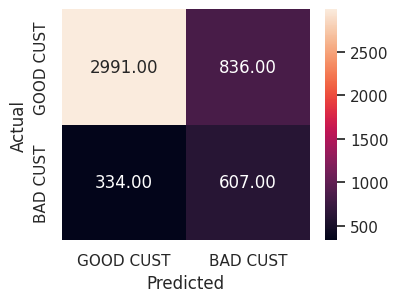

In [157]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_train_lr, y_train_pred_lr,labels)

#####**Validating performance based on Test Data**

In [158]:
# Predicting on the test data to validate the model performance
y_test_pred_lr = model_lr.predict(X_test_scaled_lr)

In [159]:
# Checking LR Model Accuracy
accuracy = accuracy_score(y_test_lr, y_test_pred_lr)
print("Accuracy of the Logistic Regression Model is: ", accuracy)

Accuracy of the Logistic Regression Model is:  0.7575503355704698


              precision    recall  f1-score   support

           0       0.89      0.79      0.84       944
           1       0.44      0.64      0.52       248

    accuracy                           0.76      1192
   macro avg       0.67      0.71      0.68      1192
weighted avg       0.80      0.76      0.77      1192



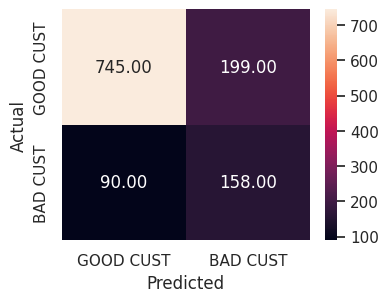

In [160]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_test_lr, y_test_pred_lr,labels)

#### **7.7. CONCLUSION ON LOGISTIC REGRESSION**

The accuracy on training data is slighlty lower than for test data (0.75 to 0.76). With the use of class_weight='balanced', the model is already adjusted to give more weightage to the smaller number of values for BAD=1. With that, the RECALL values are relatively better in comparison to PRECISION.

Focusing on RECALL values for Train vs. Test Data:
For BAD=0, 0.78 with train data is very comparable to 0.79 with test data.
For BAD=1, 0.65 with train data is very comparable to 0.64 with test data.
The absolute quality of Logistic Regression Model is not great, as it is able to get a recall better than 0.65, and much better recall value for BAD=1 is important for the model to be acceptable.

## **7.CS. Logistic Regression with Custom Scaling (CS)**

In [161]:
# Creating a dataframe for Logistic Regression, using the scaled columns, and by dropping the unscaled columns
# CS is for Customer Scalar
data_lr_cs = data.copy()

In [162]:
# Dropping MORTDUE based on the variable value
if(use_feature_MORTDUE == True):
  print("Using MORTDUE in this model training")
else:
  print("Dropping MORTDUE in this model training")
  data_lr_cs = data_lr_cs.drop(columns=['MORTDUE'])

Dropping MORTDUE in this model training


In [163]:
# Applying Log Scaling to VALUE and LOAN columns
data_lr_cs['LOAN'] = np.log10(data_lr_cs['LOAN'])
data_lr_cs['VALUE'] = np.log10(data_lr_cs['VALUE'])

In [164]:
# Comparing between data and data_lr, so that comparison is between fully fixed columns
compare_column_describe(data, data_lr_cs, 'LOAN')

Original  mean    18607.969799
          std     11207.480417
          min      1100.000000
          25%     11100.000000
          50%     16300.000000
          75%     23300.000000
          max     89900.000000
Modified  mean        4.200387
          std         0.250478
          min         3.041393
          25%         4.045323
          50%         4.212188
          75%         4.367356
          max         4.953760
Name: LOAN, dtype: float64


In [165]:
# Comparing between data and data_lr, so that comparison is between fully fixed columns
compare_column_describe(data, data_lr_cs, 'VALUE')

Original  mean    101776.048741
          std      56843.931566
          min       8000.000000
          25%      66489.500000
          50%      90000.000000
          75%     119004.750000
          max     855909.000000
Modified  mean         4.953510
          std          0.216373
          min          3.903090
          25%          4.822753
          50%          4.954243
          75%          5.075564
          max          5.932428
Name: VALUE, dtype: float64


In [166]:
# Creating dummy variables for categorical columns
# And, dropping the first column to avoid redundant values
# Using data as a new dataframe beyond this point, leaving the original dataframe df as is
data_lr_cs = pd.get_dummies(
    data_lr_cs,
    columns = columns_categorical,
    drop_first = True
)

In [167]:
# Checking the data to ensure encoding is successfully done
data_lr_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   float64
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  REASON_HomeImp  5960 non-null   uint8  
 11  JOB_Office      5960 non-null   uint8  
 12  JOB_Other       5960 non-null   uint8  
 13  JOB_ProfExe     5960 non-null   uint8  
 14  JOB_Sales       5960 non-null   uint8  
 15  JOB_Self        5960 non-null   uint8  
dtypes: float64(9), int64(1), uint8(6)
memory usage: 500.7 KB


In [168]:
# Separating the dependent variable
y_lr_cs = data_lr_cs['BAD']

# Dropping BAD from the dataframe to get data for independent variable
x_lr_cs = data_lr_cs.drop('BAD', axis=1)

In [169]:
# Validating the data split
y_lr_cs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


In [170]:
# Validating the data split
x_lr_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   float64
 1   VALUE           5960 non-null   float64
 2   YOJ             5960 non-null   float64
 3   DEROG           5960 non-null   float64
 4   DELINQ          5960 non-null   float64
 5   CLAGE           5960 non-null   float64
 6   NINQ            5960 non-null   float64
 7   CLNO            5960 non-null   float64
 8   DEBTINC         5960 non-null   float64
 9   REASON_HomeImp  5960 non-null   uint8  
 10  JOB_Office      5960 non-null   uint8  
 11  JOB_Other       5960 non-null   uint8  
 12  JOB_ProfExe     5960 non-null   uint8  
 13  JOB_Sales       5960 non-null   uint8  
 14  JOB_Self        5960 non-null   uint8  
dtypes: float64(9), uint8(6)
memory usage: 454.1 KB


In [171]:
# Splitting the dataset into train and test datasets
X_train_lr_cs, X_test_lr_cs, y_train_lr_cs, y_test_lr_cs = train_test_split(x_lr_cs, y_lr_cs, test_size = 0.2, shuffle = True, random_state = 1)

In [172]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train_lr_cs.shape)
print("Shape of test set : ", X_test_lr_cs.shape)

Shape of Training set :  (4768, 15)
Shape of test set :  (1192, 15)


In [173]:
# Checking the shape of the train and test data
print("Shape of Training Resultset : ", y_train_lr_cs.shape)
print("Shape of Testing Resultset : ", y_test_lr_cs.shape)

Shape of Training Resultset :  (4768,)
Shape of Testing Resultset :  (1192,)


In [174]:
# Train logistic regression model
model_lr_cs = LogisticRegression(random_state=50, class_weight='balanced')
model_lr_cs.fit(X_train_lr_cs, y_train_lr_cs)

LogisticRegression(class_weight='balanced', random_state=50)

In [175]:
# Predicting on the test data to validate the model performance
y_train_pred_lr_cs = model_lr_cs.predict(X_train_lr_cs)

In [176]:
# Checking LR Model Accuracy
accuracy_train = accuracy_score(y_train_lr_cs, y_train_pred_lr_cs)
print("Accuracy of the Logistic Regression Model is: ", accuracy_train)

Accuracy of the Logistic Regression Model is:  0.7585989932885906


In [177]:
# Predicting on the test data to validate the model performance
y_test_pred_lr_cs = model_lr_cs.predict(X_test_lr_cs)

In [178]:
# Checking LR Model Accuracy
accuracy = accuracy_score(y_test_lr_cs, y_test_pred_lr_cs)
print("Accuracy of the Logistic Regression Model is: ", accuracy)

Accuracy of the Logistic Regression Model is:  0.7600671140939598


**Comparing the performance of Logistic Regression with Standard Scalar vs. Custom Scaling of specific columns**

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3827
           1       0.42      0.65      0.51       941

    accuracy                           0.75      4768
   macro avg       0.66      0.71      0.67      4768
weighted avg       0.81      0.75      0.77      4768



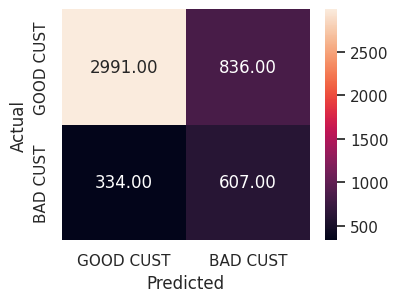

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3827
           1       0.43      0.64      0.51       941

    accuracy                           0.76      4768
   macro avg       0.66      0.72      0.68      4768
weighted avg       0.81      0.76      0.78      4768



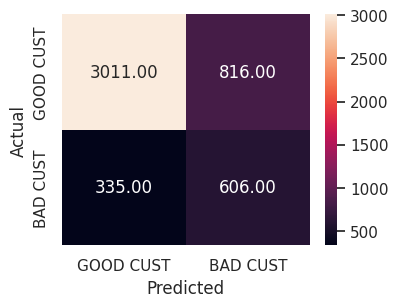

In [179]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_train_lr, y_train_pred_lr,labels)
draw_classification_report_confusion_matrix(y_train_lr_cs, y_train_pred_lr_cs,labels)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       944
           1       0.45      0.63      0.52       248

    accuracy                           0.76      1192
   macro avg       0.67      0.71      0.68      1192
weighted avg       0.80      0.76      0.77      1192



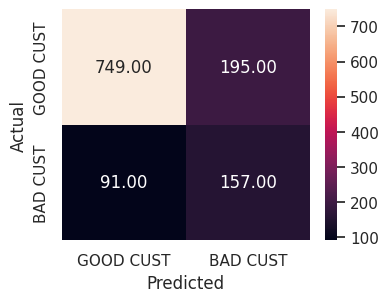

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       944
           1       0.44      0.64      0.52       248

    accuracy                           0.76      1192
   macro avg       0.67      0.71      0.68      1192
weighted avg       0.80      0.76      0.77      1192



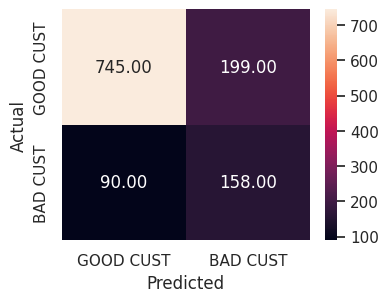

In [180]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_test_lr_cs, y_test_pred_lr_cs,labels)
draw_classification_report_confusion_matrix(y_test_lr, y_test_pred_lr,labels)

**Conclusion based on ReTraining the Logistic Regression with custom scaling**

The model hasn't improved with custom scaling of VALUE and LOAN columns. We can conclude LR is not going to predict very well for this problem, and other models might have to be used.

## **8. Decision Tree**

####**8.1. Preparing the dataframe for Decision Tree**

In [181]:
# Creating a dataframe for Decision Tree
data_dt = data.copy()

####**8.2. Feature Selection - Dropping high colinearity column MORTDUE**

Dropping the MORTDUE column, given the correlation it has with VALUE.

In [182]:
# Dropping MORTDUE based on the variable value
if(use_feature_MORTDUE == True):
  print("Using MORTDUE in this model training")
else:
  print("Dropping MORTDUE in this model training")
  data_dt = data_dt.drop(columns=['MORTDUE'])

Dropping MORTDUE in this model training


In [183]:
# Validating the dataframe to be used for LR (Logistic Regression)
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   object 
 4   JOB      5960 non-null   object 
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


#### **8.3.Encoding the Categorical Features**

In [184]:
# Printing the categorical columns list previously created
columns_categorical

['REASON', 'JOB']

In [185]:
# Creating dummy variables for categorical columns
# And, dropping the first column to avoid redundant values
# Using data as a new dataframe beyond this point, leaving the original dataframe df as is
data_dt = pd.get_dummies(
    data_dt,
    columns = columns_categorical,
    drop_first = True
)

In [186]:
# Checking the data to ensure encoding is successfully done
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  REASON_HomeImp  5960 non-null   uint8  
 11  JOB_Office      5960 non-null   uint8  
 12  JOB_Other       5960 non-null   uint8  
 13  JOB_ProfExe     5960 non-null   uint8  
 14  JOB_Sales       5960 non-null   uint8  
 15  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(2), uint8(6)
memory usage: 500.7 KB


In [187]:
# Visually checking the data that is ready for model training
data_dt.sample(10)

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
1565,0,11400,74016.0,7.0,0.0,0.0,127.625475,0.0,16.0,33.027144,1,0,1,0,0,0
4708,0,24900,169444.0,7.0,1.0,0.0,202.447326,0.0,19.0,35.349212,0,0,1,0,0,0
96,1,4000,59000.0,12.0,2.0,0.0,146.100000,0.0,22.0,33.779915,0,0,1,0,0,0
5267,0,28700,179454.0,1.0,1.0,0.0,223.348664,1.0,19.0,41.136159,0,0,0,1,0,0
5461,0,32700,38584.0,29.0,0.0,0.0,197.986315,0.0,14.0,41.529096,0,0,1,0,0,0
3874,0,20300,107363.0,4.0,0.0,0.0,219.874730,0.0,13.0,29.567221,1,0,1,0,0,0
2277,0,13900,178789.0,7.0,0.0,1.0,192.482316,4.0,26.0,41.176712,0,0,0,1,0,0
3953,0,20700,65000.0,26.0,0.0,0.0,305.266667,3.0,32.0,33.779915,0,0,1,0,0,0
4155,0,21700,14580.0,5.0,0.0,0.0,62.856357,1.0,17.0,40.315819,0,0,1,0,0,0
3719,0,19600,112721.0,18.0,0.0,0.0,239.137794,4.0,31.0,36.031180,0,0,0,0,0,0


#### **8.4. Separating the independent variables from the target variables**

In [188]:
# Separating the dependent variable
y_dt = data_dt['BAD']

# Dropping BAD from the dataframe to get data for independent variable
x_dt = data_dt.drop('BAD', axis=1)

In [189]:
# Validating the data split
y_dt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


In [190]:
# Validating the data split
x_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   int64  
 1   VALUE           5960 non-null   float64
 2   YOJ             5960 non-null   float64
 3   DEROG           5960 non-null   float64
 4   DELINQ          5960 non-null   float64
 5   CLAGE           5960 non-null   float64
 6   NINQ            5960 non-null   float64
 7   CLNO            5960 non-null   float64
 8   DEBTINC         5960 non-null   float64
 9   REASON_HomeImp  5960 non-null   uint8  
 10  JOB_Office      5960 non-null   uint8  
 11  JOB_Other       5960 non-null   uint8  
 12  JOB_ProfExe     5960 non-null   uint8  
 13  JOB_Sales       5960 non-null   uint8  
 14  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(1), uint8(6)
memory usage: 454.1 KB


In [191]:
# Splitting the dataset into train and test datasets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt, y_dt, test_size = 0.2, shuffle = True, random_state = 1)

In [192]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train_dt.shape)
print("Shape of test set : ", X_test_dt.shape)

Shape of Training set :  (4768, 15)
Shape of test set :  (1192, 15)


In [193]:
# Checking the shape of the train and test data
print("Shape of Training Resultset : ", y_train_dt.shape)
print("Shape of Testing Resultset : ", y_test_dt.shape)

Shape of Training Resultset :  (4768,)
Shape of Testing Resultset :  (1192,)


#### **8.5.Validating what max_depth value best suits Decision Tree model training**

In [194]:
dt_max_depth = 15

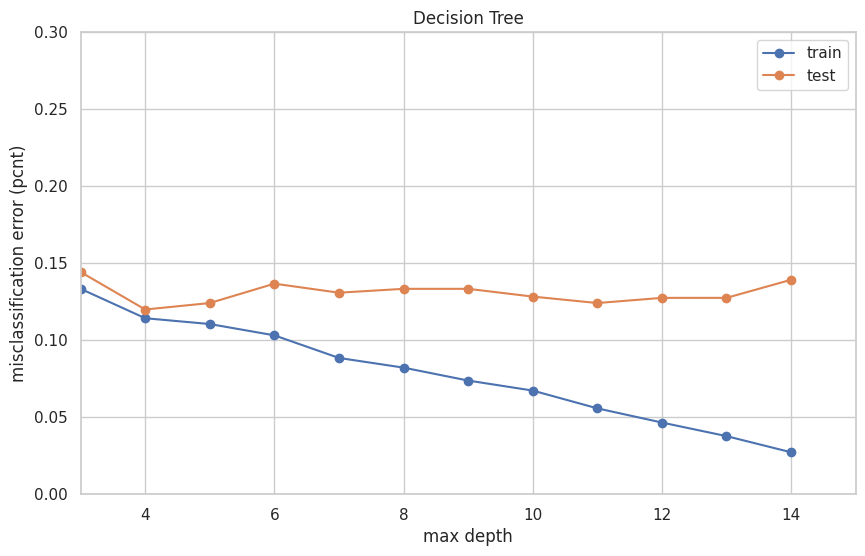

In [195]:
decision_tree_depth_selection(dt_max_depth)

Observations:

As max_depth of the tree increases, the error reduces for both training and testing data. For testing data, the least error is at depth=12, so using that as the depth

#### **8.6. Iterations to find the best depth for Decision Tree**

During the EXPERIMENTATION PHASE, trained the Decision Tree model with multiple max_depth levels. Depth levels experimented with were 5, 8, 10, 12, 19, where 5 and 19 were to validate the extreme value effect.





In [196]:
# Making a choice about the max_depth that can be used for actual model training
# Defining MaxDepth as a variable so that it can be consistently passed
dt_maxdepth = 10

#### **8.7. Building the Model**

In [197]:
print("The tree depth chosen based on max_depth and model training iterations: ", dt_maxdepth)

The tree depth chosen based on max_depth and model training iterations:  10


Experiments:

1. Trained model without class_weight i.e. with class_weight=none. Recall values for test data for BAD=1, which was the main concern area, was 0.59.
2. Retrained the model with class_weight = 'balanced' as the number of records for BAD loans are far few. Upon retraining, the Recall value for test data for BAD=1 improved to 0.69. Deciding to train the model with class_weight='balanced'

In [198]:
# Creating a decision tree model
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = dt_maxdepth, class_weight='balanced')

# Fitting the model on the train data
clf = clf.fit(X_train_dt, y_train_dt)

#### **8.8. Plotting the Decision Tree**

In [199]:
# Building a list of all columns
columns_all = data_dt.columns.tolist()
print(columns_all)

#Dropping the dependent column, which is expected to be at the first position/ index 0
columns_all.pop(0)
print(columns_all)

['BAD', 'LOAN', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
['LOAN', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']


In [200]:
# Output the decision tree in text format
# Given the deeper tree, deciding to output the text format instead of a visual tree
from sklearn.tree import DecisionTreeClassifier, export_text
tree_rules = export_text(clf, feature_names=columns_all)
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- DEBTINC <= 33.78
|   |--- DELINQ <= 1.50
|   |   |--- YOJ <= 16.50
|   |   |   |--- CLNO <= 6.50
|   |   |   |   |--- DEBTINC <= 22.28
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DEBTINC >  22.28
|   |   |   |   |   |--- NINQ <= 1.50
|   |   |   |   |   |   |--- DEROG <= 2.50
|   |   |   |   |   |   |   |--- LOAN <= 19000.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- LOAN >  19000.00
|   |   |   |   |   |   |   |   |--- CLAGE <= 81.39
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- CLAGE >  81.39
|   |   |   |   |   |   |   |   |   |--- REASON_HomeImp <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- REASON_HomeImp >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DEROG >  2.50
|   |   |   |   |   |   |   |--- CLNO <= 3.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   | 

Observations from Decision Tree plotting:

We notice that the first split happens using DELINQ, which was also seen to have the highest correlation with BAD (Loan Status). The next feature chosen for additional splits is DEBTINC. Other features observed to be used are NINQ, DEROG, CLAGE etc. A separate exercise to identify the importance of various features will be conducted later.

#### **8.9. Predicting and Model Performance Evaluation for Decision Tree**

#####**Validating performance based on Training Data**

In [201]:
# Predicting on the test data to validate the model performance
y_train_pred_dt = clf.predict(X_train_dt)

In [202]:
# Checking LR Model Accuracy
accuracy = accuracy_score(y_train_dt, y_train_pred_dt)
print("Accuracy of the Decision Tree Model using Training Data is: ", accuracy)

Accuracy of the Decision Tree Model using Training Data is:  0.917994966442953


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3827
           1       0.75      0.89      0.81       941

    accuracy                           0.92      4768
   macro avg       0.86      0.91      0.88      4768
weighted avg       0.93      0.92      0.92      4768



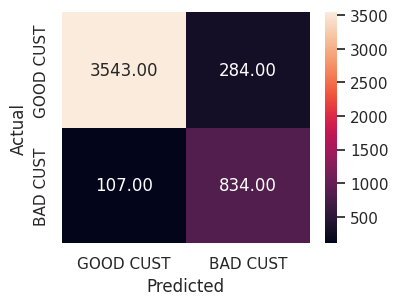

In [203]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_train_dt, y_train_pred_dt, labels)

#####**Validating performance based on Test Data**

In [204]:
# Predicting on the test data to validate the model performance
y_test_pred_dt = clf.predict(X_test_dt)

In [205]:
# Checking LR Model Accuracy
accuracy = accuracy_score(y_test_dt, y_test_pred_dt)
print("Accuracy of the Logistic Regression Model is: ", accuracy)

Accuracy of the Logistic Regression Model is:  0.8598993288590604


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       944
           1       0.65      0.69      0.67       248

    accuracy                           0.86      1192
   macro avg       0.79      0.80      0.79      1192
weighted avg       0.86      0.86      0.86      1192



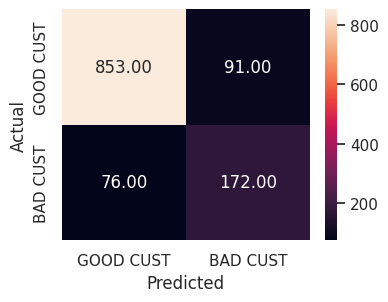

In [206]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_test_dt, y_test_pred_dt,labels)

####**8.10. Validating Feature Importance for Decision Tree**

In [207]:
# Find the feature importance
importances_dt = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_dt = pd.DataFrame({
    'Feature': X_train_dt.columns,
    'Importance': importances_dt
})

# Sort the DataFrame by importance
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_dt)

           Feature  Importance
8          DEBTINC    0.521796
5            CLAGE    0.108100
4           DELINQ    0.078412
0             LOAN    0.056071
2              YOJ    0.055892
7             CLNO    0.051902
1            VALUE    0.051326
6             NINQ    0.029368
3            DEROG    0.026969
9   REASON_HomeImp    0.006380
13       JOB_Sales    0.005706
11       JOB_Other    0.003834
10      JOB_Office    0.002740
12     JOB_ProfExe    0.001504
14        JOB_Self    0.000000


DEBTINC plays the most important role in splitting the data upfront. DELINQ, CLAGE has the next importance, following by VALUE, CLNO, LOAN, YOJ falling into similar bucket of importance. NINQ and DEROG are the least important amongst the numeric features. REASON and JOB are least important.

#### **8.10. CONCLUSION ON DECISION TREES**

A Recall of 0.59 in Decision Tree is much better than Recall value of 0.25 in Logistic Regression. A recall of 0.59 means, 4 in 10 customers will be falsely identified as good customers, where as they have a high potential of defaulting. This risk is reduced with Decision Tree, but not mitigated enough.

## **9. Decision Tree - Hyperparameter Tuning**


* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Defining the Hypertuning Criteria**

In [208]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'], # Retaining this setting from the previous model training as using class_weight='balanced' yeilded best result
    'max_depth': [8, 10, 12], # Deciding these values based on previously plotted graph for best max_depth
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

####**Hypertuning executable code**

In [209]:
# Creating a dataframe for Decision Tree
data_dt_hyp_tuned = data.copy()

In [210]:
# Dropping MORTDUE based on the variable value
if(use_feature_MORTDUE == True):
  print("Using MORTDUE in this model training")
else:
  print("Dropping MORTDUE in this model training")
  data_dt_hyp_tuned = data_dt_hyp_tuned.drop(columns=['MORTDUE'])

Dropping MORTDUE in this model training


In [211]:
# Validating the dataframe to be used for LR (Logistic Regression)
data_dt_hyp_tuned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   object 
 4   JOB      5960 non-null   object 
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


In [212]:
# Printing the categorical columns list previously created
columns_categorical

['REASON', 'JOB']

In [213]:
# Creating dummy variables for categorical columns
# And, dropping the first column to avoid redundant values
# Using data as a new dataframe beyond this point, leaving the original dataframe df as is
data_dt_hyp_tuned = pd.get_dummies(
    data_dt_hyp_tuned,
    columns = columns_categorical,
    drop_first = True
)

In [214]:
# Checking the data to ensure encoding is successfully done
data_dt_hyp_tuned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  REASON_HomeImp  5960 non-null   uint8  
 11  JOB_Office      5960 non-null   uint8  
 12  JOB_Other       5960 non-null   uint8  
 13  JOB_ProfExe     5960 non-null   uint8  
 14  JOB_Sales       5960 non-null   uint8  
 15  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(2), uint8(6)
memory usage: 500.7 KB


In [215]:
# Visually checking the data that is ready for model training
data_dt_hyp_tuned.sample(10)

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2470,0,14800,66258.0,7.0,0.0,0.0,240.863441,0.0,17.0,34.532496,0,0,1,0,0,0
584,0,7500,85650.0,18.0,0.0,0.0,178.334667,0.0,29.0,33.779915,1,0,1,0,0,0
1324,0,10500,88198.0,15.0,0.0,0.0,97.319406,0.0,8.0,27.322397,0,1,0,0,0,0
1704,1,12000,70171.0,7.0,0.0,2.0,206.319234,1.0,12.0,29.843137,1,0,1,0,0,0
2367,0,14300,89324.0,8.0,0.0,0.0,205.683040,0.0,20.0,20.989812,0,0,0,1,0,0
1663,0,11800,110250.0,18.0,0.0,2.0,195.862917,1.0,16.0,36.871699,0,0,1,0,0,0
2639,0,15100,143229.0,12.0,0.0,0.0,129.537315,4.0,21.0,36.776213,1,0,0,1,0,0
3296,0,17500,94904.0,8.0,0.0,0.0,145.120737,0.0,20.0,29.675382,0,0,0,1,0,0
1999,0,12900,102628.0,20.0,0.0,0.0,117.857173,3.0,24.0,28.537354,1,0,1,0,0,0
1369,0,10700,79272.0,18.0,0.0,0.0,218.981662,1.0,16.0,34.015360,1,0,1,0,0,0


In [216]:
# Separating the dependent variable
y_dt_hyp_tuned = data_dt_hyp_tuned['BAD']

# Dropping BAD from the dataframe to get data for independent variable
x_dt_hyp_tuned = data_dt_hyp_tuned.drop('BAD', axis=1)

In [217]:
# Validating the data split
y_dt_hyp_tuned.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


In [218]:
# Validating the data split
x_dt_hyp_tuned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   int64  
 1   VALUE           5960 non-null   float64
 2   YOJ             5960 non-null   float64
 3   DEROG           5960 non-null   float64
 4   DELINQ          5960 non-null   float64
 5   CLAGE           5960 non-null   float64
 6   NINQ            5960 non-null   float64
 7   CLNO            5960 non-null   float64
 8   DEBTINC         5960 non-null   float64
 9   REASON_HomeImp  5960 non-null   uint8  
 10  JOB_Office      5960 non-null   uint8  
 11  JOB_Other       5960 non-null   uint8  
 12  JOB_ProfExe     5960 non-null   uint8  
 13  JOB_Sales       5960 non-null   uint8  
 14  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(1), uint8(6)
memory usage: 454.1 KB


In [219]:
# Splitting the dataset into train and test datasets
X_train_dt_hyp_tuned, X_test_dt_hyp_tuned, y_train_dt_hyp_tuned, y_test_dt_hyp_tuned = train_test_split(x_dt_hyp_tuned, y_dt_hyp_tuned, test_size = 0.2, shuffle = True, random_state = 1)

In [220]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train_dt_hyp_tuned.shape)
print("Shape of test set : ", X_test_dt_hyp_tuned.shape)

Shape of Training set :  (4768, 15)
Shape of test set :  (1192, 15)


In [221]:
# Checking the shape of the train and test data
print("Shape of Training Resultset : ", y_train_dt_hyp_tuned.shape)
print("Shape of Testing Resultset : ", y_test_dt_hyp_tuned.shape)

Shape of Training Resultset :  (4768,)
Shape of Testing Resultset :  (1192,)


In [222]:
# Ideal location for Hyperparameter options, but moving it up to make program easily re-runnable during testing
# Define the hyperparameter grid
"""
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'], # Retaining this setting from the previous model training as using class_weight='balanced' yeilded best result
    'max_depth': [6, 8, 10, 12, 14],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}
"""

"\nparam_grid_dt = {\n    'criterion': ['gini', 'entropy'],\n    'class_weight': ['balanced'], # Retaining this setting from the previous model training as using class_weight='balanced' yeilded best result \n    'max_depth': [6, 8, 10, 12, 14],\n    'min_samples_split': [2, 5, 10, 20],\n    'min_samples_leaf': [1, 2, 4]\n}\n"

In [223]:
# Creating a decision tree model
clf_hyp_tuned = tree.DecisionTreeClassifier()

# Create GridSearchCV object with Decision Tree classifier and hyperparameter grid
grid_search_dt_hyp_tuned = GridSearchCV(estimator=clf_hyp_tuned, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_dt_hyp_tuned.fit(X_train_dt_hyp_tuned, y_train_dt_hyp_tuned)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search_dt_hyp_tuned.best_params_)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [224]:
# Get the best model
best_dtree_model = grid_search_dt_hyp_tuned.best_estimator_

#### **Evalute performance of best hypertuned model and print results**

In [225]:
# Print the best hyperparameters found by GridSearchCV
print("Reprinting Best Hyperparameters:", grid_search_dt_hyp_tuned.best_params_)

Reprinting Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [226]:
# Predicting on the test data to validate the model performance
y_train_pred_dt_hyptuned = best_dtree_model.predict(X_train_dt_hyp_tuned)

In [227]:
# Evaluate the best model on the test set
accuracy = best_dtree_model.score(X_test_dt_hyp_tuned, y_test_dt_hyp_tuned)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8582214765100671


In [228]:
# Predicting using Train Data
y_train_pred_dt_hyp_tuned = best_dtree_model.predict(X_train_dt_hyp_tuned)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3827
           1       0.82      0.96      0.89       941

    accuracy                           0.95      4768
   macro avg       0.91      0.96      0.93      4768
weighted avg       0.96      0.95      0.95      4768



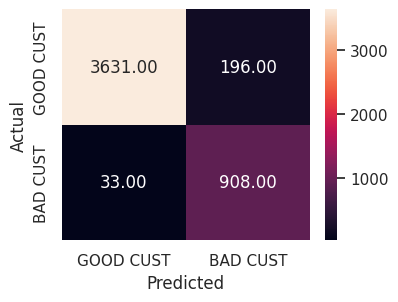

In [229]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_train_dt_hyp_tuned, y_train_pred_dt_hyp_tuned, labels)

In [230]:
# Predicting using Test Data
y_test_pred_dt_hyp_tuned = best_dtree_model.predict(X_test_dt_hyp_tuned)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       944
           1       0.65      0.71      0.67       248

    accuracy                           0.86      1192
   macro avg       0.78      0.80      0.79      1192
weighted avg       0.86      0.86      0.86      1192



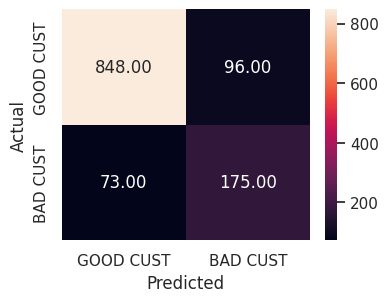

In [231]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_test_dt_hyp_tuned, y_test_pred_dt_hyp_tuned, labels)

**Observation/ Conclusion about Hypertuning of Decision Trees**

The hypertuning values are:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}

The hypertuned Decision Tree model has accuracy of 0.87 in comparison to 0.85 in DT.

Recall Scores:

BAD=0: RF_Hyp_Tuned=0.92 vs. RF=0.89

BAD=1: RF_Hyp_Tuned=0.69 vs. RF=0.69

Precision Scores:

BAD=0: RF_Hyp_Tuned=0.92 vs. RF=0.92

BAD=1: RF_Hyp_Tuned=0.70 vs. RF=0.62

f1-Scores:

BAD=0: RF_Hyp_Tuned=0.92 vs. RF=0.90

BAD=1: RF_Hyp_Tuned=0.69 vs. RF=0.65

Overall, Random Forest Hypertuning improved the model prediction. On training data, the hypertuned RF has accuracy of 0.94 compared to 0.90 for RF and so hypertuning has slightly overfit the model for training. However, there is an overall improvement for Decision Tree.

## **10. Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

#### **10.1. Preparing the dataframe for Random Forest**

In [232]:
# Creating a dataframe for Random Forest
data_rf = data.copy()

#### **10.2. Feature Selection - Dropping high colinearity column MORTDUE**

Dropping the MORTDUE column, given the correlation it has with VALUE.

In [233]:
# Dropping MORTDUE based on the variable value
if(use_feature_MORTDUE == True):
  print("Using MORTDUE in this model training")
else:
  print("Dropping MORTDUE in this model training")
  data_rf = data_rf.drop(columns=['MORTDUE'])

Dropping MORTDUE in this model training


In [234]:
# Validating the dataframe to be used for LR (Logistic Regression)
data_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   object 
 4   JOB      5960 non-null   object 
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


#### **10.3. Encoding the Categorical Features**

In [235]:
# Printing the categorical columns list previously created
columns_categorical

['REASON', 'JOB']

In [236]:
# Creating dummy variables for categorical columns
# And, dropping the first column to avoid redundant values
# Using data as a new dataframe beyond this point, leaving the original dataframe df as is
data_rf = pd.get_dummies(
    data_rf,
    columns = columns_categorical,
    drop_first = True
)

In [237]:
# Checking the data to ensure encoding is successfully done
data_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  REASON_HomeImp  5960 non-null   uint8  
 11  JOB_Office      5960 non-null   uint8  
 12  JOB_Other       5960 non-null   uint8  
 13  JOB_ProfExe     5960 non-null   uint8  
 14  JOB_Sales       5960 non-null   uint8  
 15  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(2), uint8(6)
memory usage: 500.7 KB


In [238]:
# Visually checking the data that is ready for model training
data_rf.sample(10)

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2386,0,14400,70982.0,0.0,0.0,0.0,169.346647,1.0,34.0,42.791633,0,0,0,1,0,0
2315,0,14000,60000.0,27.0,1.0,0.0,281.066667,1.0,17.0,33.779915,0,0,0,0,0,0
2039,0,13000,64764.0,4.0,0.0,0.0,211.066667,3.0,18.0,33.779915,1,0,0,1,0,0
4522,0,23600,70281.0,24.0,0.0,0.0,312.738471,4.0,31.0,35.771676,0,0,1,0,0,0
2556,0,15000,156000.0,20.0,0.0,0.0,239.500000,0.0,28.0,33.779915,0,0,0,1,0,0
958,0,9200,88183.0,8.0,0.0,0.0,105.655205,0.0,23.0,29.007208,0,0,0,0,0,0
4996,0,26500,63918.0,25.0,0.0,0.0,135.440947,0.0,8.0,20.161388,0,0,1,0,0,0
1617,0,11700,58947.0,22.0,0.0,0.0,122.030362,0.0,23.0,40.083145,1,0,1,0,0,0
4773,1,25000,108620.0,20.0,0.0,0.0,101.466667,0.0,4.0,33.779915,0,0,0,0,0,1
3340,0,17800,85864.0,2.0,0.0,0.0,303.837651,3.0,15.0,40.246312,0,0,1,0,0,0


#### **10.4. Separating the independent variables from the target variables**

In [239]:
# Separating the dependent variable
y_rf = data_rf['BAD']

# Dropping BAD from the dataframe to get data for independent variable
x_rf = data_rf.drop('BAD', axis=1)

In [240]:
# Validating the data split
y_rf.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


In [241]:
# Validating the data split
x_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   int64  
 1   VALUE           5960 non-null   float64
 2   YOJ             5960 non-null   float64
 3   DEROG           5960 non-null   float64
 4   DELINQ          5960 non-null   float64
 5   CLAGE           5960 non-null   float64
 6   NINQ            5960 non-null   float64
 7   CLNO            5960 non-null   float64
 8   DEBTINC         5960 non-null   float64
 9   REASON_HomeImp  5960 non-null   uint8  
 10  JOB_Office      5960 non-null   uint8  
 11  JOB_Other       5960 non-null   uint8  
 12  JOB_ProfExe     5960 non-null   uint8  
 13  JOB_Sales       5960 non-null   uint8  
 14  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(1), uint8(6)
memory usage: 454.1 KB


In [242]:
# Splitting the dataset into train and test datasets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size = 0.2, shuffle = True, random_state = 1)

In [243]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train_rf.shape)
print("Shape of test set : ", X_test_rf.shape)

Shape of Training set :  (4768, 15)
Shape of test set :  (1192, 15)


In [244]:
# Checking the shape of the train and test data
print("Shape of Training Resultset : ", y_train_rf.shape)
print("Shape of Testing Resultset : ", y_test_rf.shape)

Shape of Training Resultset :  (4768,)
Shape of Testing Resultset :  (1192,)


#### **10.5. Validating what n_estimators and max_depth value best suits model training**

Testing few combinations to decide what model parameters to use. For this used the max_depth range of 3 to 20, and n_estimators values of 25, 50 and 100 estimators. Found that the impact of higher number of n_estimators i.e. number of decision trees

In [245]:
num_estimators = 25
rf_maxdepth = 20

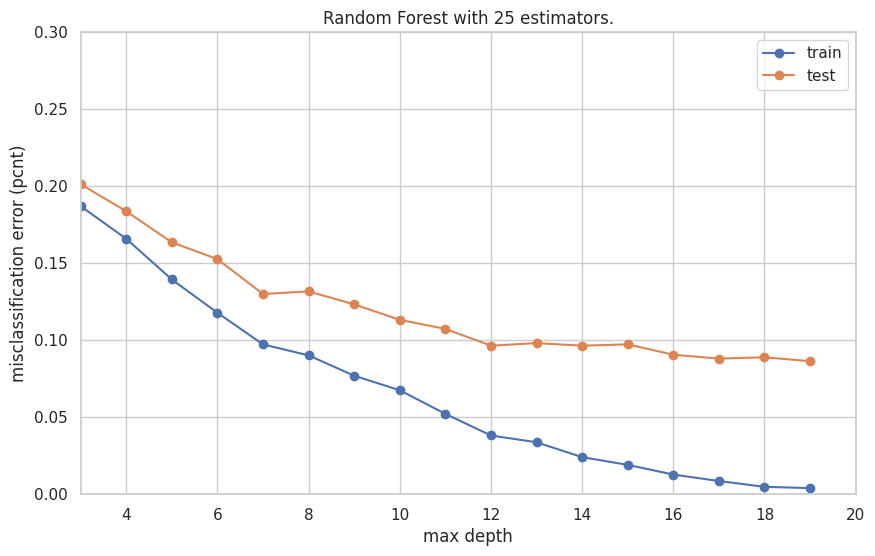

In [246]:
random_forest_estimator_depth_selection(num_estimators, rf_maxdepth)

In [247]:
num_estimators = 100
rf_maxdepth = 20

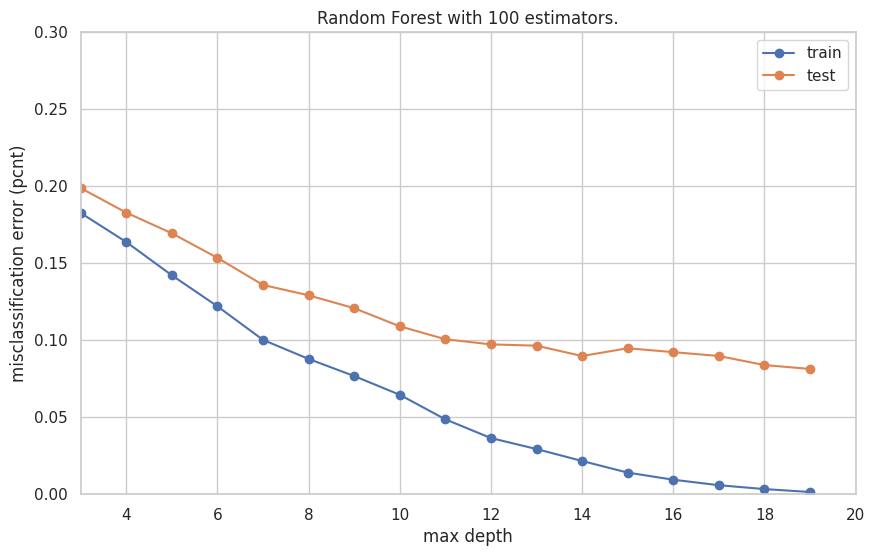

In [248]:
random_forest_estimator_depth_selection(num_estimators, rf_maxdepth)

Concluding on the number of estimators to be used and the random forest depth:

For max_depth = 10 vs. 20, the graph plotted with max_depth = 20 gives a clear clue that if max_depth was only chosen as 10, the misclassifaction error does not reduce beyond a certain level. Going beyond max_depth = 20 does not make sense as the training error is nearly touching 0, which means the model will overfit the training data, which is not ideal.

For n_estimator = 25 vs. 100, there isn't a great amount of change in misclassification error, when max_depth is kept constant at 20.

Finally, selecting the following
1. n_estimator = 25
2. max_depth = 20

#### **10.6. Iterations for best Deicion Tree Model based on Tree Depth**

In [249]:
# Setting final parameter values here to rerun the model training and evaluation
num_estimators = 100
rf_maxdepth = 12
# class_weight='balanced' = YES

Experiments:

1. num_estimators = 25 & rf_maxdepth = 12 - Recall for BAD=1 was poor at 0.52, which is not good at all.
2. num_estimators = 100 & rf_maxdepth = 12 - Recall for BAD=1 was poor at 0.54, which is not good at all. Thus deciding to retain num_estimators = 100, even though misclassification error based decision was otherwise.
3. num_estimators = 100 & rf_maxdepth = 12 & class_weight='balanced' - Recall for BAD=1 improved from previous value of 0.54 to 0.72. Hence deciding to retain thsi setting class_weight='balanced'

#### **10.7. Building the Model Random Forest Model**

In [250]:
print("The tree depth chosen based on experimentation: ", rf_maxdepth)
print("The number of estimators chosen based on experimentation: ", num_estimators)

The tree depth chosen based on experimentation:  12
The number of estimators chosen based on experimentation:  100


In [251]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = rf_maxdepth, n_estimators = num_estimators, class_weight='balanced')

rf_estimator.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, random_state=0)

#### **10.8. Predicting and Model Performance Evaluation for Random Forest**

**Validating performance based on Training Data**

In [252]:
# Predicting on the test data to validate the model performance
y_train_pred_rf = rf_estimator.predict(X_train_rf)

In [253]:
# Checking LR Model Accuracy
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print("Accuracy of the Decision Tree Model using Training Data is: ", accuracy)

Accuracy of the Decision Tree Model using Training Data is:  0.9599412751677853


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3827
           1       0.86      0.95      0.90       941

    accuracy                           0.96      4768
   macro avg       0.93      0.95      0.94      4768
weighted avg       0.96      0.96      0.96      4768



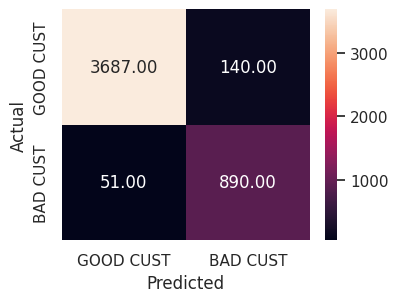

In [254]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_train_rf, y_train_pred_rf, labels)

**Validating performance based on Test Data**

In [255]:
# Predicting on the test data to validate the model performance
y_test_pred_rf = rf_estimator.predict(X_test_rf)

In [256]:
# Checking LR Model Accuracy
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print("Accuracy of the Logistic Regression Model is: ", accuracy)

Accuracy of the Logistic Regression Model is:  0.9068791946308725


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       944
           1       0.79      0.75      0.77       248

    accuracy                           0.91      1192
   macro avg       0.86      0.85      0.86      1192
weighted avg       0.91      0.91      0.91      1192



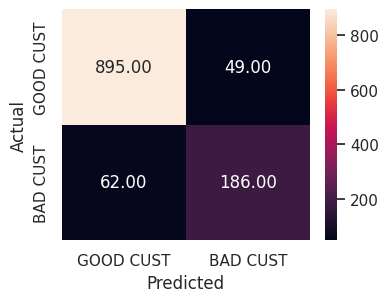

In [257]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_test_rf, y_test_pred_rf,labels)

####**10.9. Validating Feature Importance for Random Forest**

In [258]:
# Find the feature importance
importances_rf = rf_estimator.feature_importances_

# Create a DataFrame for better visualization
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_rf.columns,
    'Importance': importances_rf
})

# Sort the DataFrame by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_rf)

           Feature  Importance
8          DEBTINC    0.292658
5            CLAGE    0.116398
4           DELINQ    0.111648
1            VALUE    0.085468
0             LOAN    0.084953
7             CLNO    0.076865
2              YOJ    0.071987
3            DEROG    0.056792
6             NINQ    0.047325
10      JOB_Office    0.012863
9   REASON_HomeImp    0.012359
11       JOB_Other    0.010760
12     JOB_ProfExe    0.008859
13       JOB_Sales    0.006837
14        JOB_Self    0.004228


## **11. Random Forest Classifier Hyperparameter Tuning**

**Defining the Hyper Tuning Params**

In [259]:
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200], # 25 was the last used value for RF, so including
    'max_depth': [10, 12, 14], # 12 was the depth used in RF, so including
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # Using balanced as it is proven to generate better results than none
}

####**Hypertuning executable code**

In [260]:
# Creating a dataframe for Decision Tree
data_rf_hyp_tuned = data.copy()

In [261]:
# Dropping MORTDUE based on the variable value
if(use_feature_MORTDUE == True):
  print("Using MORTDUE in this model training")
else:
  print("Dropping MORTDUE in this model training")
  data_rf_hyp_tuned = data_rf_hyp_tuned.drop(columns=['MORTDUE'])

Dropping MORTDUE in this model training


In [262]:
# Validating the dataframe to be used for LR (Logistic Regression)
data_rf_hyp_tuned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   object 
 4   JOB      5960 non-null   object 
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


In [263]:
# Printing the categorical columns list previously created
columns_categorical

['REASON', 'JOB']

In [264]:
# Creating dummy variables for categorical columns
# And, dropping the first column to avoid redundant values
# Using data as a new dataframe beyond this point, leaving the original dataframe df as is
data_rf_hyp_tuned = pd.get_dummies(
    data_rf_hyp_tuned,
    columns = columns_categorical,
    drop_first = True
)

In [265]:
# Checking the data to ensure encoding is successfully done
data_rf_hyp_tuned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   VALUE           5960 non-null   float64
 3   YOJ             5960 non-null   float64
 4   DEROG           5960 non-null   float64
 5   DELINQ          5960 non-null   float64
 6   CLAGE           5960 non-null   float64
 7   NINQ            5960 non-null   float64
 8   CLNO            5960 non-null   float64
 9   DEBTINC         5960 non-null   float64
 10  REASON_HomeImp  5960 non-null   uint8  
 11  JOB_Office      5960 non-null   uint8  
 12  JOB_Other       5960 non-null   uint8  
 13  JOB_ProfExe     5960 non-null   uint8  
 14  JOB_Sales       5960 non-null   uint8  
 15  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(2), uint8(6)
memory usage: 500.7 KB


In [266]:
# Visually checking the data that is ready for model training
data_rf_hyp_tuned.sample(10)

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3440,0,18200,94898.000000,22.0,0.0,0.0,223.901918,2.0,41.000000,35.998225,0,0,1,0,0,0
933,0,9000,56782.000000,9.0,0.0,0.0,106.500537,3.0,33.000000,40.084176,1,0,1,0,0,0
1197,1,10000,79500.000000,19.0,0.0,0.0,285.100000,2.0,7.000000,33.779915,0,0,0,1,0,0
1726,0,12000,106000.000000,6.0,0.0,0.0,78.066667,2.0,14.000000,33.779915,0,0,1,0,0,0
673,0,8000,60000.000000,11.0,0.0,0.0,107.533333,1.0,19.000000,33.779915,0,0,0,0,0,0
4680,0,24600,146804.000000,7.0,0.0,0.0,173.466667,1.0,21.296096,17.263535,0,0,1,0,0,0
3057,0,16600,56631.000000,2.0,0.0,0.0,98.760223,1.0,8.000000,39.799527,0,1,0,0,0,0
1161,0,10000,107900.000000,12.0,0.0,2.0,176.533333,0.0,28.000000,33.779915,1,0,0,1,0,0
4097,0,21400,69461.000000,25.0,0.0,0.0,314.638958,2.0,32.000000,35.982084,0,0,1,0,0,0
2586,1,15000,101776.048741,10.0,0.0,1.0,75.333333,0.0,33.000000,33.779915,0,0,1,0,0,0


In [267]:
# Separating the dependent variable
y_rf_hyp_tuned = data_rf_hyp_tuned['BAD']

# Dropping BAD from the dataframe to get data for independent variable
x_rf_hyp_tuned = data_rf_hyp_tuned.drop('BAD', axis=1)

In [268]:
# Validating the data split
y_rf_hyp_tuned.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


In [269]:
# Validating the data split
x_rf_hyp_tuned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   int64  
 1   VALUE           5960 non-null   float64
 2   YOJ             5960 non-null   float64
 3   DEROG           5960 non-null   float64
 4   DELINQ          5960 non-null   float64
 5   CLAGE           5960 non-null   float64
 6   NINQ            5960 non-null   float64
 7   CLNO            5960 non-null   float64
 8   DEBTINC         5960 non-null   float64
 9   REASON_HomeImp  5960 non-null   uint8  
 10  JOB_Office      5960 non-null   uint8  
 11  JOB_Other       5960 non-null   uint8  
 12  JOB_ProfExe     5960 non-null   uint8  
 13  JOB_Sales       5960 non-null   uint8  
 14  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(1), uint8(6)
memory usage: 454.1 KB


In [270]:
# Splitting the dataset into train and test datasets
X_train_rf_hyp_tuned, X_test_rf_hyp_tuned, y_train_rf_hyp_tuned, y_test_rf_hyp_tuned = train_test_split(x_rf_hyp_tuned, y_rf_hyp_tuned, test_size = 0.2, shuffle = True, random_state = 1)

In [271]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train_rf_hyp_tuned.shape)
print("Shape of test set : ", X_test_rf_hyp_tuned.shape)

Shape of Training set :  (4768, 15)
Shape of test set :  (1192, 15)


In [272]:
# Checking the shape of the train and test data
print("Shape of Training Resultset : ", y_train_rf_hyp_tuned.shape)
print("Shape of Testing Resultset : ", y_test_rf_hyp_tuned.shape)

Shape of Training Resultset :  (4768,)
Shape of Testing Resultset :  (1192,)


In [273]:
# Ideal location for Hyperparameter options, but moving it up to make program easily re-runnable during testing
# Define the hyperparameter grid
"""
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200], # 25 was the last used value for RF, so including
    'max_depth': [10, 12, 14], # 12 was the depth used in RF, so including
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # Using balanced as it is proven to generate better results than none
}
"""

"\n# Define the hyperparameter grid\nparam_grid_rf = {\n    'n_estimators': [25, 50, 100, 200], # 25 was the last used value for RF, so including\n    'max_depth': [10, 12, 14], # 12 was the depth used in RF, so including\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'class_weight': ['balanced']  # Using balanced as it is proven to generate better results than none\n}\n"

In [274]:
# Creating a decision tree model
rf_hyp_tuned = RandomForestClassifier()

# Create GridSearchCV object with Decision Tree classifier and hyperparameter grid
grid_search_rf_hyp_tuned = GridSearchCV(estimator=rf_hyp_tuned, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf_hyp_tuned.fit(X_train_rf_hyp_tuned, y_train_rf_hyp_tuned)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search_rf_hyp_tuned.best_params_)

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [275]:
# Get the best model
best_rf_model = grid_search_rf_hyp_tuned.best_estimator_

####**Evalute performance of best hypertuned model and print results**

In [276]:
# Print the best hyperparameters found by GridSearchCV
print("Reprinting Best Hyperparameters:", grid_search_rf_hyp_tuned.best_params_)

Reprinting Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [277]:
# Predicting on the test data to validate the model performance
y_train_pred_rf_hyptuned = best_rf_model.predict(X_train_rf_hyp_tuned)

In [278]:
# Evaluate the best model on the test set
accuracy = grid_search_rf_hyp_tuned.score(X_test_rf_hyp_tuned, y_test_rf_hyp_tuned)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.9169463087248322


In [279]:
# Predicting using Train Data
y_train_pred_rf_hyp_tuned = best_rf_model.predict(X_train_dt_hyp_tuned)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3827
           1       0.95      0.98      0.97       941

    accuracy                           0.99      4768
   macro avg       0.97      0.98      0.98      4768
weighted avg       0.99      0.99      0.99      4768



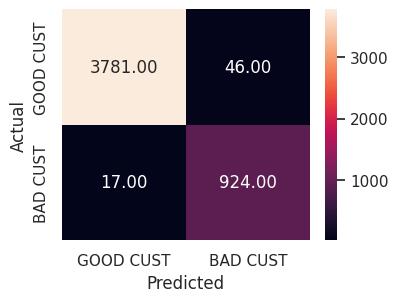

In [280]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_train_rf_hyp_tuned, y_train_pred_rf_hyp_tuned, labels)

In [281]:
# Predicting using Test Data
y_test_pred_rf_hyp_tuned = best_rf_model.predict(X_test_rf_hyp_tuned)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       944
           1       0.85      0.73      0.78       248

    accuracy                           0.92      1192
   macro avg       0.89      0.85      0.87      1192
weighted avg       0.91      0.92      0.91      1192



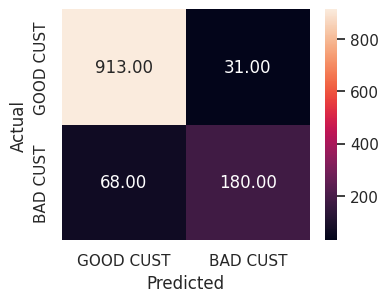

In [282]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_test_rf_hyp_tuned, y_test_pred_rf_hyp_tuned, labels)

**Observations from Random Forest Hypertuning**
The hypertuning values are:
{'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
The hypertuned Random Forests model has an accuracy of 0.92 compared to 0.91 in RF.

Recall Scores:

BAD=0: RF_Hyp_Tuned=0.97 vs. RF=0.96

BAD=1: RF_Hyp_Tuned=0.73 vs. RF=0.72

Precision Scores:

BAD=0: RF_Hyp_Tuned=0.93 vs. RF=0.93

BAD=1: RF_Hyp_Tuned=0.88 vs. RF=0.83

f1-Scores:

BAD=0: RF_Hyp_Tuned=0.95 vs. RF=0.94

BAD=1: RF_Hyp_Tuned=0.80 vs. RF=0.77

Overall, Random Forest Hypertuning improved the model prediction, though it also overfit the data for training data in comparison to RF. It can be tuned further to balance it out better.

##**12. XGBoost**



### **12.1. Preparing to run XGBoost**

In [283]:
# Creating a dataframe for XGBoost
data_xgb = data.copy()

In [284]:
# Dropping MORTDUE based on the variable value
if(use_feature_MORTDUE == True):
  print("Using MORTDUE in this model training")
else:
  print("Dropping MORTDUE in this model training")
  data_xgb = data_xgb.drop(columns=['MORTDUE'])

Dropping MORTDUE in this model training


In [285]:
# Checking to ensure MORTDUE is removed
data_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   object 
 4   JOB      5960 non-null   object 
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB


In [286]:
# Creating dummy variables for categorical columns
# And, dropping the first column to avoid redundant values
# Using data as a new dataframe beyond this point, leaving the original dataframe df as is
data_xgb = pd.get_dummies(
    data_xgb,
    columns = columns_categorical,
    drop_first = True
)

In [287]:
# Visually checking the data that is ready for model training
data_xgb.sample(10)

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3997,0,20900,105434.0,7.0,2.0,0.0,242.164257,1.0,13.0,40.163651,0,0,1,0,0,0
1403,0,10800,70996.0,4.0,0.0,0.0,171.759579,2.0,17.0,33.227794,0,0,1,0,0,0
3494,0,18400,59750.0,6.0,1.0,0.0,109.961406,1.0,10.0,27.911845,0,0,1,0,0,0
3317,0,17600,65665.0,6.0,0.0,0.0,100.174004,2.0,15.0,43.769685,0,0,1,0,0,0
3409,0,18000,196860.0,7.0,0.0,0.0,173.466667,2.0,16.0,30.778167,0,0,1,0,0,0
1377,0,10700,69166.0,6.0,0.0,0.0,133.906505,0.0,17.0,36.180858,1,0,1,0,0,0
174,0,5000,65400.0,1.5,0.0,0.0,51.766667,0.0,4.0,33.779915,1,1,0,0,0,0
1232,0,10100,73266.0,5.0,0.0,0.0,85.635235,1.0,14.0,24.534325,0,1,0,0,0,0
760,0,8400,54707.0,10.0,0.0,0.0,203.242965,1.0,23.0,31.217710,0,1,0,0,0,0
4673,0,24500,159934.0,2.0,0.0,0.0,300.625190,0.0,25.0,37.786175,0,0,0,0,0,0


In [288]:
# Separating the dependent variable
y_xgb = data_xgb['BAD']

# Dropping BAD from the dataframe to get data for independent variable
x_xgb = data_xgb.drop('BAD', axis=1)

In [289]:
# Validating the data split
y_xgb.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5960 entries, 0 to 5959
Series name: BAD
Non-Null Count  Dtype
--------------  -----
5960 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


In [290]:
# Validating the data split
x_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOAN            5960 non-null   int64  
 1   VALUE           5960 non-null   float64
 2   YOJ             5960 non-null   float64
 3   DEROG           5960 non-null   float64
 4   DELINQ          5960 non-null   float64
 5   CLAGE           5960 non-null   float64
 6   NINQ            5960 non-null   float64
 7   CLNO            5960 non-null   float64
 8   DEBTINC         5960 non-null   float64
 9   REASON_HomeImp  5960 non-null   uint8  
 10  JOB_Office      5960 non-null   uint8  
 11  JOB_Other       5960 non-null   uint8  
 12  JOB_ProfExe     5960 non-null   uint8  
 13  JOB_Sales       5960 non-null   uint8  
 14  JOB_Self        5960 non-null   uint8  
dtypes: float64(8), int64(1), uint8(6)
memory usage: 454.1 KB


In [291]:
# Splitting the dataset into train and test datasets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x_xgb, y_xgb, test_size = 0.2, shuffle = True, random_state = 1)

In [292]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train_xgb.shape)
print("Shape of test set : ", X_test_xgb.shape)

Shape of Training set :  (4768, 15)
Shape of test set :  (1192, 15)


In [293]:
# Checking the shape of the train and test data
print("Shape of Training Resultset : ", y_train_xgb.shape)
print("Shape of Testing Resultset : ", y_test_xgb.shape)

Shape of Training Resultset :  (4768,)
Shape of Testing Resultset :  (1192,)


In [294]:
from xgboost import XGBClassifier

# Create the XGBoost model
model_xgb = XGBClassifier()

### **12.2. Hypertuning and experimentation**

**Experimentation based hyper parameter tuning**


1. {'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 300, 'subsample': 0.8}
2. {'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 300, 'scale_pos_weight': 0.25, 'subsample': 0.8}

With expt #1 and #2 - The model was overfitting for training data

Hence, reducing the max_depth to 6,8, 10 as deeper trees seem to be overfitting
3. {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'scale_pos_weight': 0.25, 'subsample': 1.0}

The recall for BAD=1 for test data is at 0.64, which is poorer than the RF with Hypertuning which yeilded 0.64 as well.

Reducing max_depth to 3,4,5.

4. {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'scale_pos_weight': 0.25, 'subsample': 1.0}

The recall for BAD=1 for test data is 0.55, suggesting reducing max_depth is counter productive. Going back to max_depth values of 10,12,14 even though models overfit. Focusing on other settings to reduce the model overfitment.

Adjusting learning rate.
5. {'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 300, 'scale_pos_weight': 0.25, 'subsample': 1.0}

If learning rate is changed from 0.1 (big increments) to 0.01 (smaller increments), the model performance severly degrades.

Introducing alpha (L1) and lambda (L2) regularization.

6. With L1 (Lasso) and L2 (Ridge) regression introduction, the model ended up overfitting for training data with 100% accuracy which is a no-go. The recall for BAD=1 improved to 0.77 though, but unfortunately such a model cannot be used.

Final run with few more changes combining all observations so far.
7. {'alpha': '1', 'lambda': '1', 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 200, 'scale_pos_weight': 4, 'subsample': 1.0}

Hypertuned XGBoost beat Hypertuned Random Forests for the above hyperparameter values. This will be the final run.


In [295]:
# Define a grid of hyperparameters to search over
param_grid_xgb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [12,14,16], #Random Forest was trained with max_depth=14, so using similar values
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'scale_pos_weight': [4],
    'alpha': ['1'],
    'lambda': ['1']
}

### **12.3. Running XGBoost for given Hyperparameters**

In [296]:
# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, scoring='recall', cv=3)

In [297]:
# Fit the grid search to XGB data
grid_search_xgb.fit(X_train_xgb, y_train_xgb)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': ['1'], 'lambda': ['1'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [12, 14, 16],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [4],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='recall')

In [298]:
# Getting the best hyperparameters from grid search based model training
best_params_xgb = grid_search_xgb.best_params_
print(best_params_xgb)

{'alpha': '1', 'lambda': '1', 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 200, 'scale_pos_weight': 4, 'subsample': 1.0}


In [299]:
# Create and train the XGBoost model with the best hyperparameters
model_best_xgb = XGBClassifier(**best_params_xgb)
model_best_xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(alpha='1', base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda='1', learning_rate=0.01,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, ...)

### **12.4. Validating the performance for train and test data**

In [300]:
# Predicting on the train data to validate the model performance
y_train_pred_xgb = model_best_xgb.predict(X_train_xgb)

In [301]:
# Checking LR Model Accuracy
accuracy_train_xgb = accuracy_score(y_train_xgb, y_train_pred_xgb)
print("Accuracy of the Logistic Regression Model is: ", accuracy_train_xgb)

Accuracy of the Logistic Regression Model is:  0.958263422818792


              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3827
           1       0.83      0.98      0.90       941

    accuracy                           0.96      4768
   macro avg       0.92      0.97      0.94      4768
weighted avg       0.96      0.96      0.96      4768



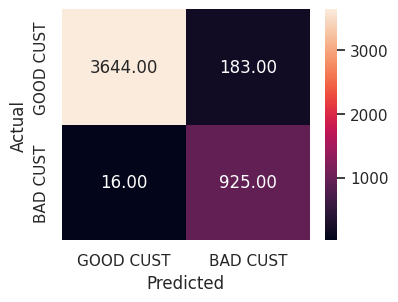

In [302]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_train_xgb, y_train_pred_xgb, labels)

In [303]:
# Predicting on the train data to validate the model performance
y_test_pred_xgb = model_best_xgb.predict(X_test_xgb)

In [304]:
# Checking LR Model Accuracy
accuracy_test_xgb = accuracy_score(y_test_xgb, y_test_pred_xgb)
print("Accuracy of the Logistic Regression Model is: ", accuracy_test_xgb)

Accuracy of the Logistic Regression Model is:  0.8875838926174496


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       944
           1       0.72      0.76      0.74       248

    accuracy                           0.89      1192
   macro avg       0.83      0.84      0.83      1192
weighted avg       0.89      0.89      0.89      1192



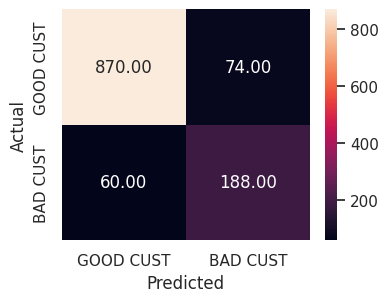

In [305]:
# Drawing the Classification Report and Confusion Matrix
labels = ['GOOD CUST','BAD CUST']
draw_classification_report_confusion_matrix(y_test_xgb, y_test_pred_xgb, labels)

### **12.5. Comparing XGBoost to Decision Tree and Random Forests**

In [306]:
print("__________________________________________________________________")
print("DecisionTree-Without Hypertuning")
print(classification_report(y_train_dt, y_train_pred_dt))
print(classification_report(y_test_dt, y_test_pred_dt))
print("__________________________________________________________________")
print("RandomForests-HyperTuned")
print(classification_report(y_train_rf_hyp_tuned, y_train_pred_rf_hyp_tuned))
print(classification_report(y_test_rf_hyp_tuned, y_test_pred_rf_hyp_tuned))
print("__________________________________________________________________")
print("XGBoost - Hypertuned")
print(classification_report(y_train_xgb, y_train_pred_xgb))
print(classification_report(y_test_xgb, y_test_pred_xgb))

__________________________________________________________________
DecisionTree-Without Hypertuning
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3827
           1       0.75      0.89      0.81       941

    accuracy                           0.92      4768
   macro avg       0.86      0.91      0.88      4768
weighted avg       0.93      0.92      0.92      4768

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       944
           1       0.65      0.69      0.67       248

    accuracy                           0.86      1192
   macro avg       0.79      0.80      0.79      1192
weighted avg       0.86      0.86      0.86      1192

__________________________________________________________________
RandomForests-HyperTuned
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3827
           1       0.95      0.98      0.97  

**Observations and conclusions on use of XGBoost**

Hypertuned XGBoost beat Hypertuned Randopm Forests which in turn was better than Decision Trees.  

### **12.5. Peeking into the XGBoost Model - Column Importance,Tree Visualization etc.**

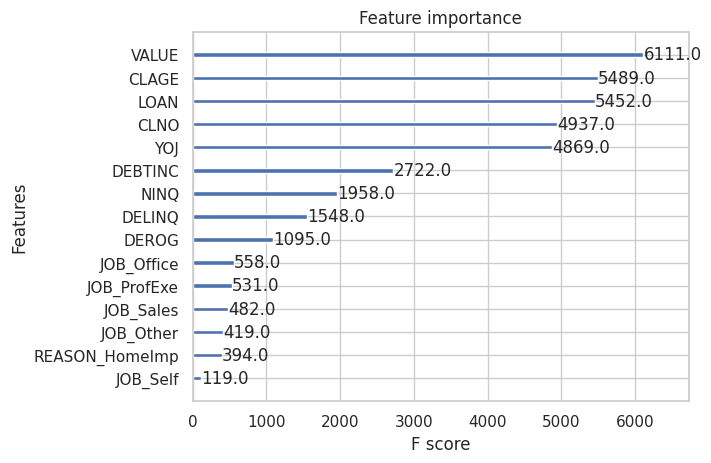

In [310]:
from xgboost import plot_importance
# Checking the feature importance map as used by XGBoost
plot_importance(model_best_xgb)
plt.show()

**Observations about feature importance (also in comparison to Decision Tree)**

VALUE is the top feature for XGBoost while it was fairly low on Decision Tree feature stack.

DEBTINC was top feature for DecisionTree while it is fairly low on the list for XGBoost.

Overall, the order of Feature Importance is quite different for XGBoost as compared to Decision Tree.

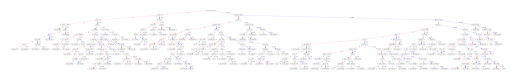

In [325]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Visualize an individual tree
xgb.plot_tree(model_best_xgb, num_trees=0)
plt.show()

##**12. RESULTS AND RECOMMENDATIONS**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Random Forest as expected is performing the best. Decision Tree is the next best, but the one that the bank will have to rely upon as decisions have to be explainable, and Logistic Regression is the least effective.

Feature Engineering plays a common role across all of these models, barring the use of StandardScalar for Logistic Regression which scales all columns uniformly given the sensitivity of LR towards scales. All features have peculiar missing data and outlier patterns. If feature engineering is improved further, then there can be improvement in predictions using all models.

Further, the data gathering process itself can be mroe robust via inclusion of additional columns that might help the models train and predict better.

Last but not least, the outliers and missing data are a function of bank's processes, and those can be improved too. An example is to capture critical data like DEBTINC (Debt to Income) for each customer. This information has historically been used to decide the credit worthiness of a customer in the past, indicating existance of clear patterns in issuance and non-issuance of loans, and within issued loans, DEBTINC data has played a pivotal role in true success of bank receiving the full repayment from a good customer. Yet, this column has the highest (1267 out of 5960 i.e. 21%) missing data. This was further justified by the feature importance validation which put DEBTINC at the top. Bank needs to tighten their processes and software to ensure loan should not be processed without this information. Additionally, data about loan request rejection can be studied separately to validate the quality of decisions made upfront by the bank in issuing loans, as there is a high chance bad loans are being issued and then this current exercise is only trying to identify good vs. bad customers just by looking at a post-loan-issuance event. There are chances the bank has turned down good customers, which is a loss, and that needs to be identified too. Then automatically, the quality of data to identify good vs. bad customers within the customer base makes full sense. Missed opportunities can cost bank a lot of loss of profit too.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

In a nutshell it boils down to Credit Worthiness (function of DEBTINC and DELINQ) becoming most significant, followed by Customer Net Asset Value (function of home value, mortgage due, and length of healthy credit), and least affected by Customer Profile (length and type of job).

Explanation to support this theory:

DEBTINC (Debt to Income) plays a pivotal role in the current dataset, owing to the reliance of the past reliance by the bank on this data. This has introduced a natural bias, which may be logical. Other important indicators from the real world seam to be past deliquency reports that directly hint at past history of known loan defaults - presence of such data should be a red signal to loan issuance, unless proven otherwise, but the data seems to suggest that bank has not paid enough attention to this strong signal.

Given this is Home Equity Line of Credit, there is a guaranteed presence of another primary loan i.e. the Home Loan. Value of the home vs. the unpaid mortgage provide a lot of insight into customer's credit worthiness. Thus, the length of time a customer has paid their other loans (CLAGE), tells what the customer's long term ability to repay loans has been. Number of credit lines supports this information further. Presence of DELINQ reports, or poor DEBTINC scores trumps this set of positive data.

Years of job, job title, new credit inquiries are all explaining something additional about the customer, but are weaker signals in comparison. Reason for taking HELOC is relatively a weak signal too, and does not convey much given the mixed bag of good vs. bad customer existance within this bucket.


**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

Explanability is super important and a non-negotiable ask, this Decision Tree should be used, but Random Forest performs much better and hence it cannot be ignored. The bank can take the approach of using both these models. Primary prediction to be produced using Random Forest and when the results concur, use Decision Tree to gain insights. Given the better Recall scores for Random Forest, it is expected that Decision Tree will end up as a subset, thus leaving a certain portion of model's recommendations unimplementable - for example, for a certain given customer, Random Forest would classify the customer as unsafe, where as Decision Tree would classify the customer as safe. In such a case, the bank can apply an additional and stringent due diligence to validate this gap, and the additional processes might reveal those reasons, thus saving the bank from issuing a known risky loan.

It is also proposed that the bank tightens its processes, and conduct another similar exercise in 6-moths or 1-year, retraining the models with better data, and improving their classification abilities.